In [1]:
import os 

# The normal imports
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

# Import the stats library
from scipy import stats

# These are the plottinglibraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning


# Command for plots to appear in the iPython Notebook
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Starting with the dataset that Dr.Drew helped clean.->highschools saved to .cvs file from graduations rates (2) notebook
wd = os.getcwd() #get working directory
highschools = pd.read_csv(wd+'/data/highschools.csv', low_memory=False)
#highschools = pd.read_csv(wd+'\\data\\highschools.csv', low_memory=False)
highschools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 294 entries, Unnamed: 0 to Percent GLP
dtypes: bool(8), float64(264), int64(9), object(13)
memory usage: 1.0+ MB


#### Business Understanding [10]

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? 
How would you measure the effectiveness of a good prediction algorithm? Be specific.

#### Data Meaning Type  [10]

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

#### Data Quality [15]

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [2]:
#Get dimensions of the dataframe that we working with
highschools.shape

(478, 294)

In [3]:
#Make a copy of the dataset to work with
HighschoolData = highschools.copy()

##### *Missing Data Statistics*

In this section we explore missing data in the highschool data that was created from the original north carolina data. After exploring the missing data we will discusss the approach for handling them.

In [4]:
#Check for missing values
Temp = pd.DataFrame(HighschoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with atleast 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic starts on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No of rows in HighschoolData: ',len(HighschoolData))
print('No of Columns in HighschoolData: ',len(HighschoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No  of Complete data columns: ', len(HighschoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(HighschoolData)))
print('No. of Columns more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(HighschoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(HighschoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(HighschoolData)))/len(HighschoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(HighschoolData)))/len(HighschoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(HighschoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(100)))

##################################################
###              Stats on missing data         ###
##################################################
No of rows in HighschoolData:  478
No of Columns in HighschoolData:  294
No. of Columns with Missing data:  168
No  of Complete data columns:  126
No. of Columns with 100% missing Values:  47
No. of Columns more than 95% missing Values:  99
% of Columns with some Missing data:  57.143 %
% of Columns with 100% Missing data:  15.986 %
% of Columns with more than 95% Missing data:  33.673 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                ColumnName   Missing %
0   478          Percent GLP               100.000000
1   478          total_expense_num         100.000000
2   478          GCE_RPF_State_Pct         100.000000
3   478          GCE_PRM_State_Pct         100.000000
4   478          GCE_LEP_State_

From above we note, of the 293 columns in HighSchoolData, 168 (57.14%) of them have some missing data. 47 (15.99%) of columns have all the data missing where 99 (33.67%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if this were new fields introduced recently and the schools are not fully informed to collect this data or the data for not just collected by mistake. On the other hand, for the partally completed datasets, some schools migh have left this columns blank if they didn't apply to the.

For the sake of this analysis we will drop the columns that have `>95` missing data rather than try complete the missing data with either mean, median or mode. If we complete this large amount of columns, with predetermined data, our model maybe baised and throw us off.

In [5]:
#All columns from Original schoolData
AllColumns =HighschoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(99) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = HighschoolData[SelectedColumns]

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(HighschoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)

##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 294 entries, Unnamed: 0 to Percent GLP
dtypes: bool(8), float64(264), int64(9), object(13)
memory usage: 1.0+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 195 entries, univ_college_courses to st_short_susp_per_c_num
dtypes: bool(8), float64(167), int64(9), object(11)
memory usage: 702.1+ KB
None


univ_college_courses  Dist_Prin_Exp_Pct_0_3_Years  lea_crime_per_c_num  \
0 NaN                    0.417                        0.96                  
1 NaN                    0.417                        0.96                  
2 NaN                    0.417                        0.96                  
3 NaN                    0.417                        0.96                  
4 NaN                    0.417                        0.96                  

   lea_benefits_expense_pct  advance_dgr_pct  st_prin_male_pct  \
0  0.212                     0.143            0.398              
1  0.212                     0.143            0.398              
2  0.212                     0.130            0.398              
3  0.212                     0.194            0.398              
4  0.212                     0.200            0.398              

   Avg_Class_Size_MathI  SPG Score  Math Course Rigor Score  \
0  19.0                 NaN        NaN                        
1  21.0                 NaN        NaN                        
2  23.0                 NaN        NaN                        
3  17.0                 NaN        NaN                        
4  25.0                 NaN        NaN                        

   lea_books_per_student           ...             st_flicensed_teach_pct  \
0 NaN                              ...             0.897                    
1  14.24                           ...             0.897                    
2  14.24                           ...             0.897                    
3  14.24                           ...             0.897                    
4  14.24                           ...             0.897                    

   st_prin_advance_dgr_pct  State_Tch_Exp_Pct_4_10_Years  Math I Score  \
0  0.222                    0.235                        NaN             
1  0.222                    0.235                        NaN             
2  0.222                    0.235                        NaN             
3  0.222                    0.235                        NaN             
4  0.222                    0.235                        NaN             

   class_teach_num  flicensed_teach_pct  st_prin_white_pct  \
0  7.0              1.000                0.737               
1  70.0             0.942                0.737               
2  54.0             0.813                0.737               
3  66.0             0.833                0.737               
4  85.0             0.918                0.737               

  lea_local_perpupil_num  Tch_Exp_Pct_0_3_Years  st_short_susp_per_c_num  
0  1832.54                0.000                  14.02                    
1  1832.54                0.186                  14.02                    
2  1832.54                0.463                  14.02                    
3  1832.54                0.318                  14.02                    
4  1832.54                0.235                  14.02                    

[5 rows x 195 columns]

In the code block above, we drop 99 columns which have >95% of the data missing.

In [6]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew[Columns2Keep]
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Categorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(Columns2Keep))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 64 columns):
ib_pct_4_or_above                                 24 non-null float64
emer_prov_teach_pct                               61 non-null float64
lea_ib_pct_4_or_above                             185 non-null float64
lea_emer_prov_teach_pct                           229 non-null float64
ap_participation_pct                              324 non-null float64
AP_Courses_Offered                                338 non-null float64
ACT WorkKeys Score                                359 non-null float64
ap_pct_3_or_above                                 365 non-null float64
ap_ib_courses                                     368 non-null float64
univ_college_courses                              374 non-null float64
lea_books_per_student             

In the code block above we explore the columns with missing data that we retained. we group the columns into two based on data type as we will have two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 69 columns retained with missing data, 64 are of dtype float64. After reviewing individual columns description from the data dictionary, We choose to replacing this missing float types with median. We didn't go with mean simply because with existance of outliers, mean would be screwed compared to median.
2. #### Columns with contegorical data types (objects)
For the 5 categorical values we will replacing the missing values with mode.

In [7]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #catagorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
univ_college_courses             104
Dist_Prin_Exp_Pct_0_3_Years      0  
lea_crime_per_c_num              0  
lea_benefits_expense_pct         0  
advance_dgr_pct                  0  
st_prin_male_pct                 0  
Avg_Class_Size_MathI             14 
SPG Score                        28 
Math Course Rigor Score          41 
lea_books_per_student            100
lea_state_perpupil_num           0  
lea_cte_courses                  27 
English II Score                 40 
st_sat_avg_score_num             0  
tchyrs_11plus_pct                0  
st_nbpts_num                     0  
lea_tchyrs_11plus_pct            0  
stem_flg                         0  
st_services_expense_pct          0  
lea_total_specialized_courses    27 
lea_avg_age_media_collection     91 
Avg_Clas

In the code block above, we replaced missing catagorical values with mode and missing continous values with median. A total of 69 columns with missing values have been cleaned.

In [8]:
# function for getting column description from the data dictionary. 
# It is at the bottom of the notebook in the exceptional work section. Run it first before calling it in this cell
#get_ColDescription()

#### Simple Statistics [10]
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

We will be using the `new_schooldata` dataframe going forward for calculating the simple statistics.

In [9]:
# Make a copy of the dataset to work with
statsSchoolData = new_schooldata.copy()

# Extract Bool, Object and Numeric types into seperate df's
statsSchoolDataBool = statsSchoolData.loc[:, statsSchoolData.dtypes == bool]
statsSchoolDataObject = statsSchoolData.loc[:, statsSchoolData.dtypes == object]
statsSchoolDataNumeric = statsSchoolData.loc[:, (statsSchoolData.dtypes == float) | (statsSchoolData.dtypes == int)]

# Remove spaces from column names. Eg: "State Gap Compared" becomes "State_Gap_Compared"
statsSchoolDataObject.columns = statsSchoolDataObject.columns.str.replace('\s+', '_')

Boolean Variables Simple Stats:

In [85]:
boolDescribe = statsSchoolDataBool.describe().T
def proportions(mySeries):
    return mySeries.value_counts(normalize=True).values[0]
boolDescribe['percent_false'] = 100 * statsSchoolDataBool.apply(proportions)
boolDescribe['percent_true'] = 100 * (1 - statsSchoolDataBool.apply(proportions))
boolDescribe

count unique    top freq  percent_false  percent_true
stem_flg             478   2      False  472  98.744770      1.255230    
Grad_project_status  478   2      False  301  62.970711      37.029289   
asm_no_spg_flg       478   1      False  478  100.000000     0.000000    
title1_type_flg      478   2      False  440  92.050209      7.949791    
no_data_spg_flg      478   1      False  478  100.000000     0.000000    
focus_clp_flg        478   2      False  425  88.912134      11.087866   
clp_ind_flg          478   2      False  422  88.284519      11.715481   
summer_program_flg   478   2      False  299  62.552301      37.447699

Some interesting observations, 37% of schools have Grad_project_status and summer_program_flg, it will be interesting to see if they are the same set of school profiles. Similarly, 11% of schools have clp_ind_flg and focus_clp_flg which could mean that schools which have clp_ind_flg might also have focus_clp_flg.

Object Variables Simple Stats:

In [11]:
statsSchoolDataObject.describe().T

count unique                    top freq
school_type_txt      478   1      Regular School         478
esea_status          478   3      Non_Esea               459
Byod                 478   3      No                     223
EVAAS_Growth_Status  478   4      Exceeded               152
calendar_only_txt    478   2      Traditional Calendar   470
category_cd          478   3      H                      459
type_cd_txt          478   1      Public                 478
1_to_1_access        478   3      No                     260
unit_code            478   478    630336                 1  
State_Gap_Compared   478   3      0    N\ndtype: object  397
SPG_Grade            478   6      C                      186

Numeric Variables Simple Stats:

In [86]:
pd.set_option('display.max_rows', None)
numericDescribe = (statsSchoolDataNumeric.describe(include='all').T).round(decimals=3)

# Calculate outliers using this formula: first quartile – 1.5·IQR > outlier > third quartile + 1.5·IQR
numericDescribe['IQR'] = numericDescribe['75%'] - numericDescribe['25%']
numericDescribe['outliers'] = (numericDescribe['max'] > (numericDescribe['75%'] + (1.5 * numericDescribe['IQR']))) \
                            | (numericDescribe['min'] < (numericDescribe['25%'] - (1.5 * numericDescribe['IQR'])))
numericDescribe

count        mean       std  \
univ_college_courses                            478.0  0.203       0.308      
Dist_Prin_Exp_Pct_0_3_Years                     478.0  0.441       0.150      
lea_crime_per_c_num                             478.0  1.226       0.606      
lea_benefits_expense_pct                        478.0  0.208       0.007      
advance_dgr_pct                                 478.0  0.257       0.120      
st_prin_male_pct                                478.0  0.398       0.000      
Avg_Class_Size_MathI                            478.0  18.950      4.415      
SPG_Score                                       478.0  70.441      12.246     
Math_Course_Rigor_Score                         478.0  98.276      4.135      
lea_books_per_student                           478.0  21.015      10.098     
lea_state_perpupil_num                          478.0  5989.246    898.370    
lea_cte_courses                                 478.0  0.696       0.082      
English_II_Score                                478.0  61.220      16.764     
st_sat_avg_score_num                            478.0  997.000     0.000      
tchyrs_11plus_pct                               478.0  0.527       0.130      
st_nbpts_num                                    478.0  7.793       1.022      
lea_tchyrs_11plus_pct                           478.0  0.538       0.070      
st_services_expense_pct                         478.0  0.090       0.000      
lea_total_specialized_courses                   478.0  0.981       0.052      
lea_avg_age_media_collection                    478.0  1999.500    1.939      
Avg_Class_Size_EnglishII                        478.0  19.967      4.508      
st_class_teach_num                              478.0  52.877      5.628      
lea_avg_daily_attend_pct                        478.0  0.950       0.008      
lea_class_teach_num                             478.0  52.874      20.443     
tchyrs_0thru3_pct                               478.0  0.231       0.118      
lea_total_expense_num                           478.0  9155.568    1199.736   
ap_participation_pct                            478.0  0.151       0.079      
Avg_Class_Size_Biology                          478.0  19.575      4.537      
Avg_Dist_Size_MathI                             478.0  20.678      2.875      
st_prinyrs_4thru10_pct                          478.0  0.427       0.000      
lea_wap_per_classroom                           478.0  1.158       0.338      
lea_sat_participation_pct                       478.0  0.458       0.122      
lea_avg_student_num                             478.0  843.841     371.615    
State_Tch_Exp_Pct_0_3_Years                     478.0  0.232       0.004      
lea_lateral_teach_pct                           478.0  0.098       0.055      
st_highqual_class_lp_pct                        478.0  0.976       0.000      
sat_avg_score_num                               478.0  971.241     90.706     
lea_flicensed_teach_pct                         478.0  0.892       0.061      
lea_expelled_per_c_num                          478.0  0.004       0.013      
Unnamed:_0                                      478.0  1179.659    702.914    
st_ap_participation_pct                         478.0  0.150       0.000      
lea_nbpts_num                                   478.0  7.835       4.591      
st_univ_college_courses                         478.0  0.071       0.000      
EVAAS_Growth_Score                              478.0  77.026      14.046     
st_not_highqual_class_hp_pct                    478.0  0.036       0.000      
lea_ap_pct_3_or_above                           478.0  0.430       0.157      
lea_supplies_expense_pct                        478.0  0.078       0.014      
_1yr_tchr_trnovr_pct                            478.0  0.150       0.084      
st_prin_other_pct                               478.0  0.026       0.000      
lea_highqual_class_pct                          478.0  0.963       0.042      
digital_media_pct  

An outlier is a data point that is distinctly separate from the rest of the data. One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile. First we begin by calculating if a column contains atleast 1 outlier by comparing the max and min values with the outlier range. Next, we determine how many data points in a column are considered as outliers. We report this statistics below:

In [87]:
numericDescribe.outliers.sum()

117

In [89]:
# filter outliers
outlierND = numericDescribe.loc[numericDescribe.outliers, :]
outlierND

count      mean       std  \
univ_college_courses                            478.0  0.203     0.308      
Dist_Prin_Exp_Pct_0_3_Years                     478.0  0.441     0.150      
lea_crime_per_c_num                             478.0  1.226     0.606      
lea_benefits_expense_pct                        478.0  0.208     0.007      
advance_dgr_pct                                 478.0  0.257     0.120      
Avg_Class_Size_MathI                            478.0  18.950    4.415      
Math_Course_Rigor_Score                         478.0  98.276    4.135      
lea_books_per_student                           478.0  21.015    10.098     
lea_state_perpupil_num                          478.0  5989.246  898.370    
lea_cte_courses                                 478.0  0.696     0.082      
tchyrs_11plus_pct                               478.0  0.527     0.130      
st_nbpts_num                                    478.0  7.793     1.022      
lea_tchyrs_11plus_pct                           478.0  0.538     0.070      
lea_total_specialized_courses                   478.0  0.981     0.052      
lea_avg_age_media_collection                    478.0  1999.500  1.939      
Avg_Class_Size_EnglishII                        478.0  19.967    4.508      
st_class_teach_num                              478.0  52.877    5.628      
lea_avg_daily_attend_pct                        478.0  0.950     0.008      
lea_class_teach_num                             478.0  52.874    20.443     
tchyrs_0thru3_pct                               478.0  0.231     0.118      
lea_total_expense_num                           478.0  9155.568  1199.736   
ap_participation_pct                            478.0  0.151     0.079      
Avg_Class_Size_Biology                          478.0  19.575    4.537      
Avg_Dist_Size_MathI                             478.0  20.678    2.875      
lea_wap_per_classroom                           478.0  1.158     0.338      
lea_avg_student_num                             478.0  843.841   371.615    
State_Tch_Exp_Pct_0_3_Years                     478.0  0.232     0.004      
lea_lateral_teach_pct                           478.0  0.098     0.055      
sat_avg_score_num                               478.0  971.241   90.706     
lea_flicensed_teach_pct                         478.0  0.892     0.061      
lea_expelled_per_c_num                          478.0  0.004     0.013      
lea_nbpts_num                                   478.0  7.835     4.591      
lea_ap_pct_3_or_above                           478.0  0.430     0.157      
lea_supplies_expense_pct                        478.0  0.078     0.014      
_1yr_tchr_trnovr_pct                            478.0  0.150     0.084      
lea_highqual_class_pct                          478.0  0.963     0.042      
digital_media_pct                               478.0  0.044     0.114      
ap_pct_3_or_above                               478.0  0.408     0.170      
books_per_student                               478.0  13.884    14.861     
lea_instruct_equip_exp_pct                      478.0  0.010     0.006      
ib_pct_4_or_above                               478.0  0.785     0.036      
crime_per_c_num                                 478.0  1.044     0.886      
long_susp_per_c_num                             478.0  0.103     0.234      
lea_ap_participation_pct                        478.0  0.144     0.059      
lea_short_susp_per_c_num                        478.0  19.973    15.541     
Dist_Tch_Exp_Pct_4_10_Years                     478.0  0.229     0.039      
emer_prov_teach_pct                             478.0  0.018     0.005      
One_Yr_College_Complete_wi_2_yrs_Enrolled_2012  478.0  55.898    10.566     
avg_daily_attend_pct                            478.0  0.946     0.024      
lea_wap_num                                     478.0  2397.000  3166.411   
expelled_per_c_num                              478.0  0.003     0.021      
ACT_WorkKeys_Score                          

In [92]:
outlierND.index

Index(['univ_college_courses', 'Dist_Prin_Exp_Pct_0_3_Years',
       'lea_crime_per_c_num', 'lea_benefits_expense_pct', 'advance_dgr_pct',
       'Avg_Class_Size_MathI', 'Math_Course_Rigor_Score',
       'lea_books_per_student', 'lea_state_perpupil_num', 'lea_cte_courses',
       ...
       'cte_courses', 'Avg_Dist_Size_EnglishII', 'lea_services_expense_pct',
       'st_flicensed_teach_pct', 'State_Tch_Exp_Pct_4_10_Years',
       'class_teach_num', 'flicensed_teach_pct', 'lea_local_perpupil_num',
       'Tch_Exp_Pct_0_3_Years', 'st_short_susp_per_c_num'],
      dtype='object', length=117)

In [95]:
# Find the number of obs which are outliers.
statsSchoolDataNumeric.univ_college_courses 

0      0.070670
1      0.070670
2      0.070670
3      0.070670
4      0.070670
5      0.070670
6      0.070670
7      0.070670
8      0.070670
9      0.070670
10     0.070670
11     0.070670
12     0.070670
13     0.070670
14     0.070670
15     0.070670
16     0.070670
17     0.070670
18     0.070670
19     0.070670
20     0.070670
21     0.070670
22     0.070670
23     0.070670
24     0.070670
25     0.762058
26     0.027106
27     0.015511
28     0.104755
29     0.087568
30     0.996269
31     0.870370
32     0.062087
33     0.022187
34     0.070670
35     0.064982
36     0.044501
37     0.878788
38     0.130687
39     0.070670
40     0.852713
41     0.003119
42     0.031760
43     0.046377
44     0.070670
45     0.062578
46     0.011516
47     0.008527
48     0.021739
49     0.037304
50     0.056266
51     0.029003
52     0.029851
53     0.991266
54     0.024373
55     0.991561
56     0.997347
57     0.050360
58     0.063340
59     0.022067
60     0.109005
61     0.276923
62     0

In [116]:
# Calculate IQR for the entire dataframe
IQR = statsSchoolDataNumeric.quantile(.75) - statsSchoolDataNumeric.quantile(.25)

upperOutlier = statsSchoolDataNumeric.quantile(.75) + 1.5 * (IQR)
lowerOutlier = statsSchoolDataNumeric.quantile(.25) - 1.5 * (IQR)

In [117]:
upperOutlier

univ_college_courses                              0.325341     
Dist_Prin_Exp_Pct_0_3_Years                       0.798000     
lea_crime_per_c_num                               2.575000     
lea_benefits_expense_pct                          0.226500     
advance_dgr_pct                                   0.506500     
st_prin_male_pct                                  0.398000     
Avg_Class_Size_MathI                              31.000000    
SPG_Score                                         103.875000   
Math_Course_Rigor_Score                           100.000000   
lea_books_per_student                             27.768750    
lea_state_perpupil_num                            7435.545000  
lea_cte_courses                                   0.922931     
English_II_Score                                  103.500000   
st_sat_avg_score_num                              997.000000   
tchyrs_11plus_pct                                 0.868500     
st_nbpts_num                            

In [118]:
lowerOutlier

univ_college_courses                             -0.137377     
Dist_Prin_Exp_Pct_0_3_Years                       0.054000     
lea_crime_per_c_num                              -0.185000     
lea_benefits_expense_pct                          0.190500     
advance_dgr_pct                                  -0.009500     
st_prin_male_pct                                  0.398000     
Avg_Class_Size_MathI                              7.000000     
SPG_Score                                         36.875000    
Math_Course_Rigor_Score                           100.000000   
lea_books_per_student                             10.838750    
lea_state_perpupil_num                            4264.385000  
lea_cte_courses                                   0.473136     
English_II_Score                                  19.500000    
st_sat_avg_score_num                              997.000000   
tchyrs_11plus_pct                                 0.194500     
st_nbpts_num                            

In [112]:
(statsSchoolDataNumeric.univ_college_courses > upperOutlier.loc['univ_college_courses',]) | \
(statsSchoolDataNumeric.univ_college_courses < lowerOutlier.loc['univ_college_courses',])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     True 
26     False
27     False
28     False
29     False
30     True 
31     True 
32     False
33     False
34     False
35     False
36     False
37     True 
38     False
39     False
40     True 
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     True 
54     False
55     True 
56     True 
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     True 
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [113]:
sum((statsSchoolDataNumeric.univ_college_courses > upperOutlier.loc['univ_college_courses',]) | \
(statsSchoolDataNumeric.univ_college_courses < lowerOutlier.loc['univ_college_courses',]))

82

In [108]:
upperOutlier.loc['univ_college_courses',]

0.32534103400000003

In [115]:
sum(statsSchoolDataNumeric.univ_college_courses < lowerOutlier.loc['univ_college_courses',])

0

In [126]:
sum((statsSchoolDataNumeric.loc[:, 'univ_college_courses'] > upperOutlier.loc['univ_college_courses',]) | \
(statsSchoolDataNumeric.univ_college_courses < lowerOutlier.loc['univ_college_courses',]))

82

In [119]:
statsSchoolDataNumeric.loc[:, 'univ_college_courses']

0      0.070670
1      0.070670
2      0.070670
3      0.070670
4      0.070670
5      0.070670
6      0.070670
7      0.070670
8      0.070670
9      0.070670
10     0.070670
11     0.070670
12     0.070670
13     0.070670
14     0.070670
15     0.070670
16     0.070670
17     0.070670
18     0.070670
19     0.070670
20     0.070670
21     0.070670
22     0.070670
23     0.070670
24     0.070670
25     0.762058
26     0.027106
27     0.015511
28     0.104755
29     0.087568
30     0.996269
31     0.870370
32     0.062087
33     0.022187
34     0.070670
35     0.064982
36     0.044501
37     0.878788
38     0.130687
39     0.070670
40     0.852713
41     0.003119
42     0.031760
43     0.046377
44     0.070670
45     0.062578
46     0.011516
47     0.008527
48     0.021739
49     0.037304
50     0.056266
51     0.029003
52     0.029851
53     0.991266
54     0.024373
55     0.991561
56     0.997347
57     0.050360
58     0.063340
59     0.022067
60     0.109005
61     0.276923
62     0

In [120]:
upperOutlier.loc['univ_college_courses',]

0.32534103400000003

In [129]:
def numberOfOutliers(mySeries):
    return sum((mySeries > upperOutlier.loc[mySeries.name, ]) |\
               (mySeries < lowerOutlier.loc[mySeries.name,]))

In [130]:
statsSchoolDataNumeric.apply(numberOfOutliers)

univ_college_courses                              82 
Dist_Prin_Exp_Pct_0_3_Years                       15 
lea_crime_per_c_num                               5  
lea_benefits_expense_pct                          19 
advance_dgr_pct                                   17 
st_prin_male_pct                                  0  
Avg_Class_Size_MathI                              2  
SPG_Score                                         0  
Math_Course_Rigor_Score                           92 
lea_books_per_student                             41 
lea_state_perpupil_num                            40 
lea_cte_courses                                   5  
English_II_Score                                  0  
st_sat_avg_score_num                              0  
tchyrs_11plus_pct                                 6  
st_nbpts_num                                      19 
lea_tchyrs_11plus_pct                             4  
st_services_expense_pct                           0  
lea_total_specialized_course

In [132]:
outlierND['NumberOfOutliers'] = statsSchoolDataNumeric.apply(numberOfOutliers)
outlierND

count      mean       std  \
univ_college_courses                            478.0  0.203     0.308      
Dist_Prin_Exp_Pct_0_3_Years                     478.0  0.441     0.150      
lea_crime_per_c_num                             478.0  1.226     0.606      
lea_benefits_expense_pct                        478.0  0.208     0.007      
advance_dgr_pct                                 478.0  0.257     0.120      
Avg_Class_Size_MathI                            478.0  18.950    4.415      
Math_Course_Rigor_Score                         478.0  98.276    4.135      
lea_books_per_student                           478.0  21.015    10.098     
lea_state_perpupil_num                          478.0  5989.246  898.370    
lea_cte_courses                                 478.0  0.696     0.082      
tchyrs_11plus_pct                               478.0  0.527     0.130      
st_nbpts_num                                    478.0  7.793     1.022      
lea_tchyrs_11plus_pct                           478.0  0.538     0.070      
lea_total_specialized_courses                   478.0  0.981     0.052      
lea_avg_age_media_collection                    478.0  1999.500  1.939      
Avg_Class_Size_EnglishII                        478.0  19.967    4.508      
st_class_teach_num                              478.0  52.877    5.628      
lea_avg_daily_attend_pct                        478.0  0.950     0.008      
lea_class_teach_num                             478.0  52.874    20.443     
tchyrs_0thru3_pct                               478.0  0.231     0.118      
lea_total_expense_num                           478.0  9155.568  1199.736   
ap_participation_pct                            478.0  0.151     0.079      
Avg_Class_Size_Biology                          478.0  19.575    4.537      
Avg_Dist_Size_MathI                             478.0  20.678    2.875      
lea_wap_per_classroom                           478.0  1.158     0.338      
lea_avg_student_num                             478.0  843.841   371.615    
State_Tch_Exp_Pct_0_3_Years                     478.0  0.232     0.004      
lea_lateral_teach_pct                           478.0  0.098     0.055      
sat_avg_score_num                               478.0  971.241   90.706     
lea_flicensed_teach_pct                         478.0  0.892     0.061      
lea_expelled_per_c_num                          478.0  0.004     0.013      
lea_nbpts_num                                   478.0  7.835     4.591      
lea_ap_pct_3_or_above                           478.0  0.430     0.157      
lea_supplies_expense_pct                        478.0  0.078     0.014      
_1yr_tchr_trnovr_pct                            478.0  0.150     0.084      
lea_highqual_class_pct                          478.0  0.963     0.042      
digital_media_pct                               478.0  0.044     0.114      
ap_pct_3_or_above                               478.0  0.408     0.170      
books_per_student                               478.0  13.884    14.861     
lea_instruct_equip_exp_pct                      478.0  0.010     0.006      
ib_pct_4_or_above                               478.0  0.785     0.036      
crime_per_c_num                                 478.0  1.044     0.886      
long_susp_per_c_num                             478.0  0.103     0.234      
lea_ap_participation_pct                        478.0  0.144     0.059      
lea_short_susp_per_c_num                        478.0  19.973    15.541     
Dist_Tch_Exp_Pct_4_10_Years                     478.0  0.229     0.039      
emer_prov_teach_pct                             478.0  0.018     0.005      
One_Yr_College_Complete_wi_2_yrs_Enrolled_2012  478.0  55.898    10.566     
avg_daily_attend_pct                            478.0  0.946     0.024      
lea_wap_num                                     478.0  2397.000  3166.411   
expelled_per_c_num                              478.0  0.003     0.021      
ACT_WorkKeys_Score                          

In [133]:
outlierND.NumberOfOutliers.sort_values(ascending=False)

lea_emer_prov_teach_pct                           197
lea_ib_pct_4_or_above                             178
total_specialized_courses                         117
Math_Course_Rigor_Score                           92 
lea_total_specialized_courses                     90 
long_susp_per_c_num                               85 
univ_college_courses                              82 
digital_media_pct                                 70 
lea_long_susp_per_c_num                           60 
AP_Courses_Offered                                60 
emer_prov_teach_pct                               58 
ap_participation_pct                              56 
lea_total_expense_num                             54 
lea_avg_age_media_collection                      52 
cte_courses                                       49 
lea_wap_num                                       49 
lea_federal_perpupil_num                          49 
lea_expelled_per_c_num                            47 
books_per_student           

In [134]:
outlierND.sort_values('NumberOfOutliers', ascending=False)

count      mean       std  \
lea_emer_prov_teach_pct                         478.0  0.006     0.006      
lea_ib_pct_4_or_above                           478.0  0.771     0.085      
total_specialized_courses                       478.0  0.979     0.080      
Math_Course_Rigor_Score                         478.0  98.276    4.135      
lea_total_specialized_courses                   478.0  0.981     0.052      
long_susp_per_c_num                             478.0  0.103     0.234      
univ_college_courses                            478.0  0.203     0.308      
digital_media_pct                               478.0  0.044     0.114      
AP_Courses_Offered                              478.0  7.822     4.077      
lea_long_susp_per_c_num                         478.0  0.130     0.205      
emer_prov_teach_pct                             478.0  0.018     0.005      
ap_participation_pct                            478.0  0.151     0.079      
lea_total_expense_num                           478.0  9155.568  1199.736   
lea_avg_age_media_collection                    478.0  1999.500  1.939      
lea_wap_num                                     478.0  2397.000  3166.411   
lea_federal_perpupil_num                        478.0  1089.157  338.109    
cte_courses                                     478.0  0.662     0.199      
books_per_student                               478.0  13.884    14.861     
lea_expelled_per_c_num                          478.0  0.004     0.013      
wap_per_classroom                               478.0  1.260     0.598      
lea_univ_college_courses                        478.0  0.097     0.086      
lea_books_per_student                           478.0  21.015    10.098     
lea_state_perpupil_num                          478.0  5989.246  898.370    
ap_ib_courses                                   478.0  0.148     0.091      
stud_internet_comp_num                          478.0  1.430     2.457      
lateral_teach_pct                               478.0  0.104     0.077      
lea_1yr_tchr_trnovr_pct                         478.0  0.152     0.048      
Tch_Exp_Pct_4_10_Years                          478.0  0.242     0.100      
tchyrs_4thru10_pct                              478.0  0.242     0.100      
lea_not_highqual_class_lp_pct                   478.0  0.021     0.033      
lea_highqual_class_lp_pct                       478.0  0.979     0.033      
lea_short_susp_per_c_num                        478.0  19.973    15.541     
lea_instruct_equip_exp_pct                      478.0  0.010     0.006      
lea_services_expense_pct                        478.0  0.081     0.016      
ACT_WorkKeys_Score                              478.0  71.891    11.041     
lea_wap_per_classroom                           478.0  1.158     0.338      
short_susp_per_c_num                            478.0  16.453    17.077     
lea_sat_avg_score_num                           478.0  973.077   63.956     
lea_avg_daily_attend_pct                        478.0  0.950     0.008      
Dist_Prin_Exp_Pct_4_10_Years                    478.0  0.420     0.135      
ib_pct_4_or_above                               478.0  0.785     0.036      
lea_class_teach_num                             478.0  52.874    20.443     
lea_flicensed_teach_pct                         478.0  0.892     0.061      
lea_nbpts_num                                   478.0  7.835     4.591      
lea_local_perpupil_num                          478.0  2077.166  694.619    
highqual_class_pct                              478.0  0.965     0.051      
lea_highqual_class_hp_pct                       478.0  0.973     0.029      
lea_not_highqual_class_hp_pct                   478.0  0.027     0.029      
lea_avg_student_num                             478.0  843.841   371.615    
Dist_Tch_Exp_Pct_0_3_Years                      478.0  0.232     0.066      
lea_tchyrs_0thru3_pct                           478.0  0.232     0.066      
st_flicensed_teach_pct                      

### TODO: 
- Write about the observations from these simple stats
- Try to calculate outliers for numeric variables and add a new column called Outlier with True/False value.
- Fix the issue with Object type categorical variables. They have a `0 N\ndtype: object` value. This should be renamed to `Unknown` category. 

Simple visualization of the boolean variables. (We can remove this later).

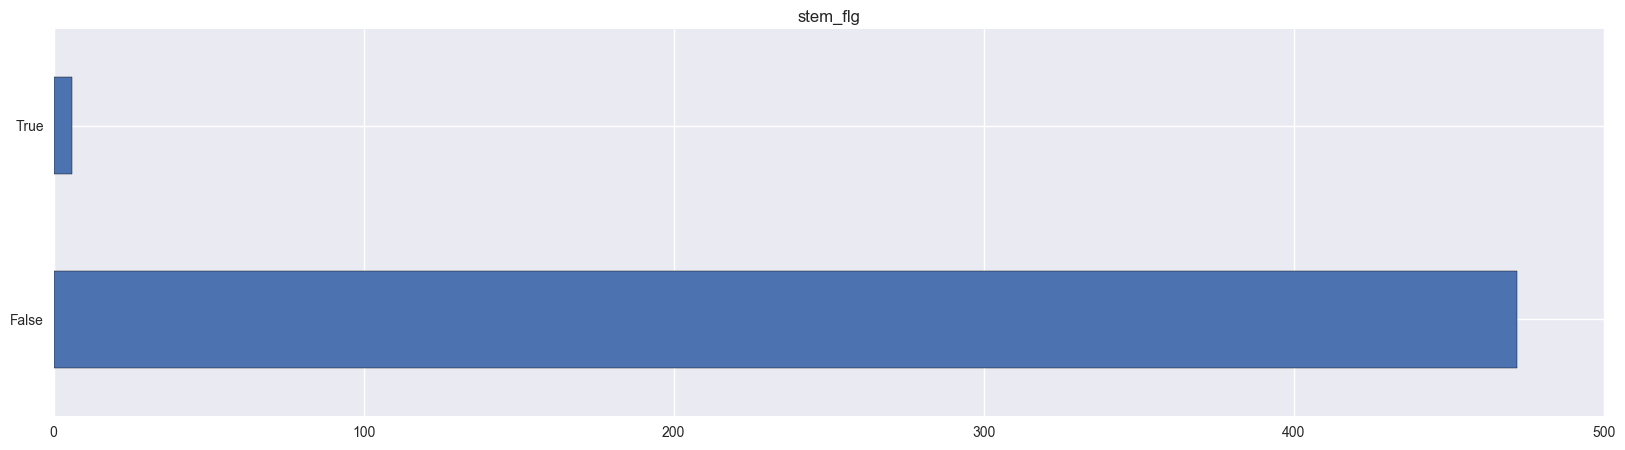

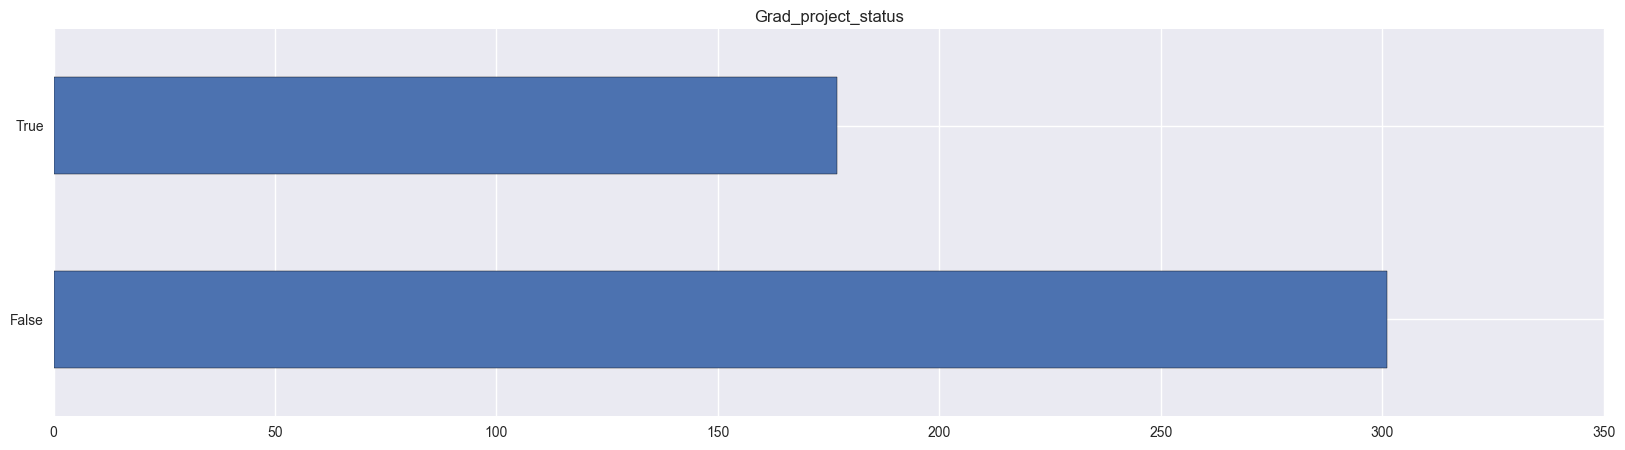

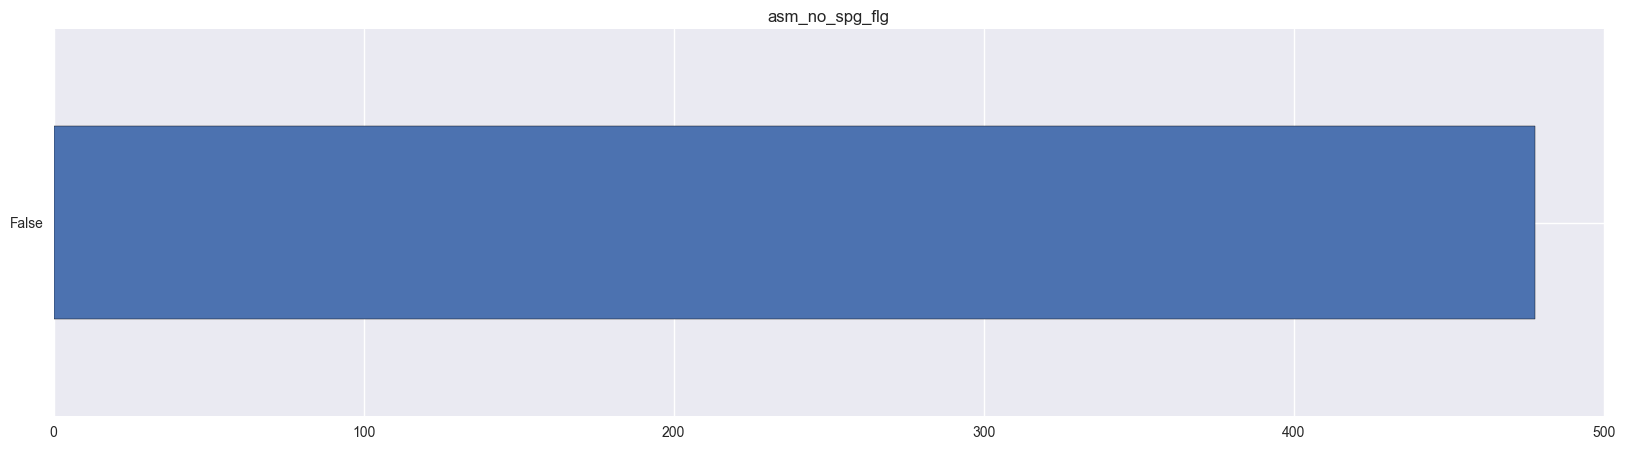

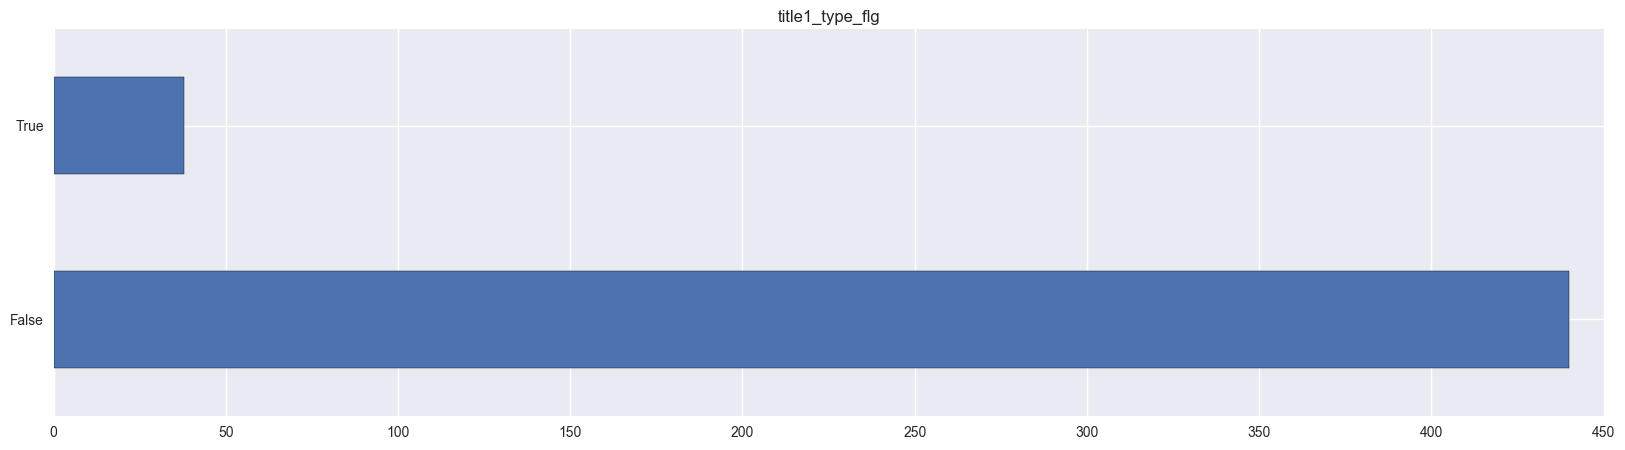

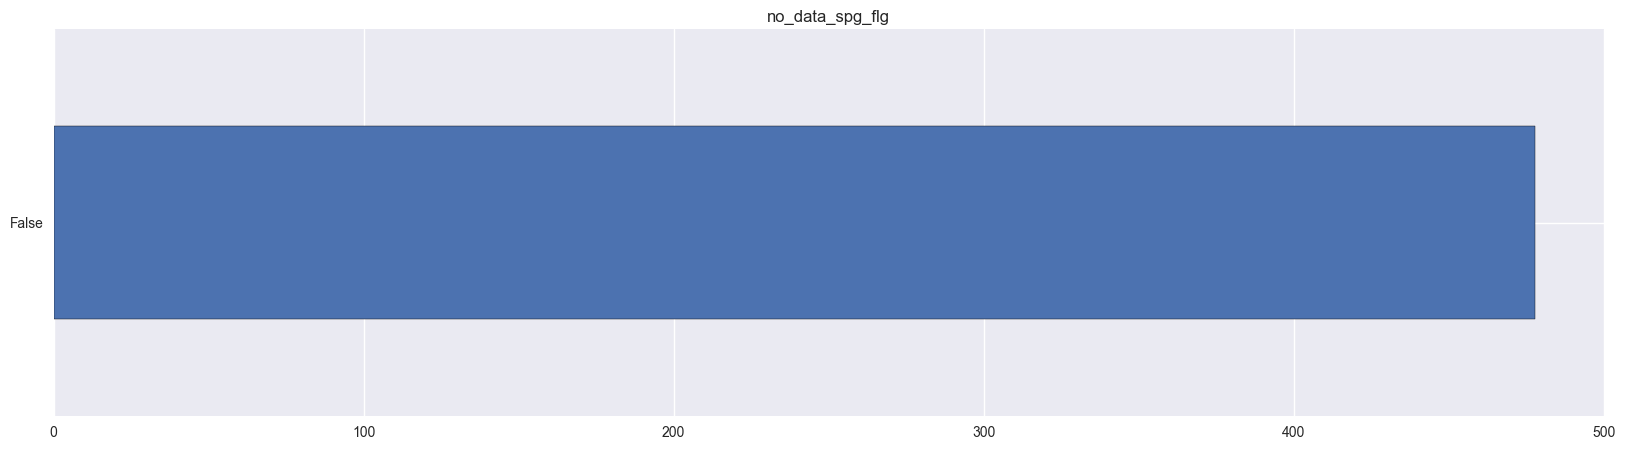

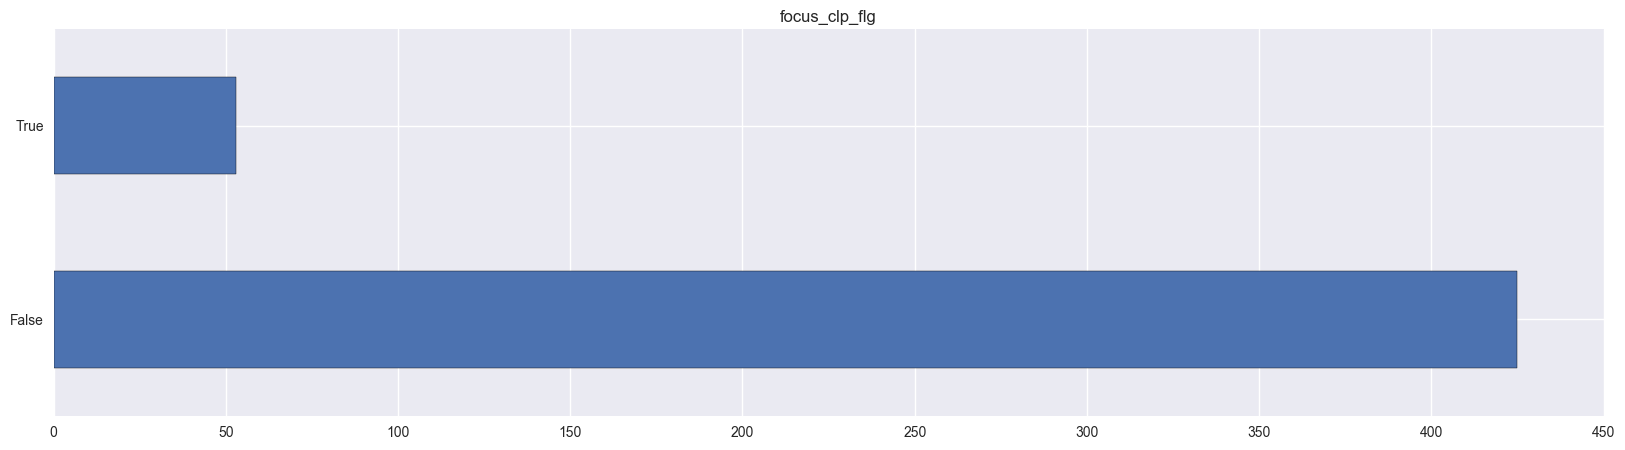

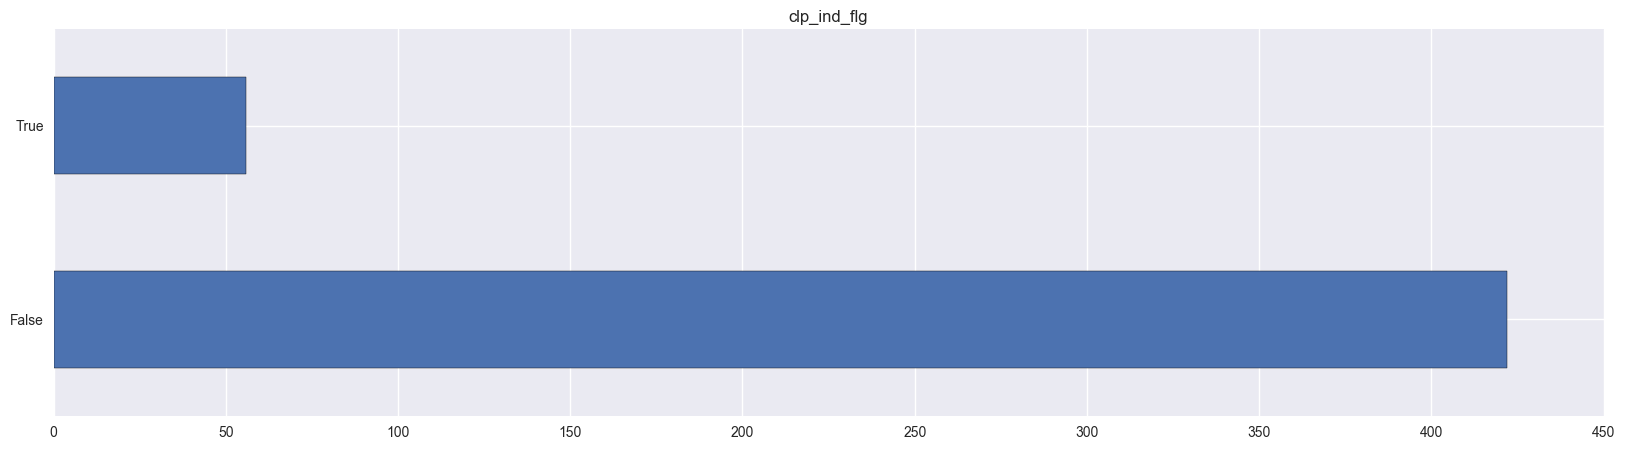

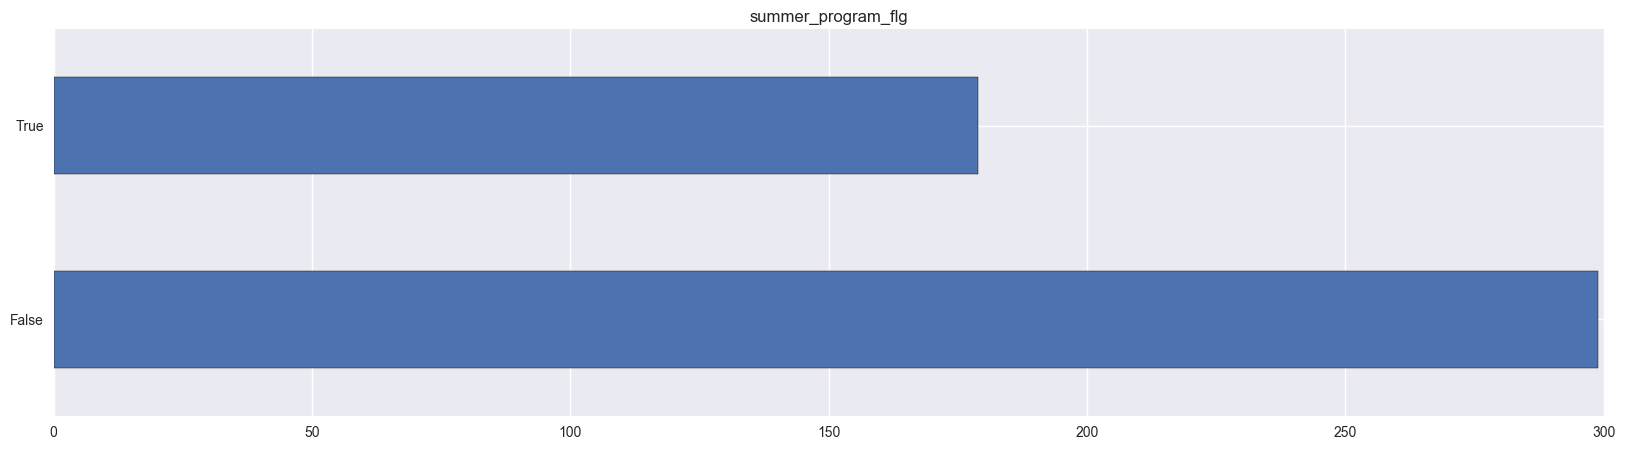

In [13]:
for i in range(0, len(statsSchoolDataBool.columns)):
    plt.figure(figsize=(20,5))
    statsSchoolDataBool.iloc[:,i].value_counts().plot(kind="barh")
    plt.title(statsSchoolDataBool.iloc[:,i].name)
    plt.show()

In [28]:
statsSchoolDataNumeric.columns = statsSchoolDataNumeric.columns.str.replace('\s+', '_')

In [32]:
statsSchoolDataNumeric.loc[:,statsSchoolDataNumeric.columns.str.contains('Math')]

Avg_Class_Size_MathI  Math_Course_Rigor_Score  Avg_Dist_Size_MathI  \
0    19.0                  100.0                    21.0                  
1    21.0                  100.0                    21.0                  
2    23.0                  100.0                    21.0                  
3    17.0                  100.0                    21.0                  
4    25.0                  100.0                    21.0                  
5    20.0                  100.0                    21.0                  
6    17.0                  100.0                    21.0                  
7    14.0                  100.0                    19.0                  
8    17.0                  100.0                    17.0                  
9    18.0                  100.0                    16.0                  
10   15.0                  100.0                    16.0                  
11   16.0                  100.0                    16.0                  
12   20.0                  100.0                    20.0                  
13   19.0                  100.0                    21.0                  
14   19.0                  100.0                    21.0                  
15   21.0                  100.0                    21.0                  
16   16.0                  100.0                    18.0                  
17   14.0                  100.0                    18.0                  
18   20.0                  100.0                    18.0                  
19   18.0                  100.0                    18.0                  
20   19.0                  100.0                    21.0                  
21   18.0                  100.0                    21.0                  
22   20.0                  100.0                    21.0                  
23   22.0                  100.0                    20.0                  
24   21.0                  100.0                    20.0                  
25   12.0                  100.0                    18.0                  
26   18.0                  100.0                    18.0                  
27   17.0                  100.0                    18.0                  
28   17.0                  100.0                    18.0                  
29   21.0                  100.0                    22.0                  
..    ...                    ...                     ...                  
448  20.0                  93.0                     23.0                  
449  21.0                  90.0                     23.0                  
450  19.0                  100.0                    16.0                  
451  10.0                  100.0                    16.0                  
452  17.0                  100.0                    16.0                  
453  14.0                  100.0                    20.0                  
454  21.0                  100.0                    20.0                  
455  21.0                  100.0                    14.0                  
456  27.0                  94.0                     21.0                  
457  20.0                  100.0                    21.0                  
458  18.0                  100.0                    21.0                  
459  18.0                  100.0                    21.0                  
460  16.0                  100.0                    21.0                  
461  24.0                  100.0                    21.0                  
462  10.0                  100.0                    21.0                  
463  22.0                  100.0                    21.0                  
464  22.0                  100.0                    20.0                  
465  16.0                  88.0                     20.0                  
466  17.0                  95.0                     20.0                  
467  17.0                  81.0                     20.0                  
468  17.0                  100.0                    20.0                  
469  18.0                  100

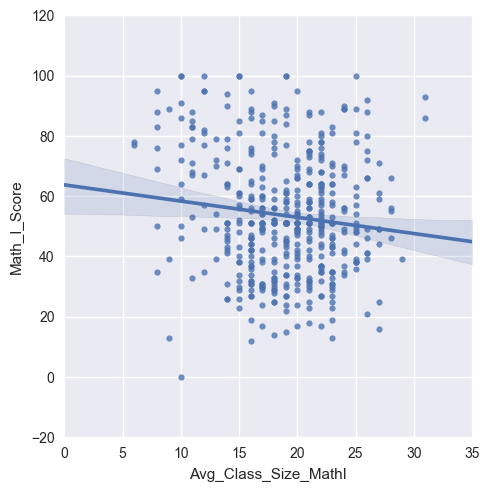

In [34]:
ax = sns.lmplot(x = 'Avg_Class_Size_MathI', y = 'Math_I_Score', data=statsSchoolDataNumeric)

#### Visualize Attributes [15]
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

category_cd
A    4  
H    459
T    15 
dtype: int64

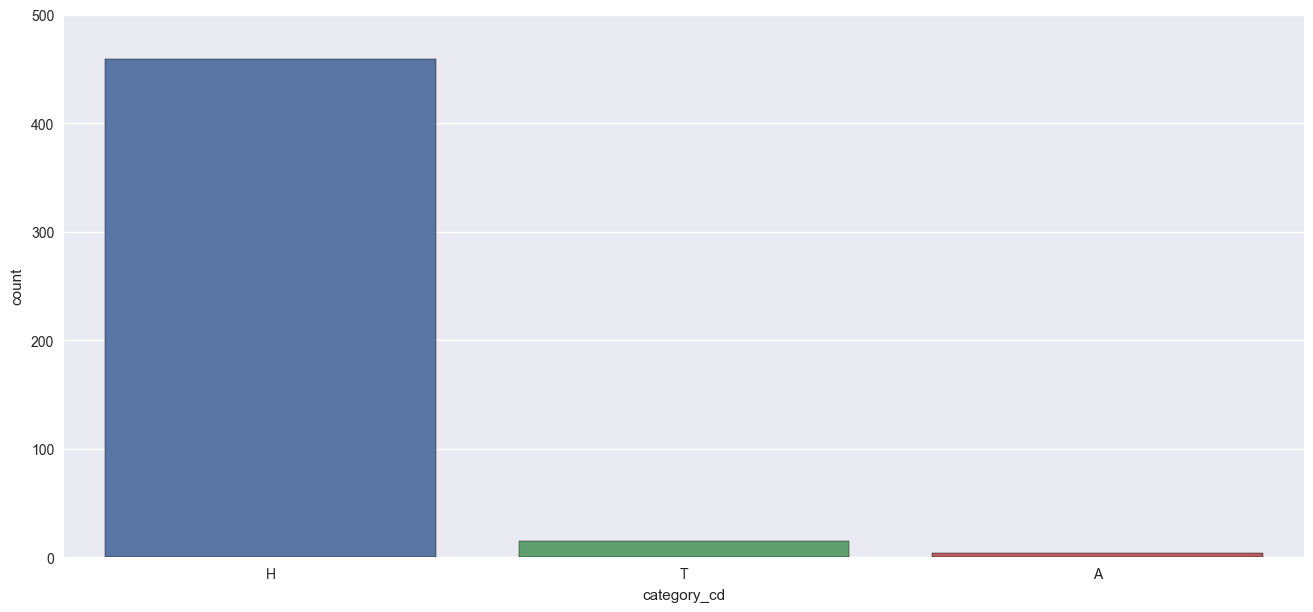

In [14]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

Of the 478 High schools, 459 are of fall in  category H ,15 of catagory T and 4 of category A. Please reference the table below for school category descriptions

In [15]:
#get_ColDescription()


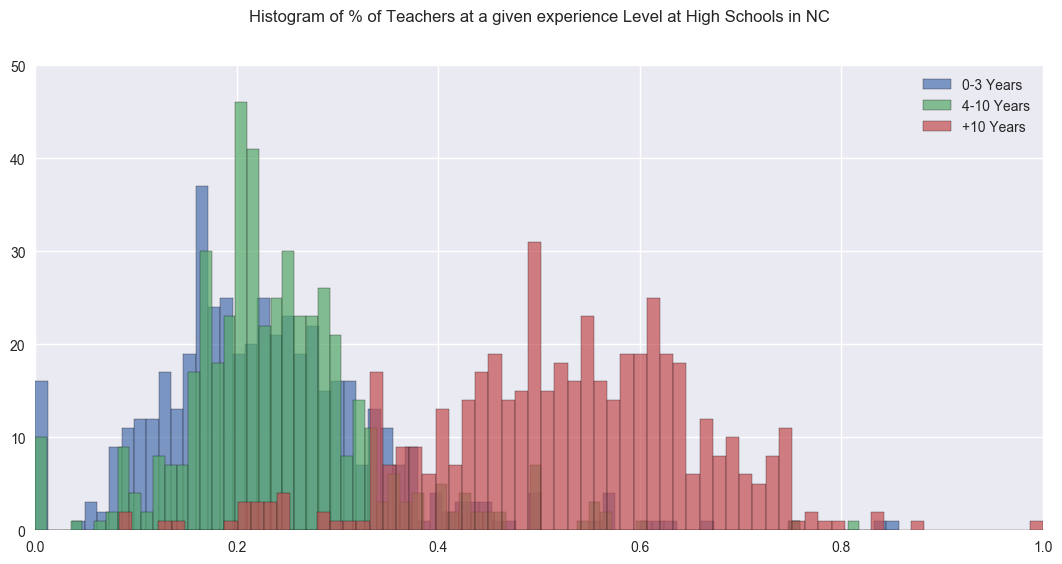

In [16]:
#histograms of teacher experience
#with sns.axes_style("darkgrid"):
X =new_schooldata.Tch_Exp_Pct_0_3_Years
Y  =new_schooldata.Tch_Exp_Pct_4_10_Years
Z =new_schooldata["Tch_Exp_Pct_10+_Years"]
fig, ax = plt.subplots(figsize=(13, 6))
bins = 70
figure_title = "Histogram of % of Teachers at a given experience Level at High Schools in NC"
plt.title(figure_title, y=1.08)
plt.hist(X, bins, alpha=0.7, label='0-3 Years')
plt.hist(Y, bins, alpha=0.7, label='4-10 Years')
plt.hist(Z, bins, alpha=0.7, label='+10 Years')
plt.legend(loc='upper right')
plt.show()

#### TO be updated.
From Histogram above, majority of schools in NC have high percentage of teachers with over 10 years of experience. There is little difference in distributions of percentages of teachers with 0-3 years and 4 to 10 years. 

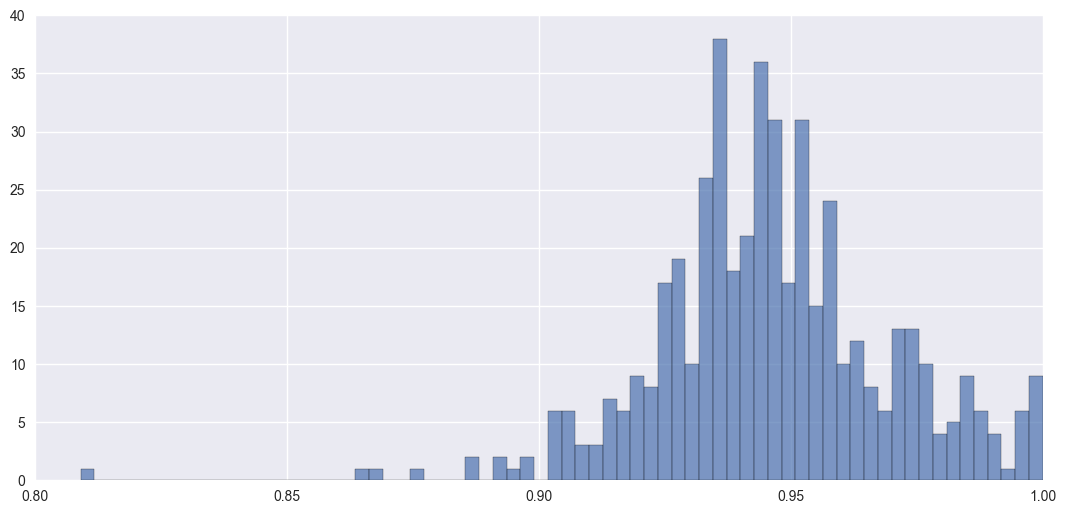

In [17]:
#
A =new_schooldata.avg_daily_attend_pct
fig, ax = plt.subplots(figsize=(13, 6))
bins = 70
plt.hist(A, bins, alpha=0.7)
plt.show()


In [18]:
get_ColDescription()

NameError: name 'get_ColDescription' is not defined

#### Explore Joint Attributes [15]
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

### 1. School Performance Measures

In [21]:
#Categorical columns for joint plots explorations
temp = new_schooldata.select_dtypes(['bool','object'])

#store the selected columns list in array
categorical_cols = temp.columns
print('Categorical columns')
print('-------------------------------')
print(categorical_cols)

print('-------------------------------')
print('')
print('-------------------------------')
print('Educator Experience')
#list of columns for teacher experience measures
teacher = [col for col in new_schooldata.columns if 'Tch' in col]
Teacher = [teacher[1], teacher[2],teacher[6]]
print(Teacher)
print('-------------------------------')
print('')
print('-------------------------------')
#List of Columns for achivement score measures
#Achivement_measures  = ['The ACT Score','Overall Achievement Score','sch_percent_college_enrolled_16_mos_post_grad','EVAAS Growth Score','Math Course Rigor Score','sat_avg_score_num','Cohort Graduation Rate Standard Score']
Achievement_scores = [col for col in new_schooldata.columns if 'score' in col]
Achievement_Scores = [col for col in new_schooldata.columns if 'Score' in col]

#combine the above two arrays
Achievement_measures = Achievement_Scores+Achievement_scores 
print('Achievement Measures columns')
print('-------------------------------')
Achievement_measures

Categorical columns
-------------------------------
Index(['stem_flg', 'Grad_project_status', 'asm_no_spg_flg', 'school_type_txt',
       'esea_status', 'Byod', 'EVAAS Growth Status', 'calendar_only_txt',
       'category_cd', 'title1_type_flg', 'type_cd_txt', '1_to_1_access',
       'no_data_spg_flg', 'focus_clp_flg', 'clp_ind_flg', 'unit_code',
       'State Gap Compared', 'summer_program_flg', 'SPG Grade'],
      dtype='object')
-------------------------------

-------------------------------
Educator Experience
['Dist_Tch_Exp_Pct_4_10_Years', 'State_Tch_Exp_Pct_10+_Years', 'Tch_Exp_Pct_10+_Years']
-------------------------------

-------------------------------
Achievement Measures columns
-------------------------------


['SPG Score',
 'Math Course Rigor Score',
 'English II Score',
 'EVAAS Growth Score',
 'ACT WorkKeys Score',
 'Biology Score',
 'Cohort Graduation Rate Standard Score',
 'Overall Achievement Score',
 'The ACT Score',
 'Math I Score',
 'st_sat_avg_score_num',
 'sat_avg_score_num',
 'nat_sat_avg_score_num',
 'lea_sat_avg_score_num']

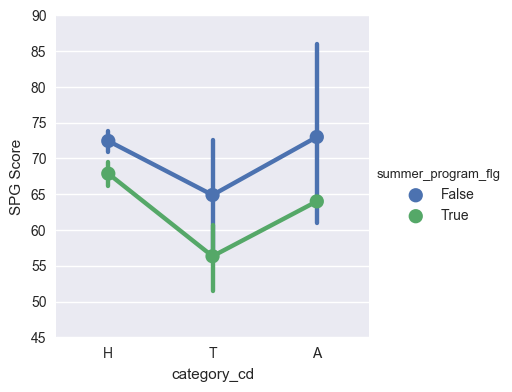

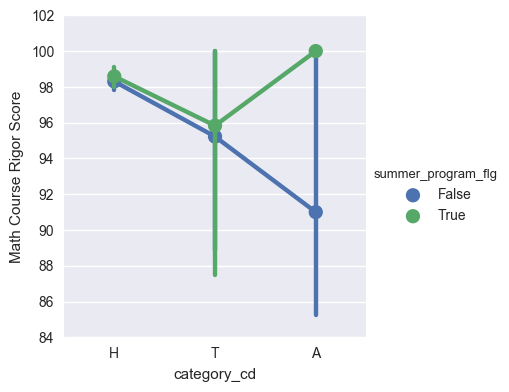

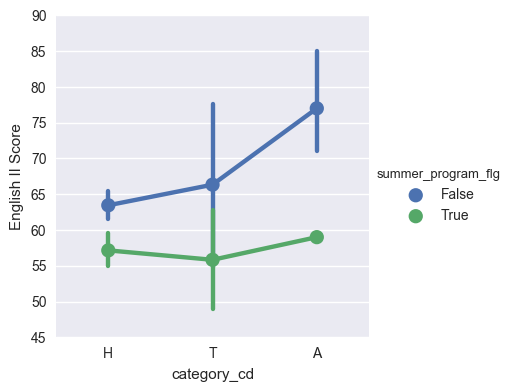

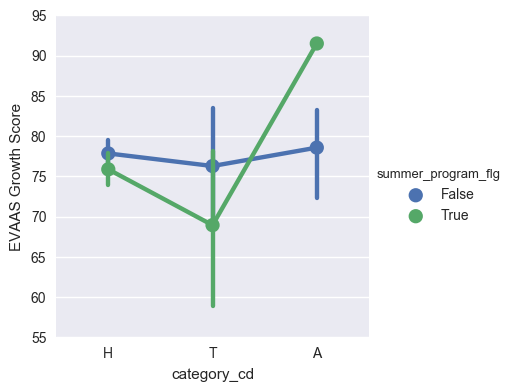

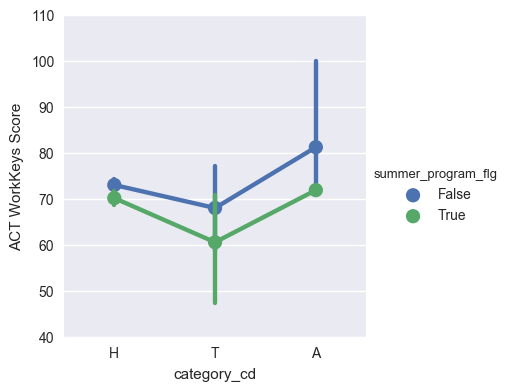

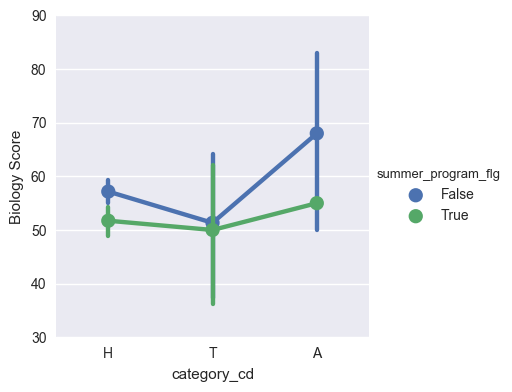

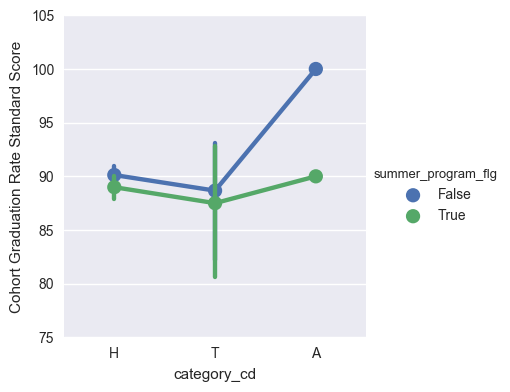

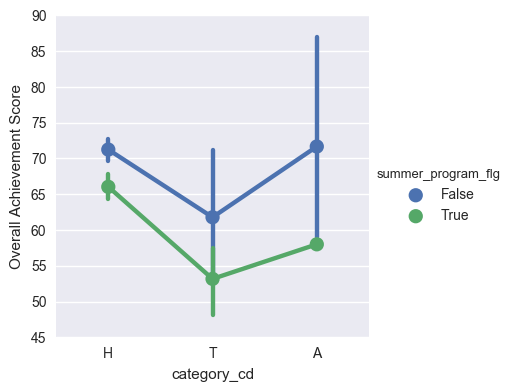

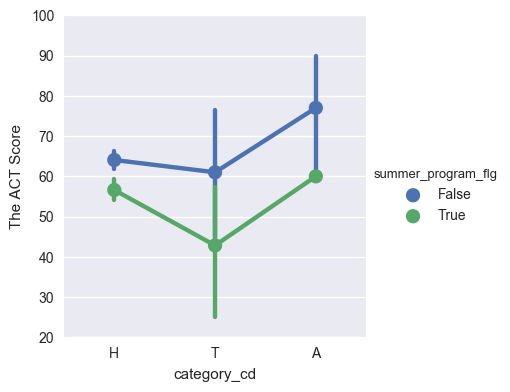

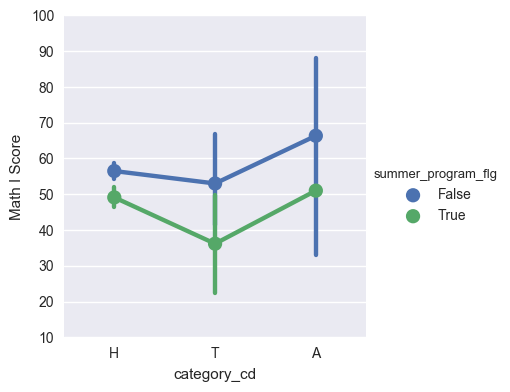

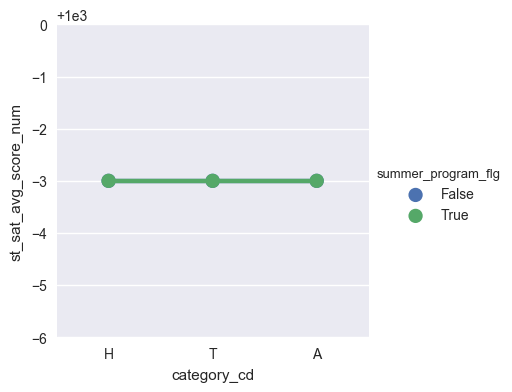

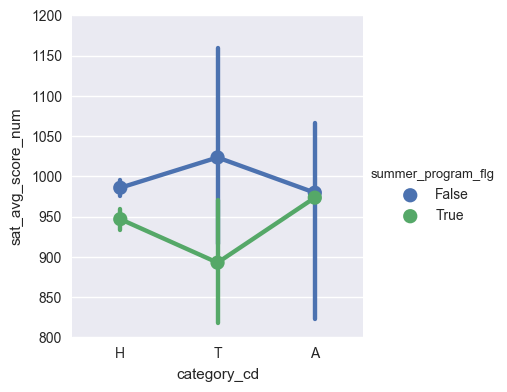

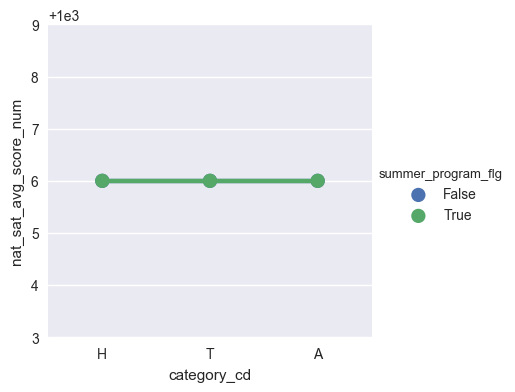

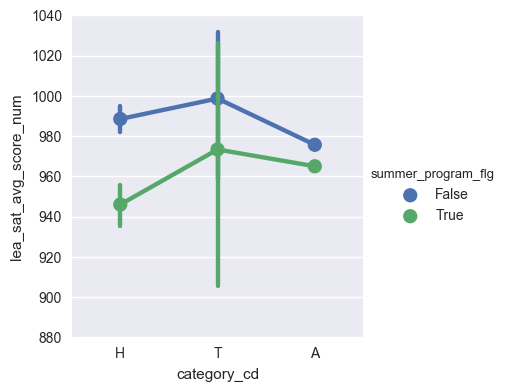

In [22]:
# factor plots for scores vs teacher experience considering categorical factors
for i in range(0, len(Achievement_measures)):
    sns.factorplot('category_cd',Achievement_measures[i],hue='summer_program_flg',data=new_schooldata)

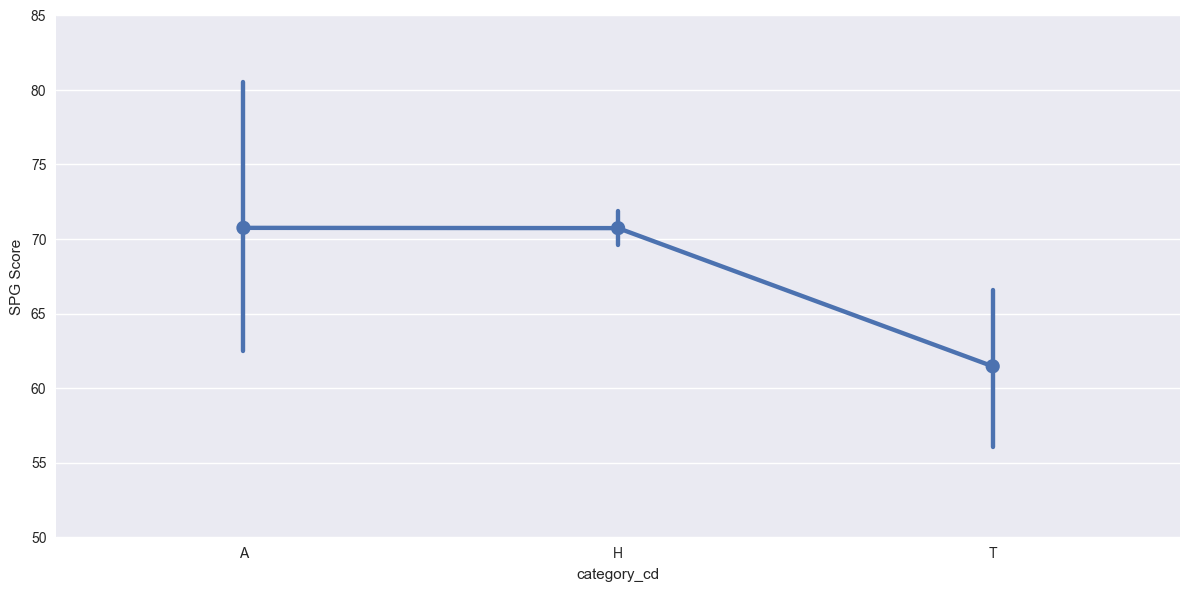

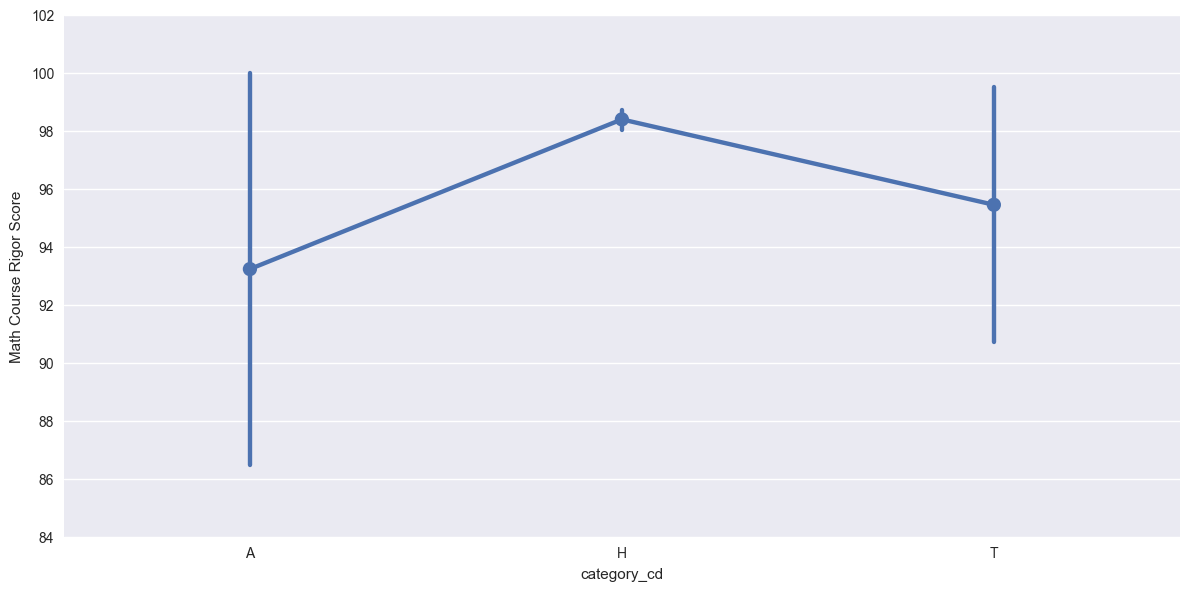

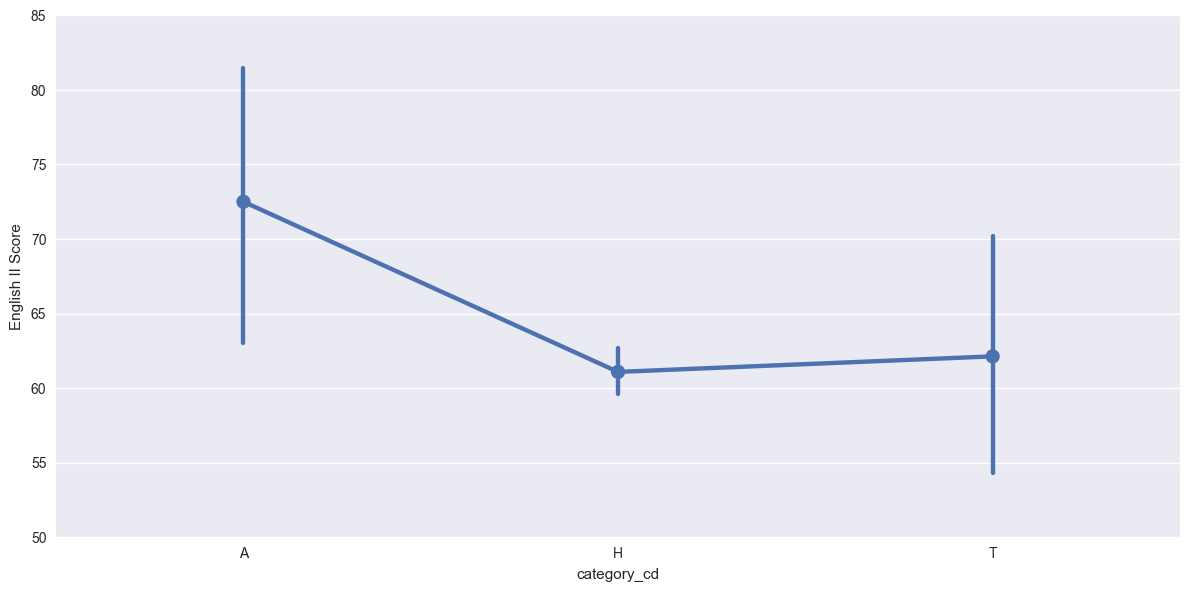

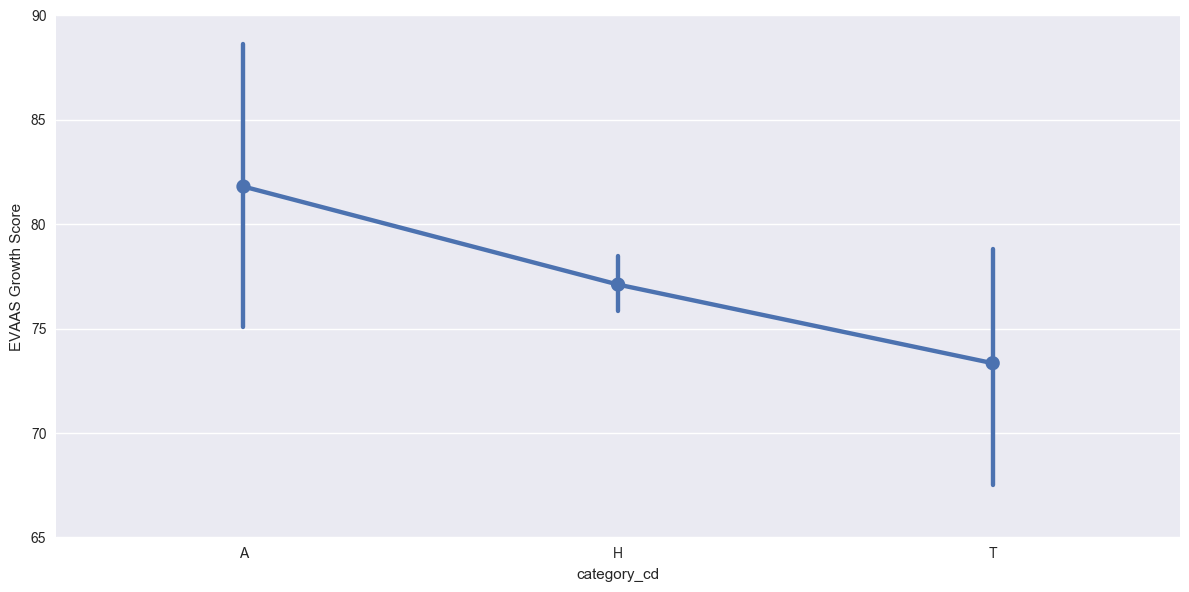

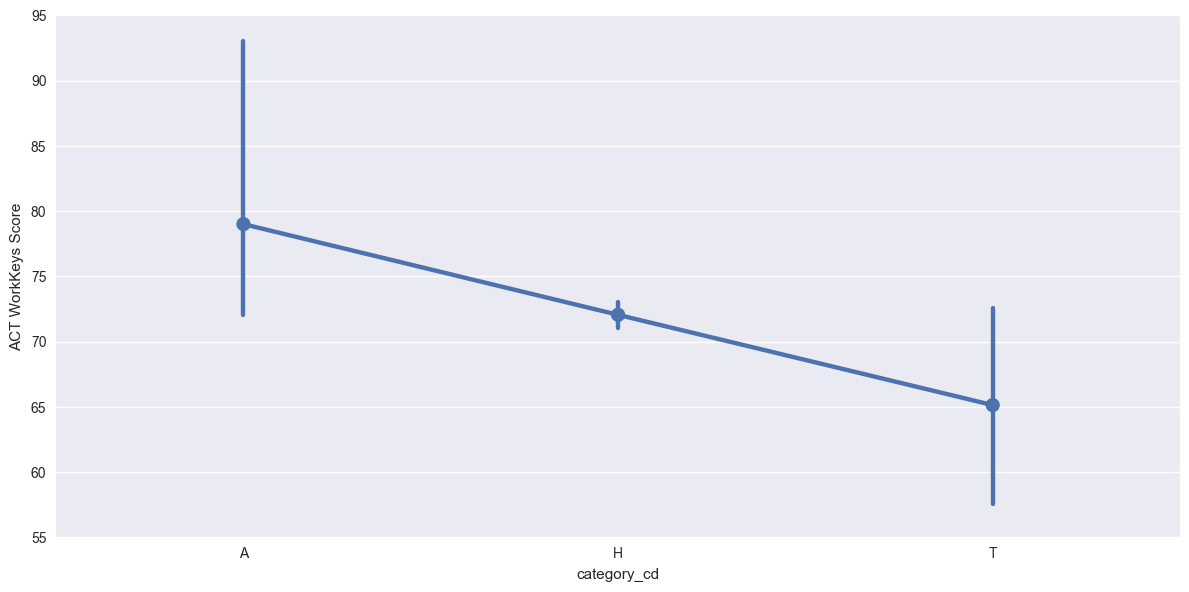

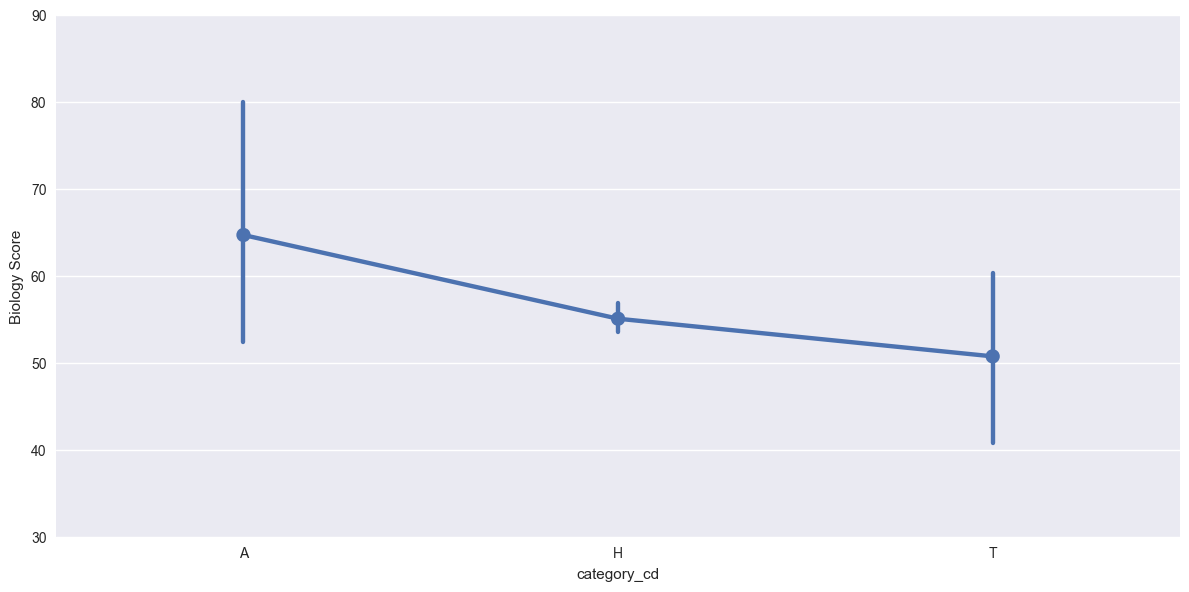

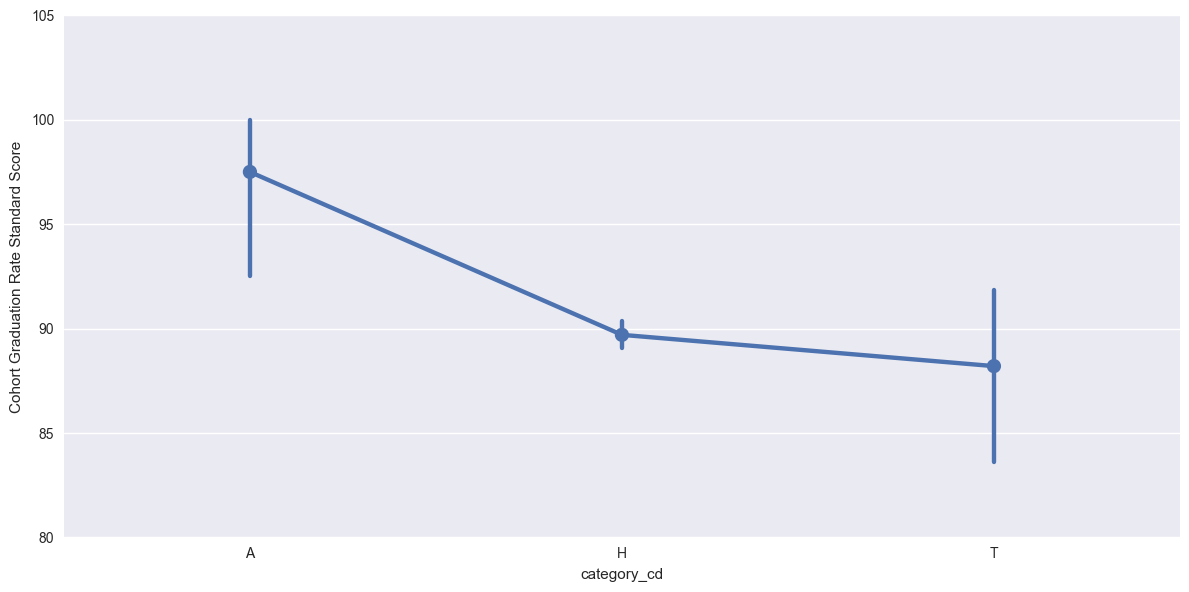

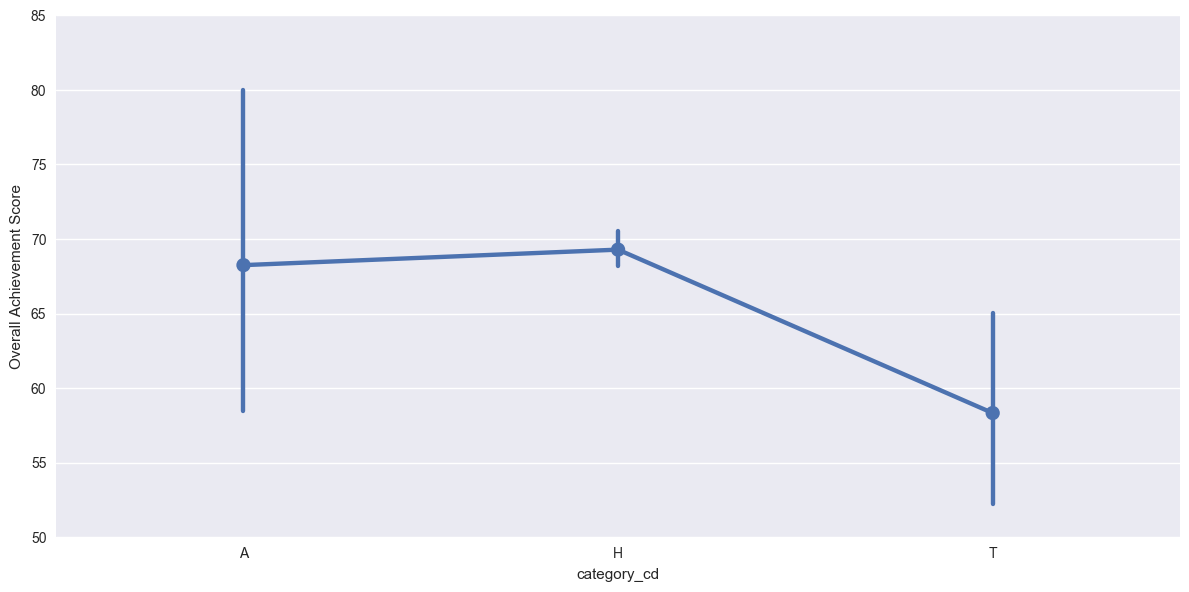

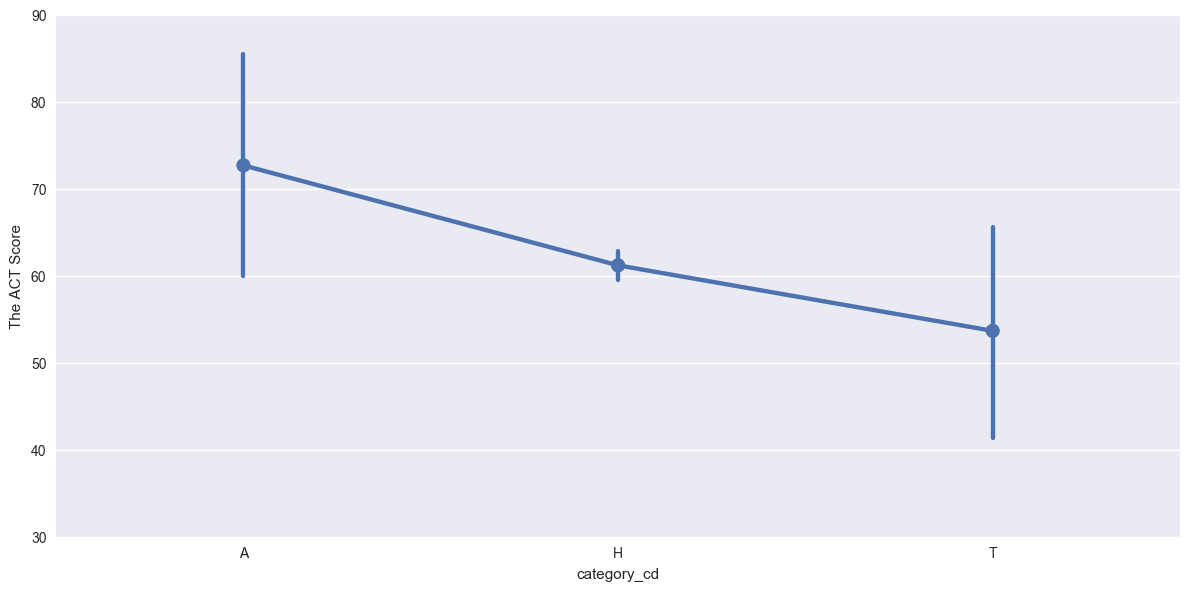

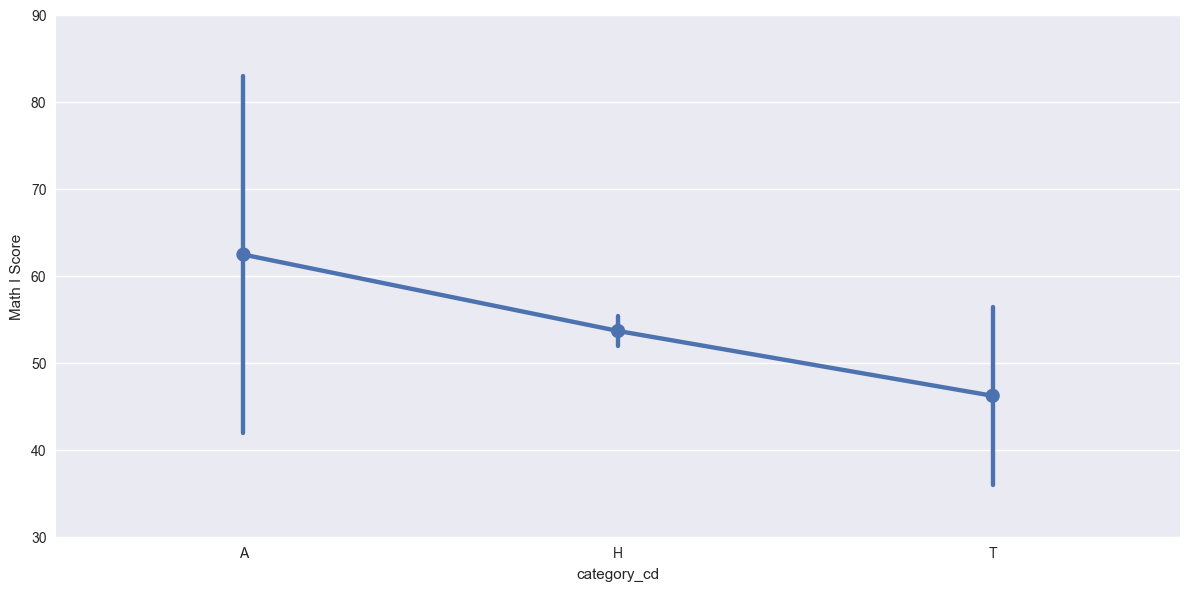

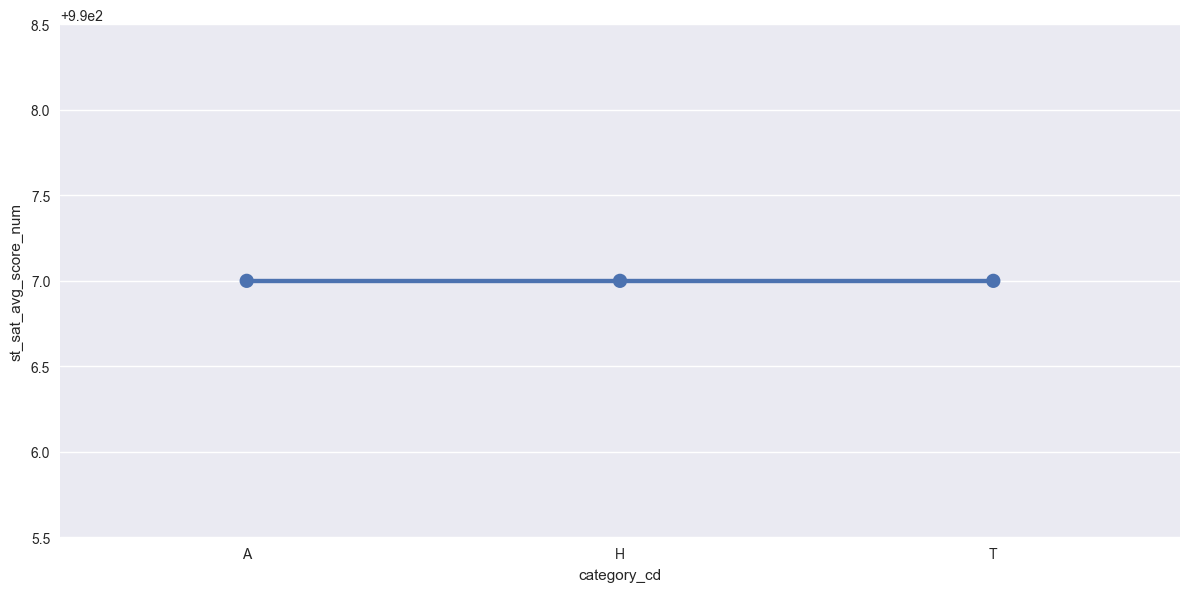

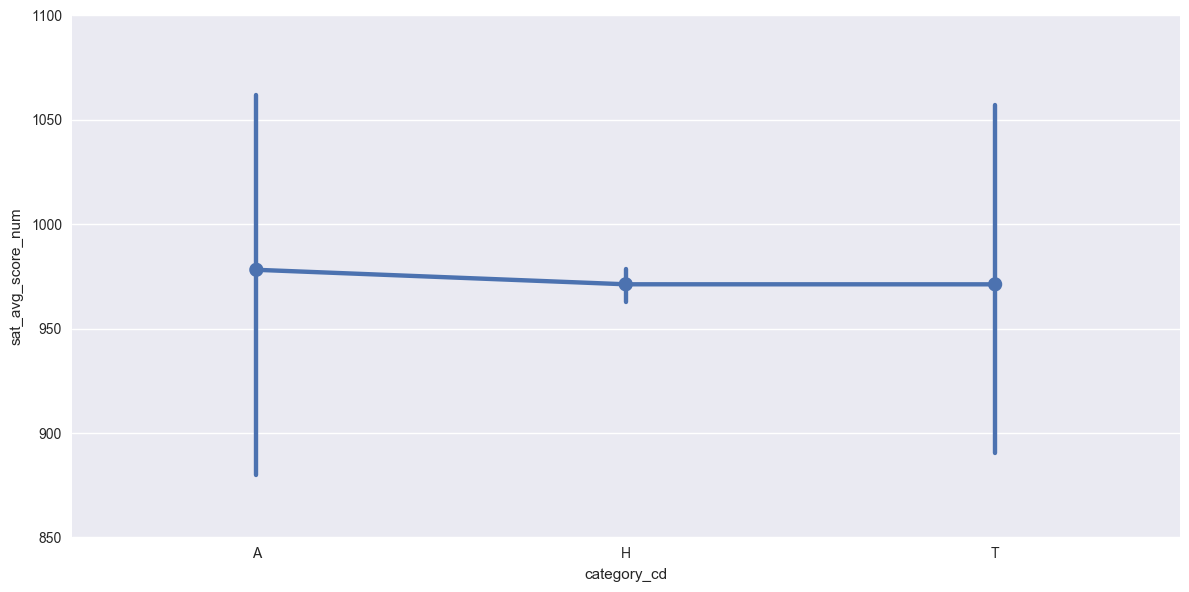

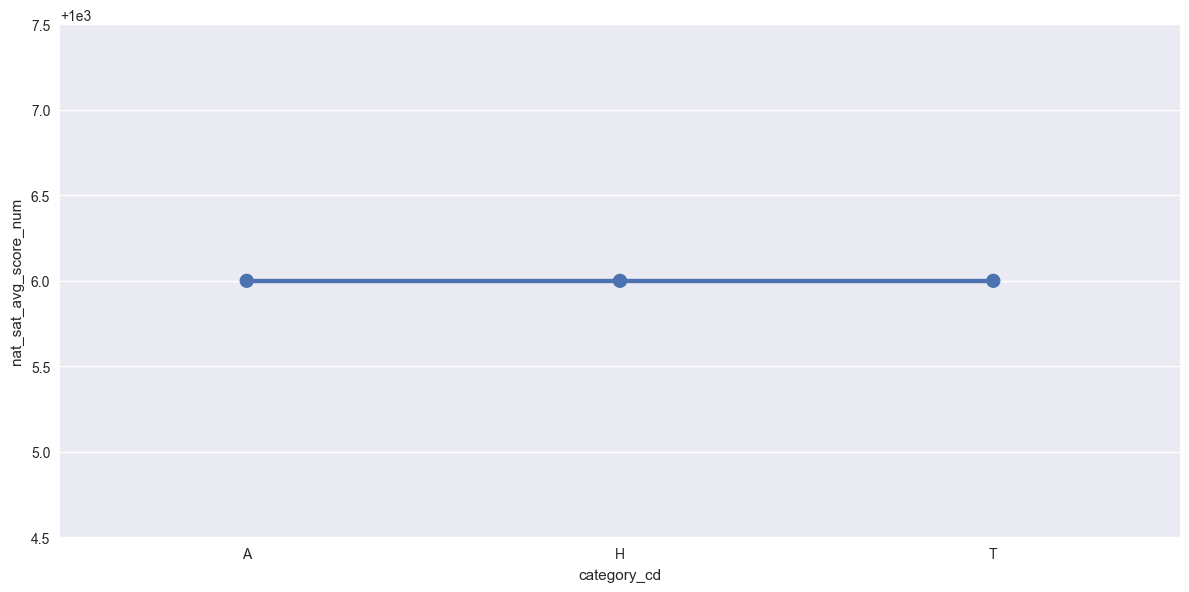

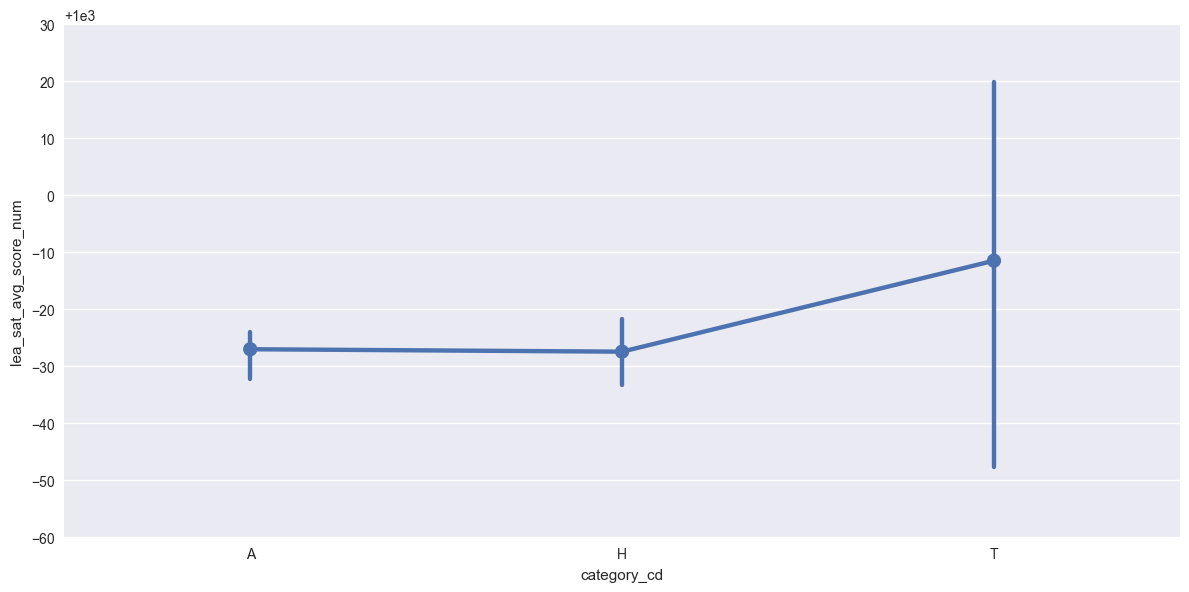

In [23]:
#Sort the x-axis (catagory_cd) from above
with sns.axes_style("darkgrid"):
    new_schooldata2=new_schooldata.sort_values(axis =0, by='category_cd')
    for i in range(0, len(Achievement_measures)):
        sns.factorplot('category_cd',Achievement_measures[i],data=new_schooldata2, size = 6, aspect=2)

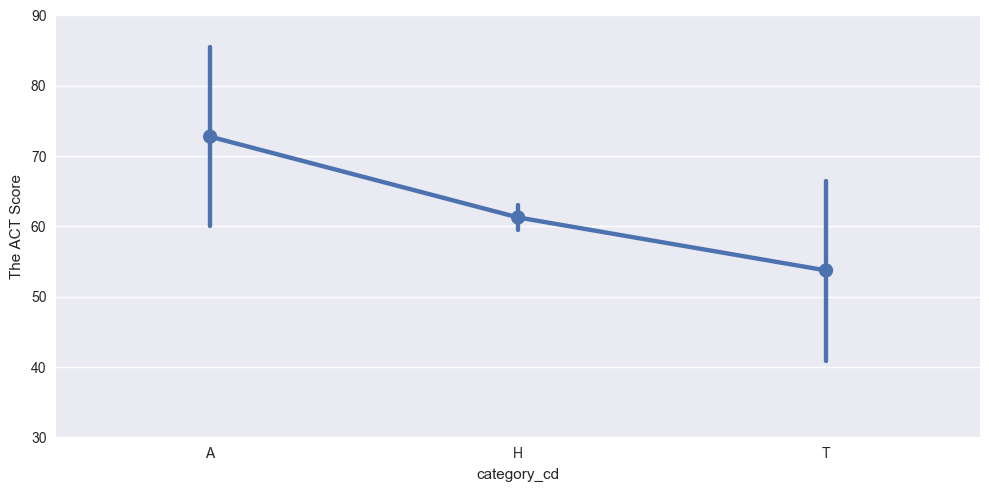

In [24]:
#sns.set_style("dark")
with sns.axes_style("darkgrid"):
    sns.factorplot('category_cd','The ACT Score',data=new_schooldata2,size=5, aspect=2)

From the above three code blocks, a strong correlation exists between School catagory_cd and its performance in the different performance and test scores measures.Considering Math Score,The ACT Score, Biology Score, EVAAS Growth Score and cohort Graduation Rate Standard score, schools category  A (Schools with elementary, middle and high school grades) performed much better followed by category H (Schools with high school grades 9-13) then Schools T (schools with middle and high school grades). We show one plot for ACT which displays the trend being described. Since the number of Schools of category A=4  and T=15 are less than the 30 samples, though a posible trend exists, we do not draw a statistical conclusion on performance based on school catagory.

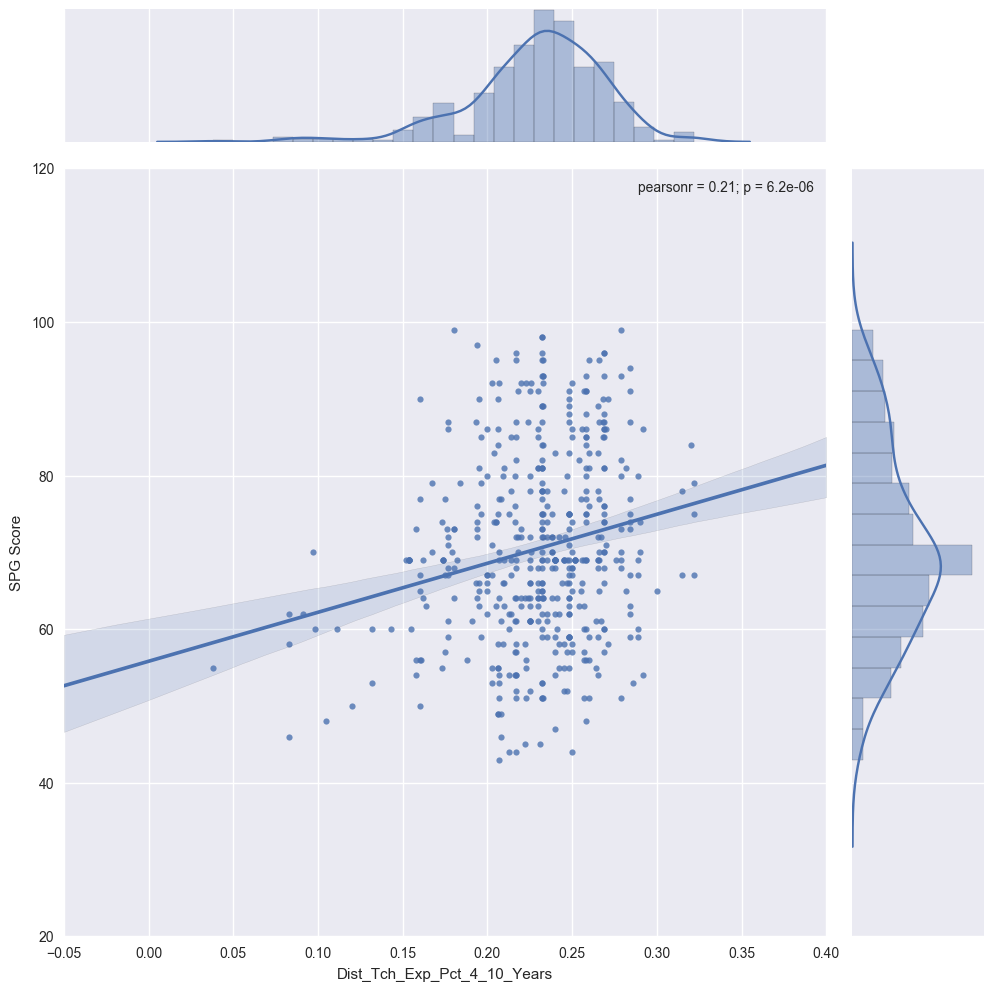

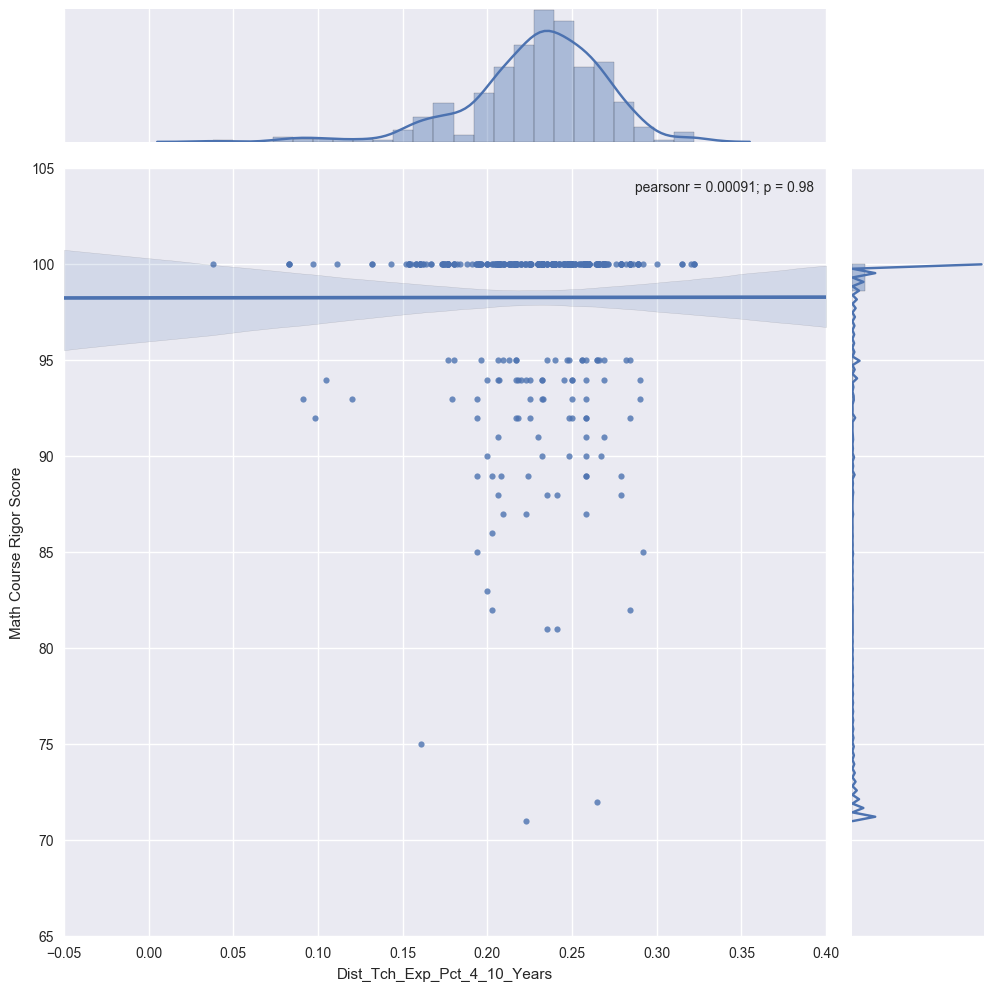

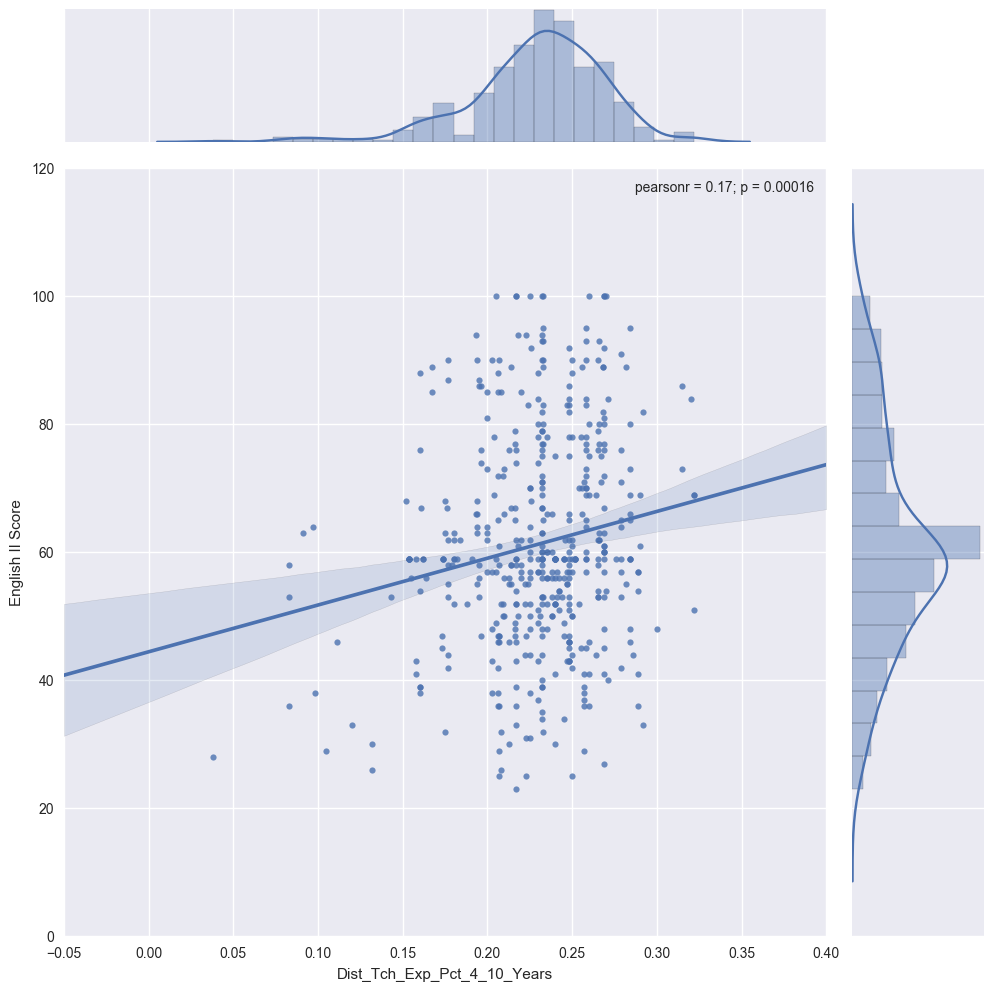

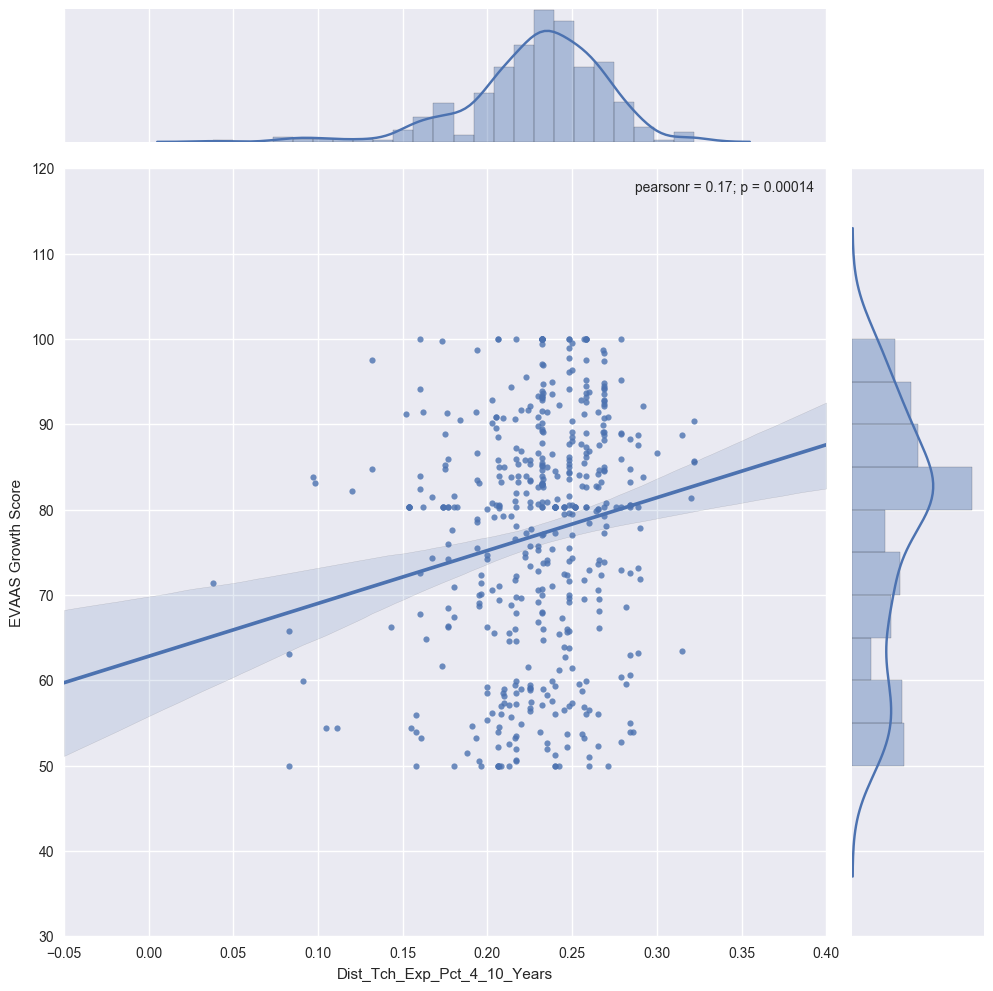

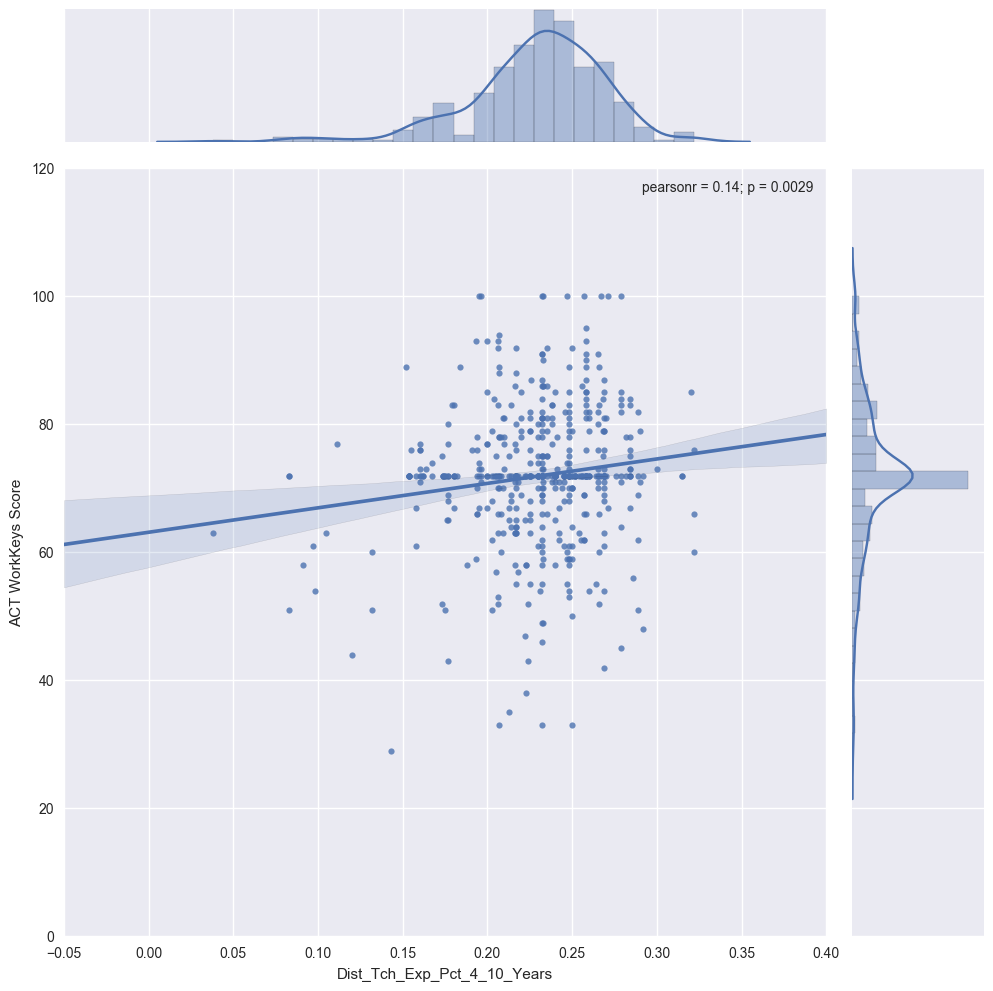

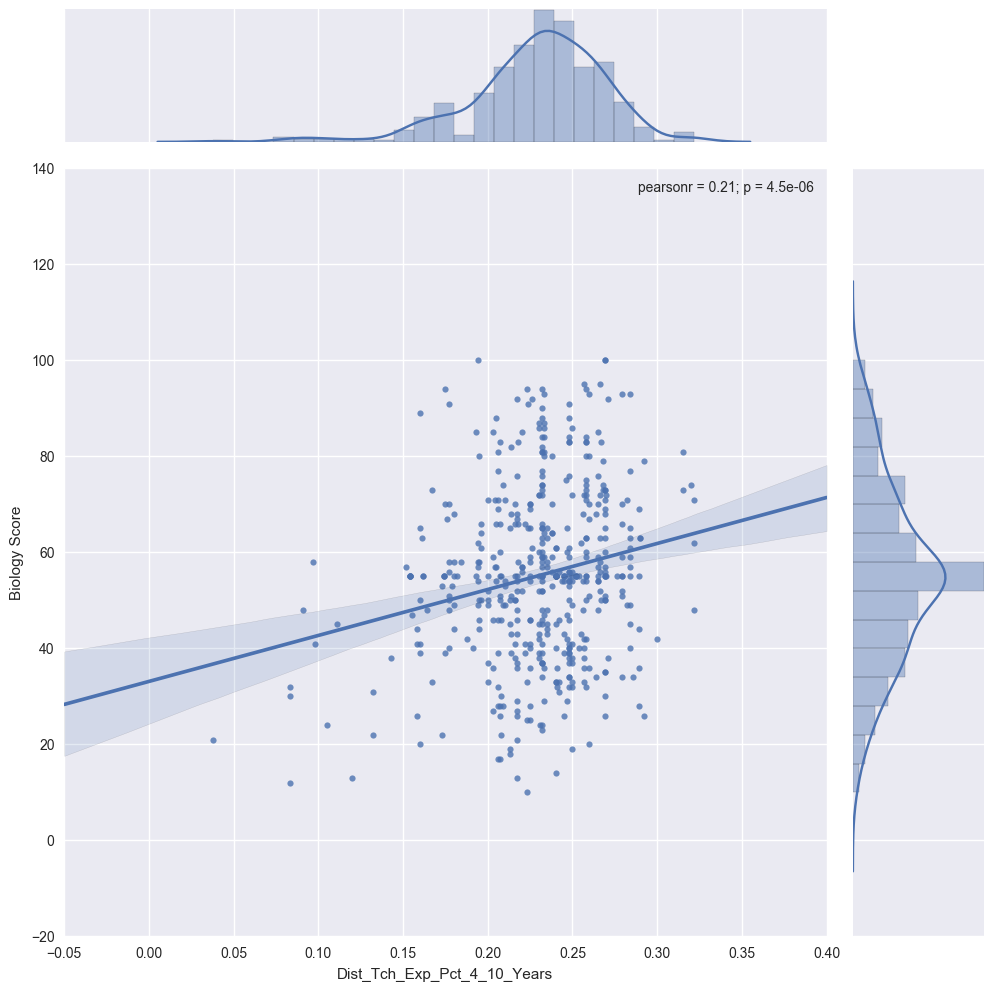

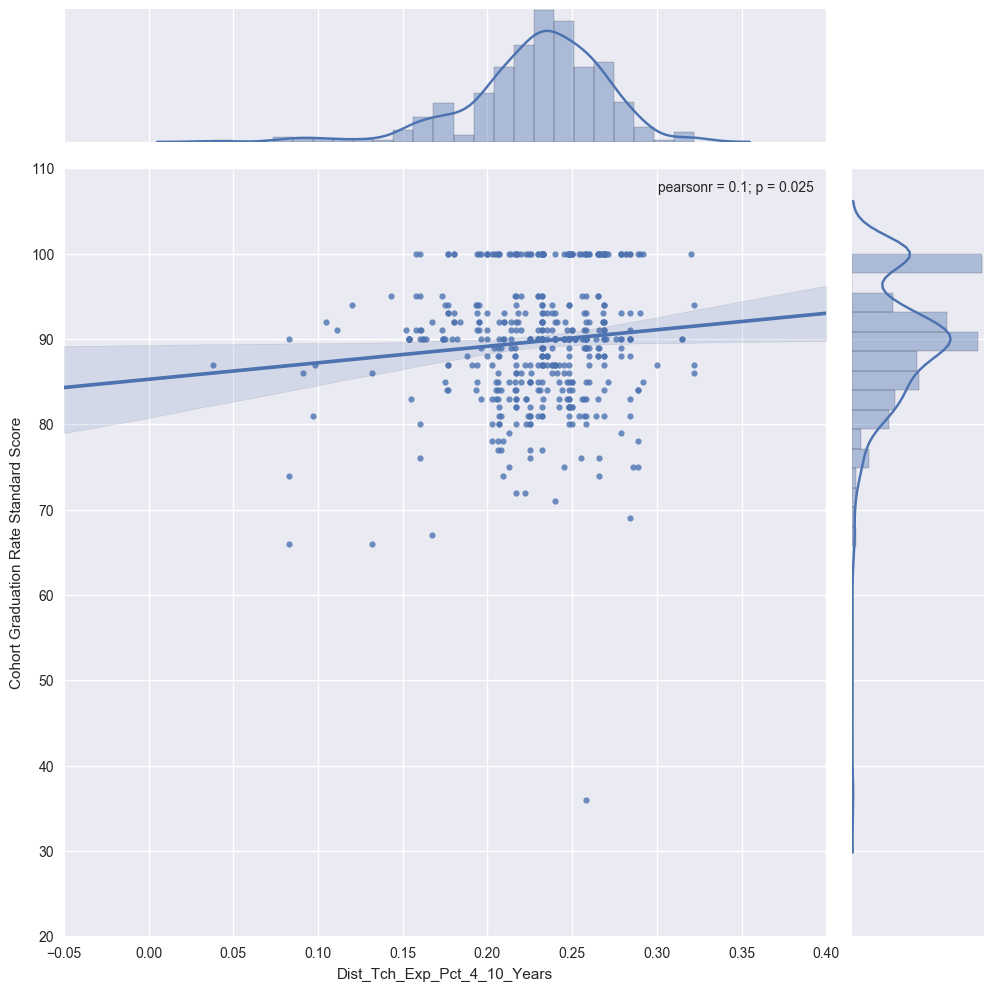

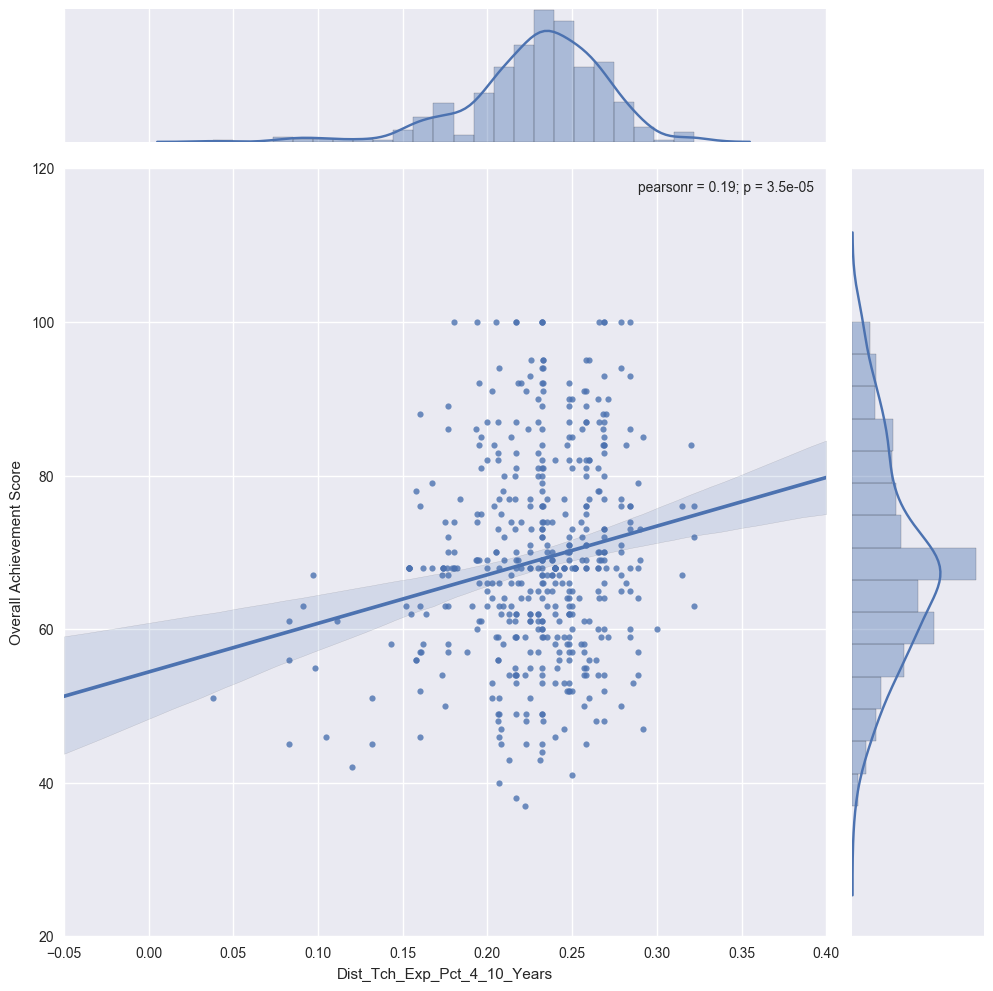

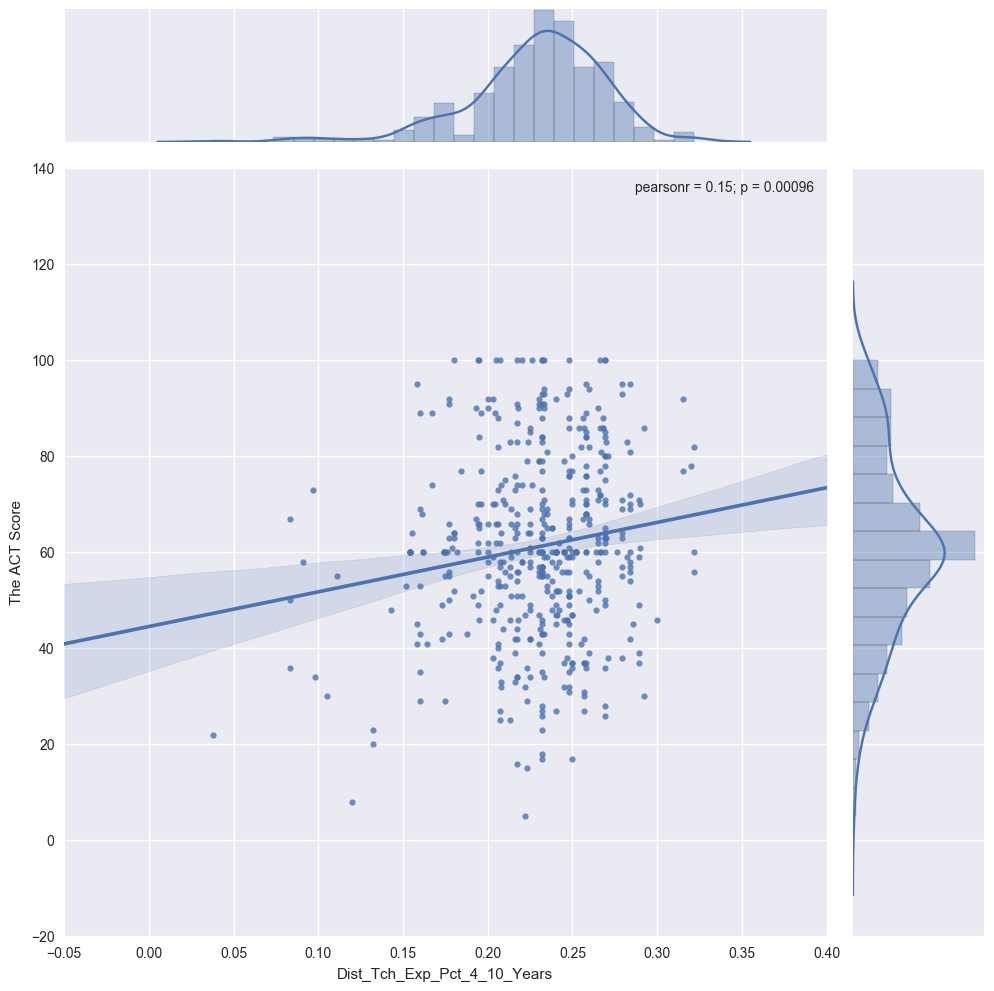

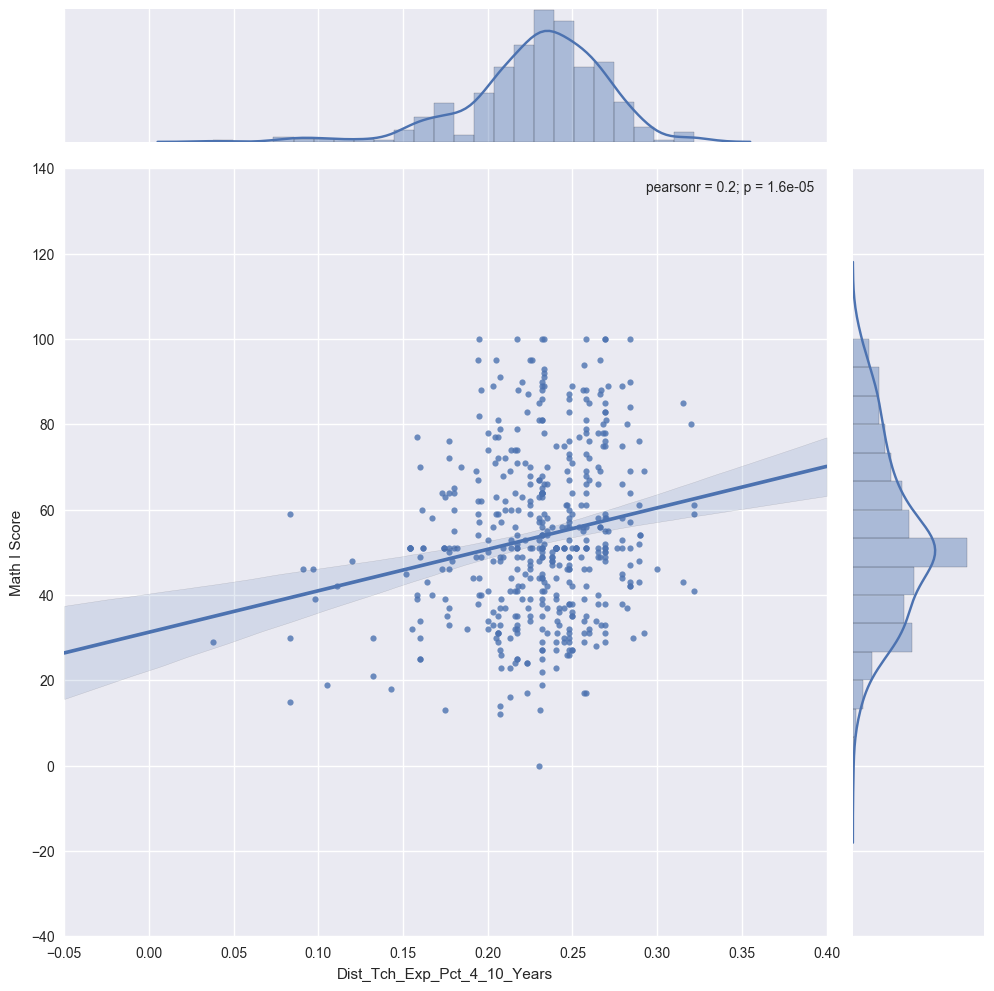

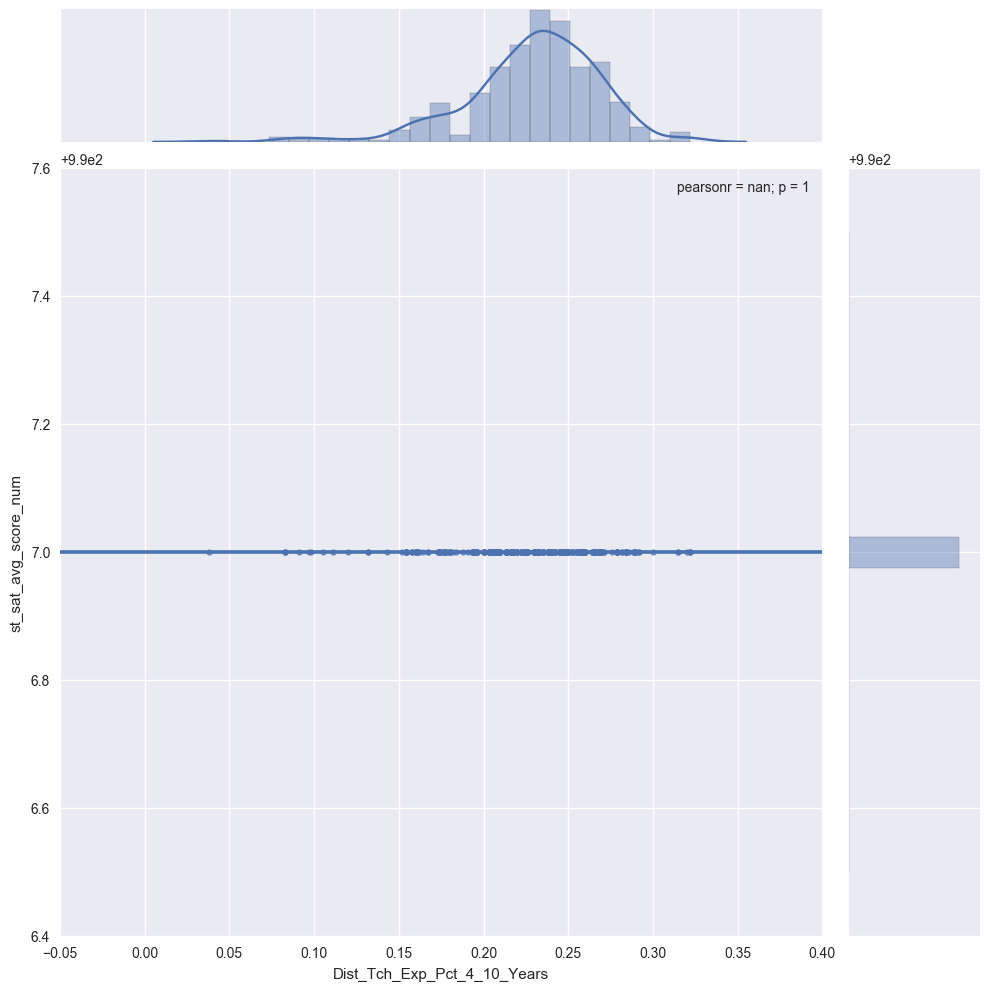

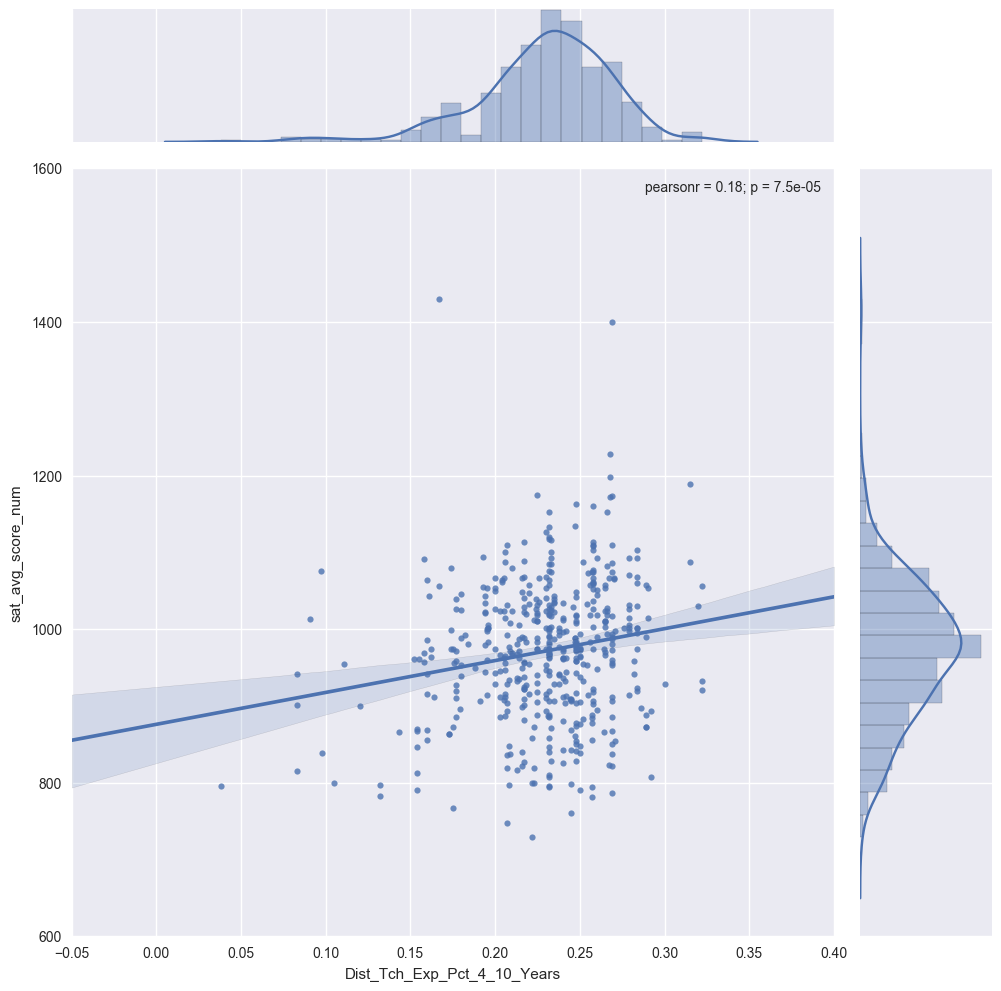

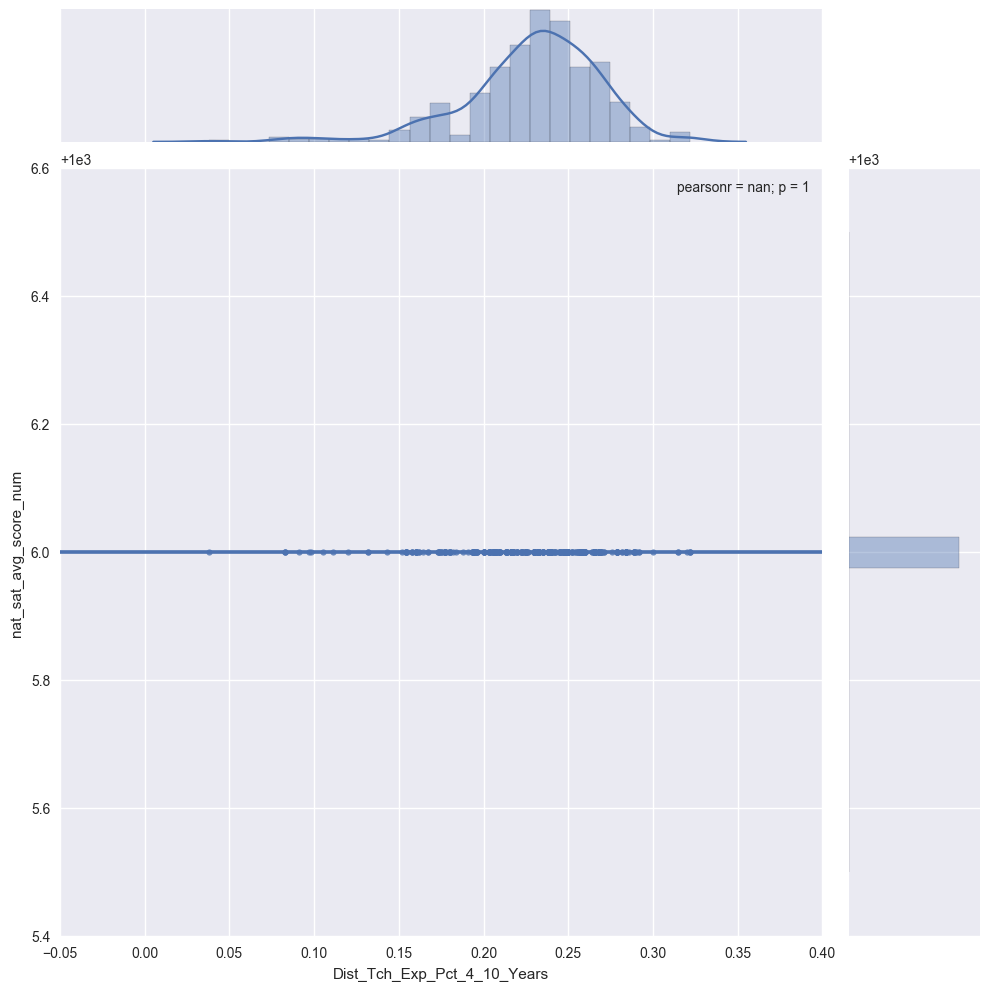

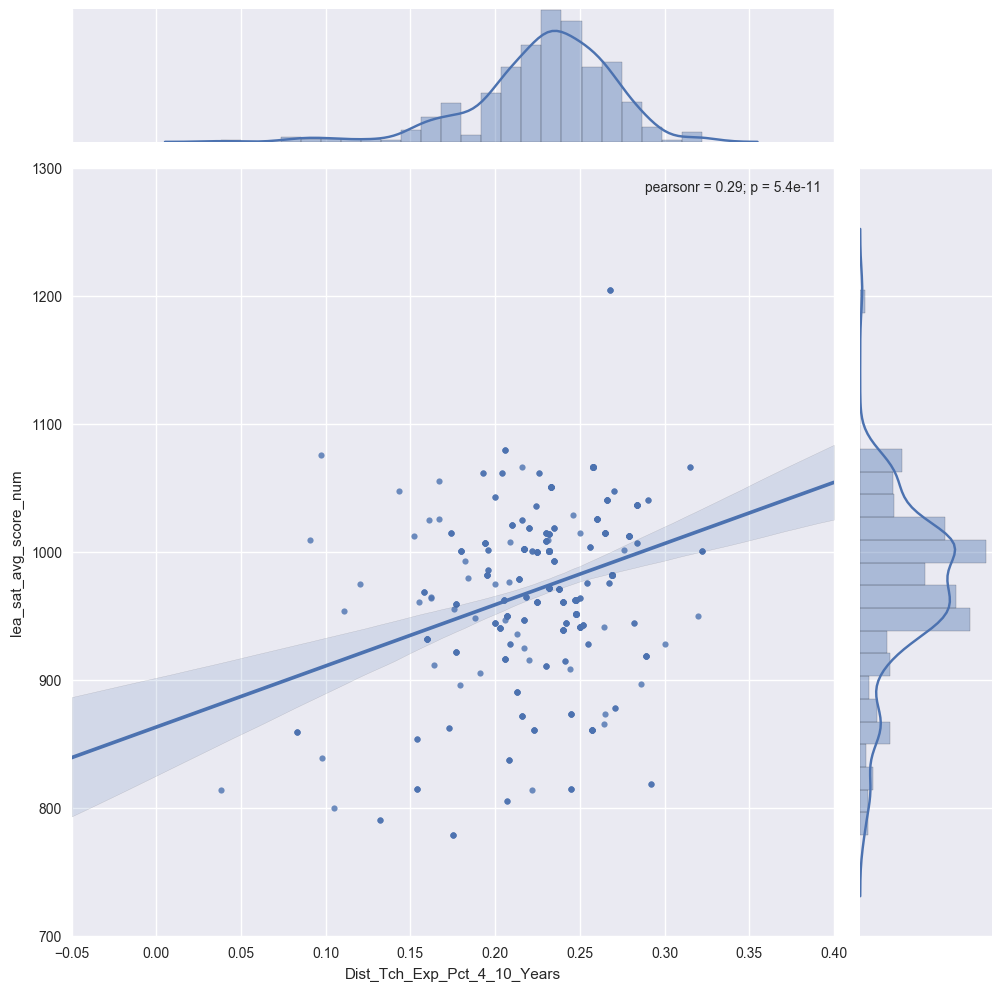

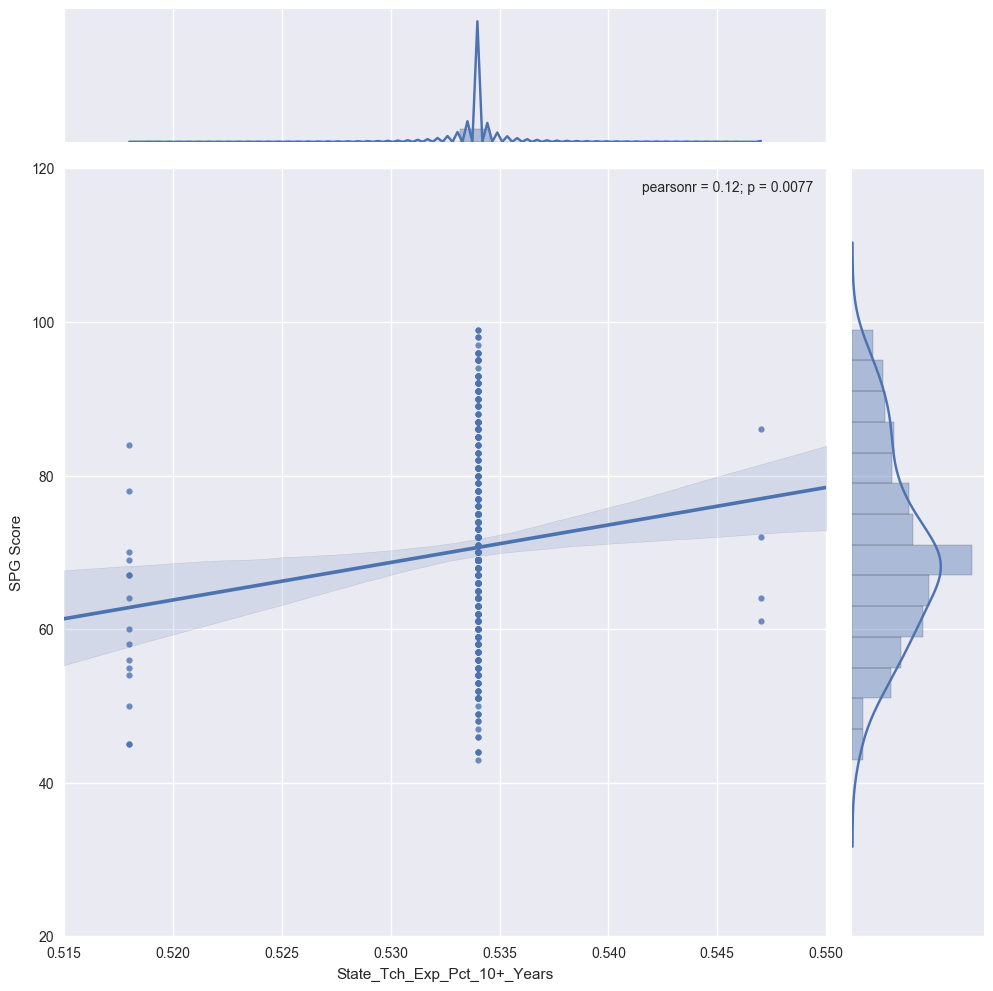

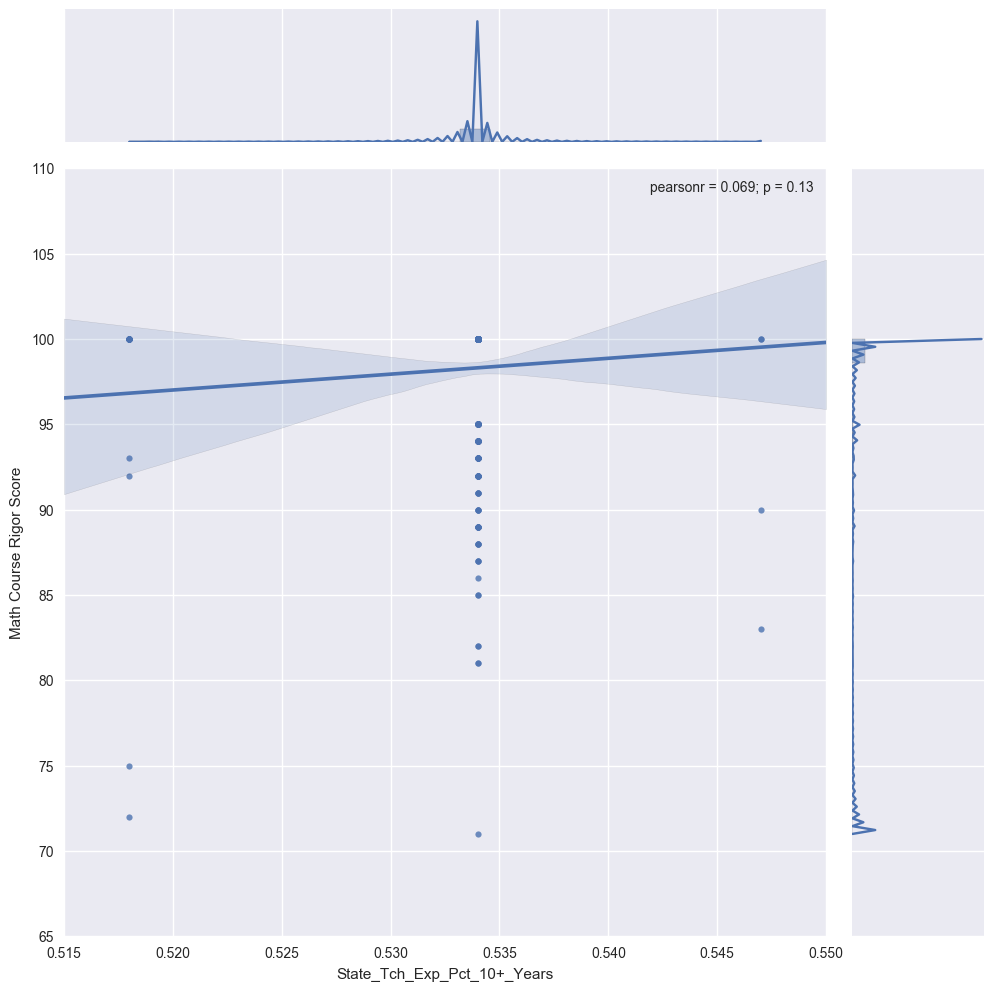

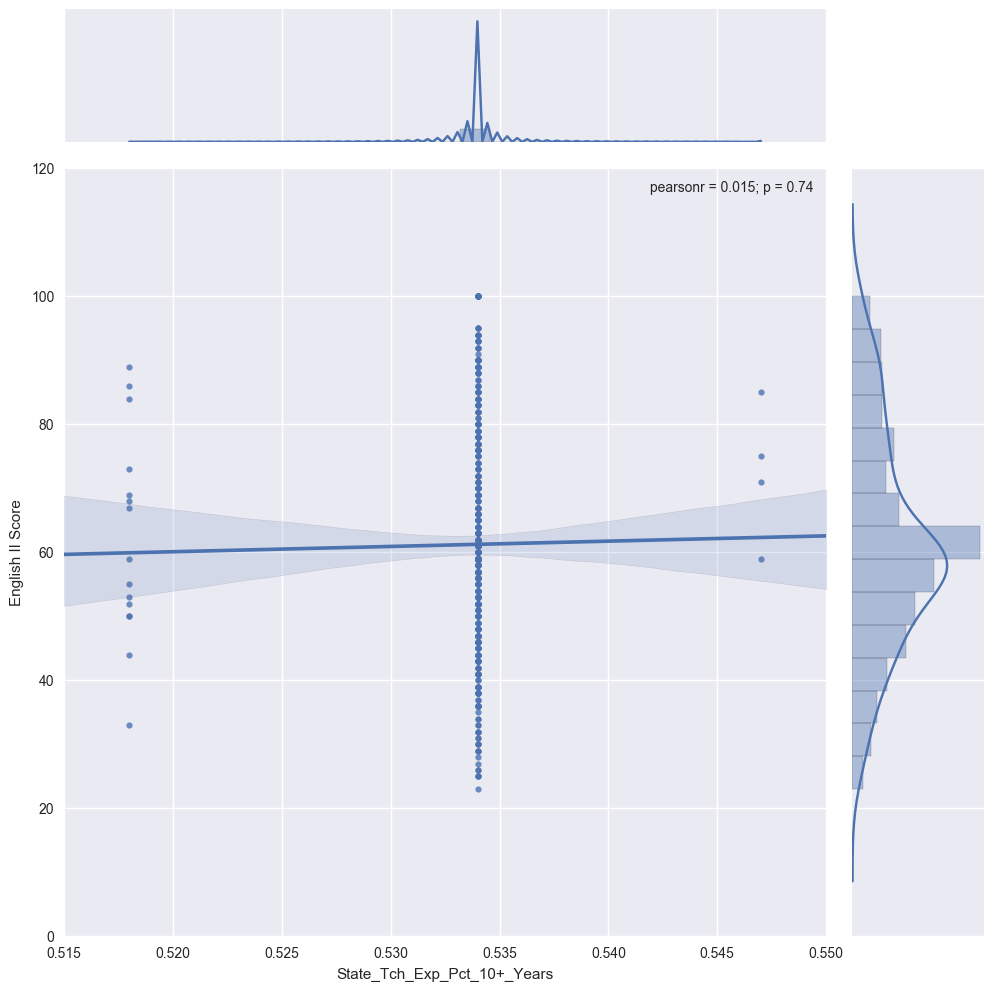

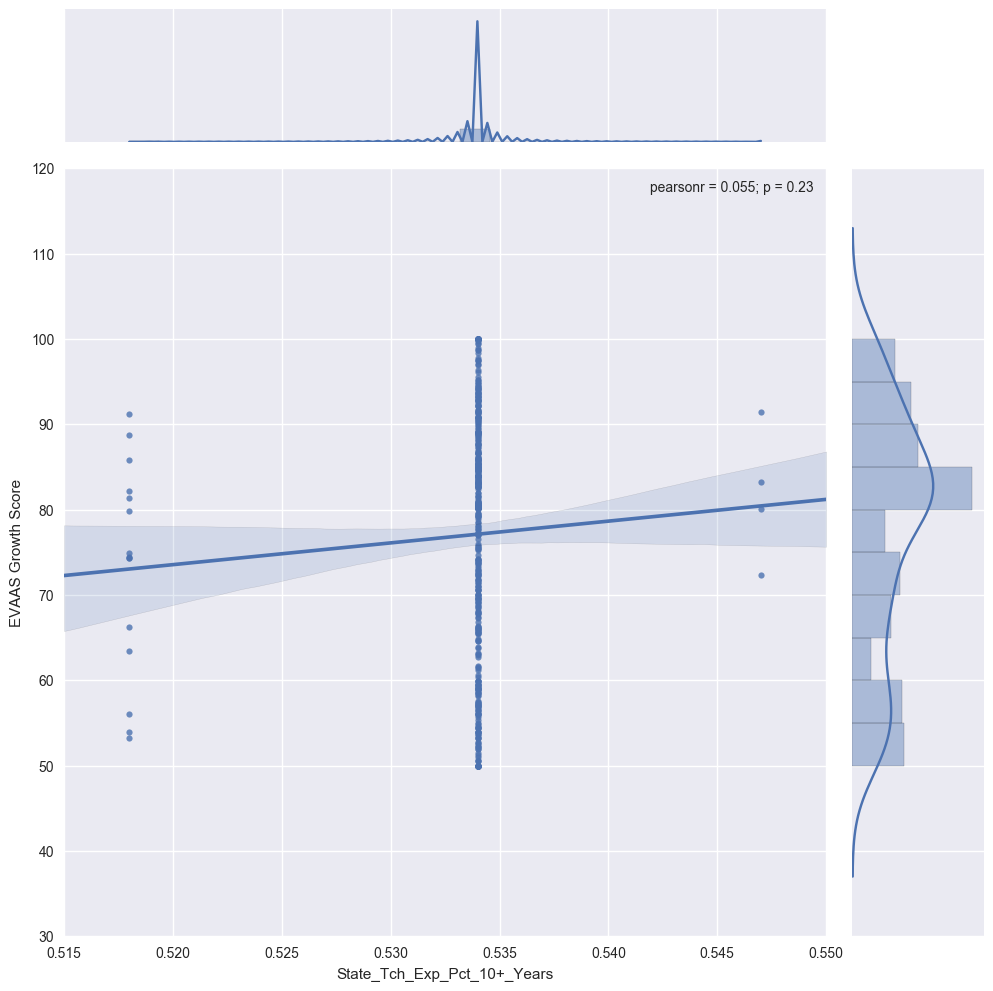

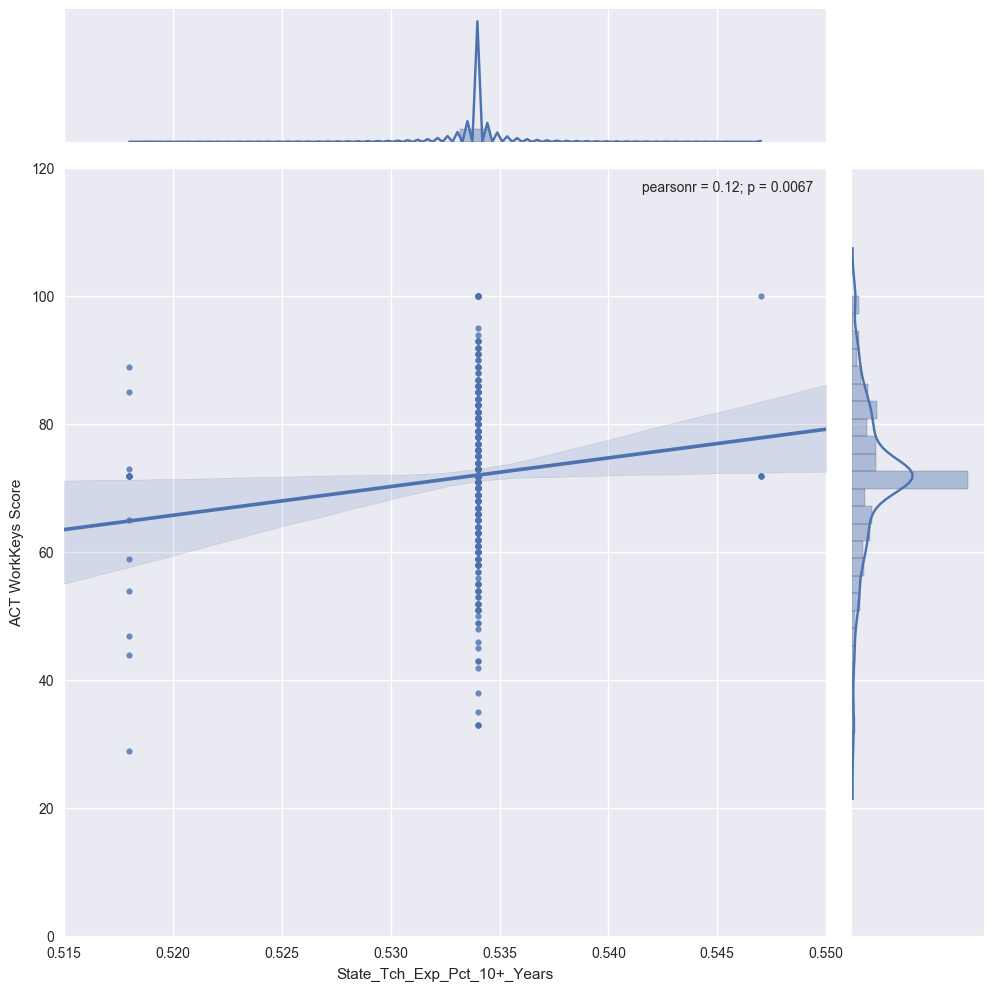

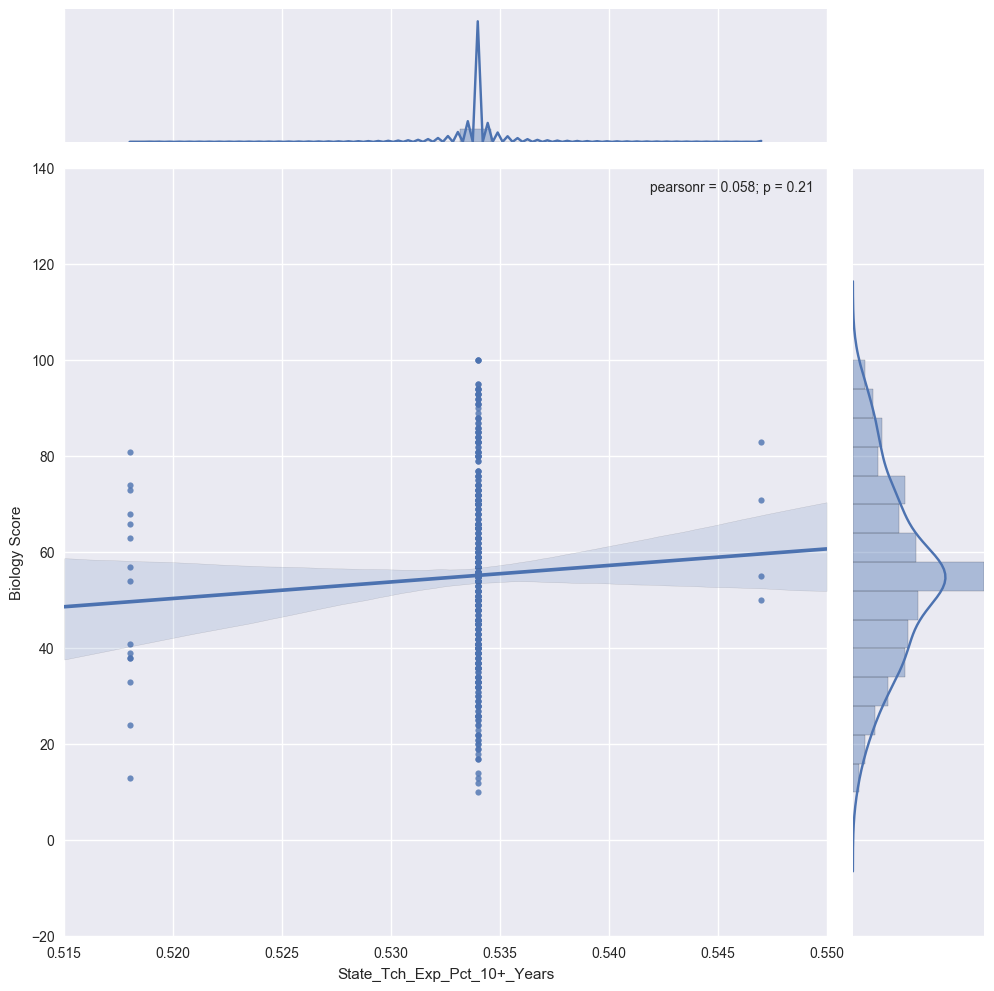

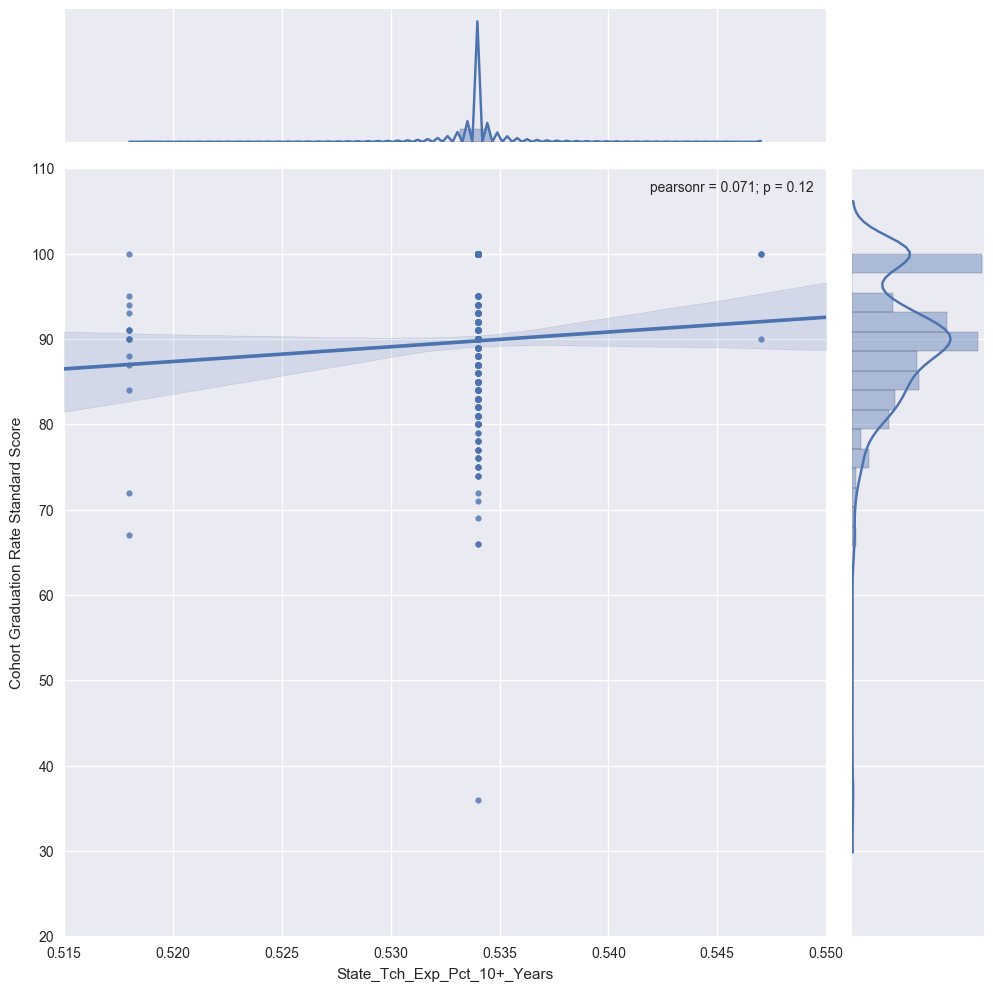

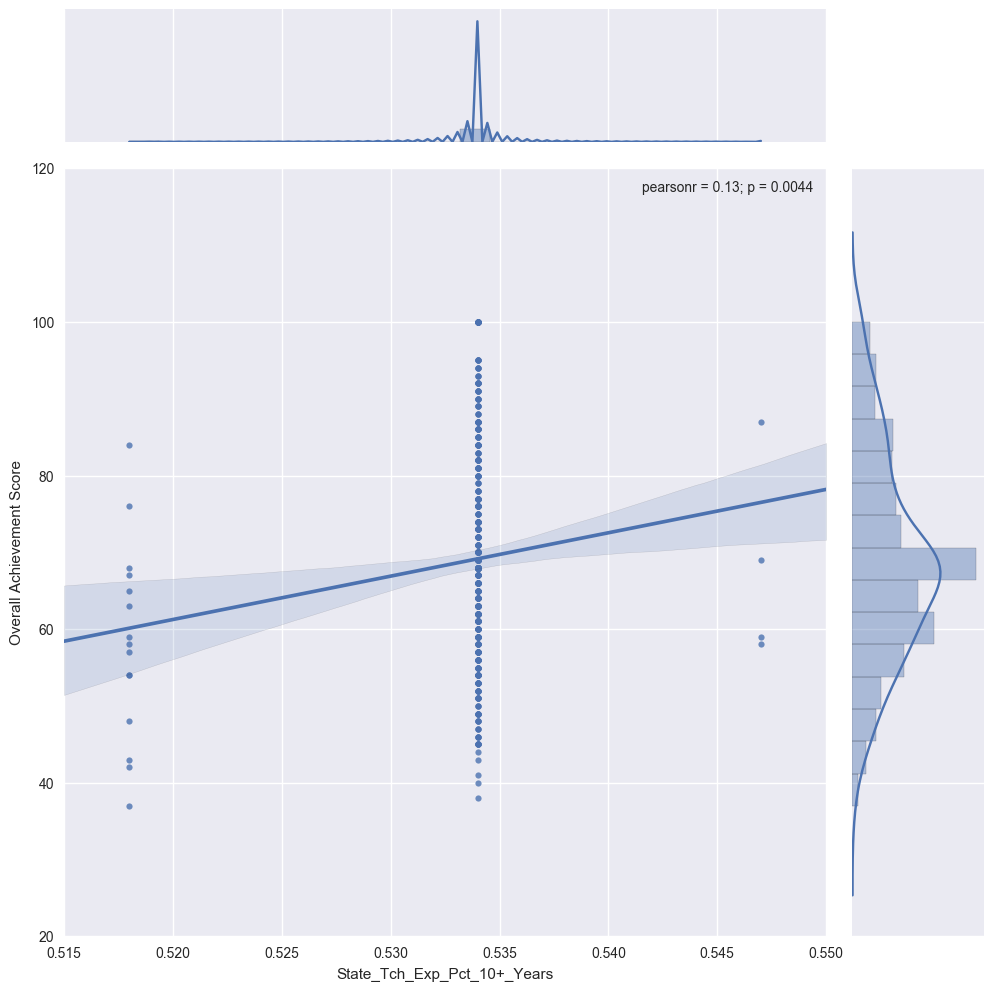

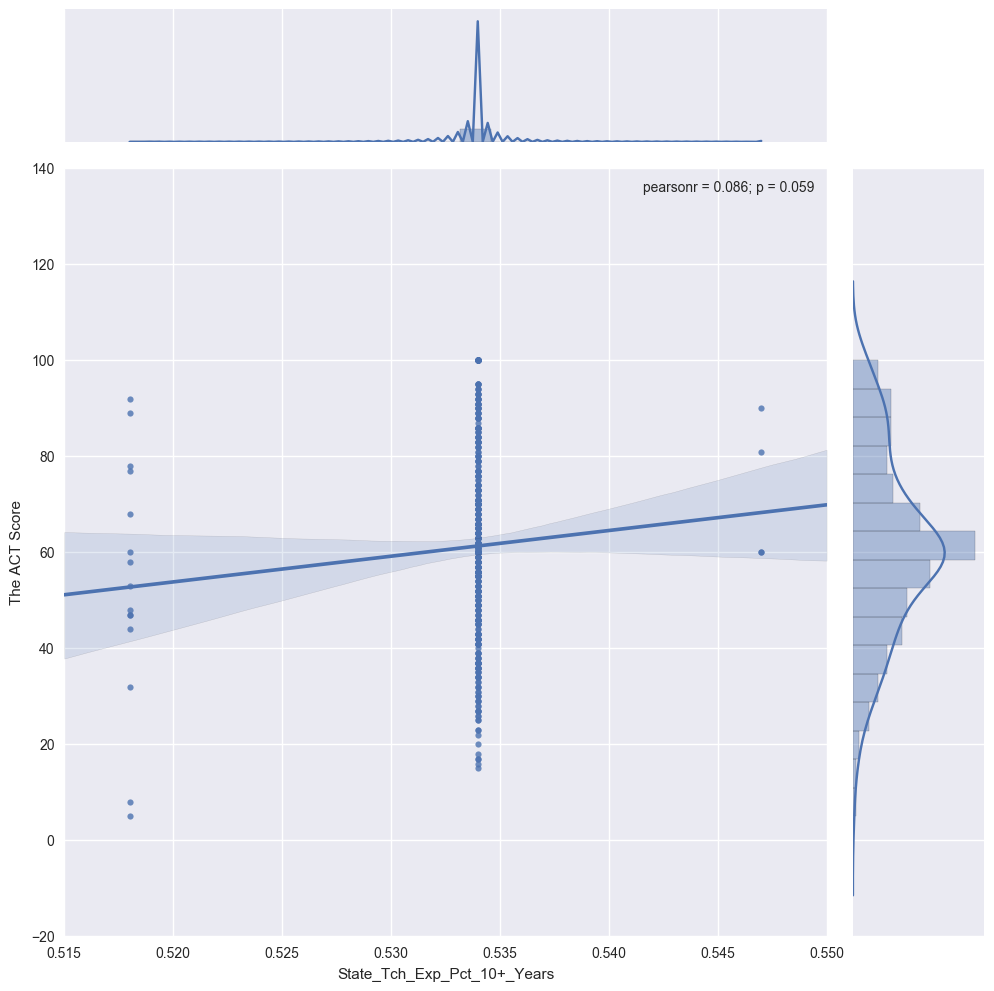

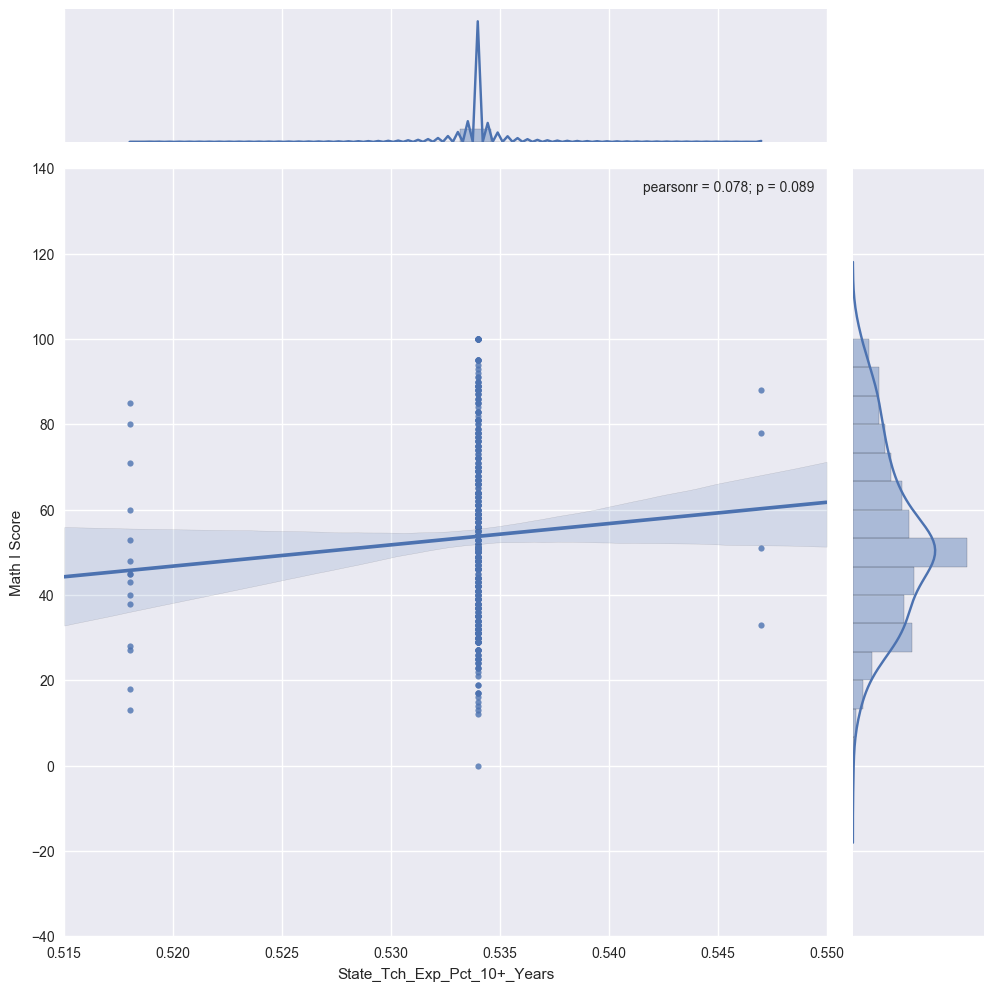

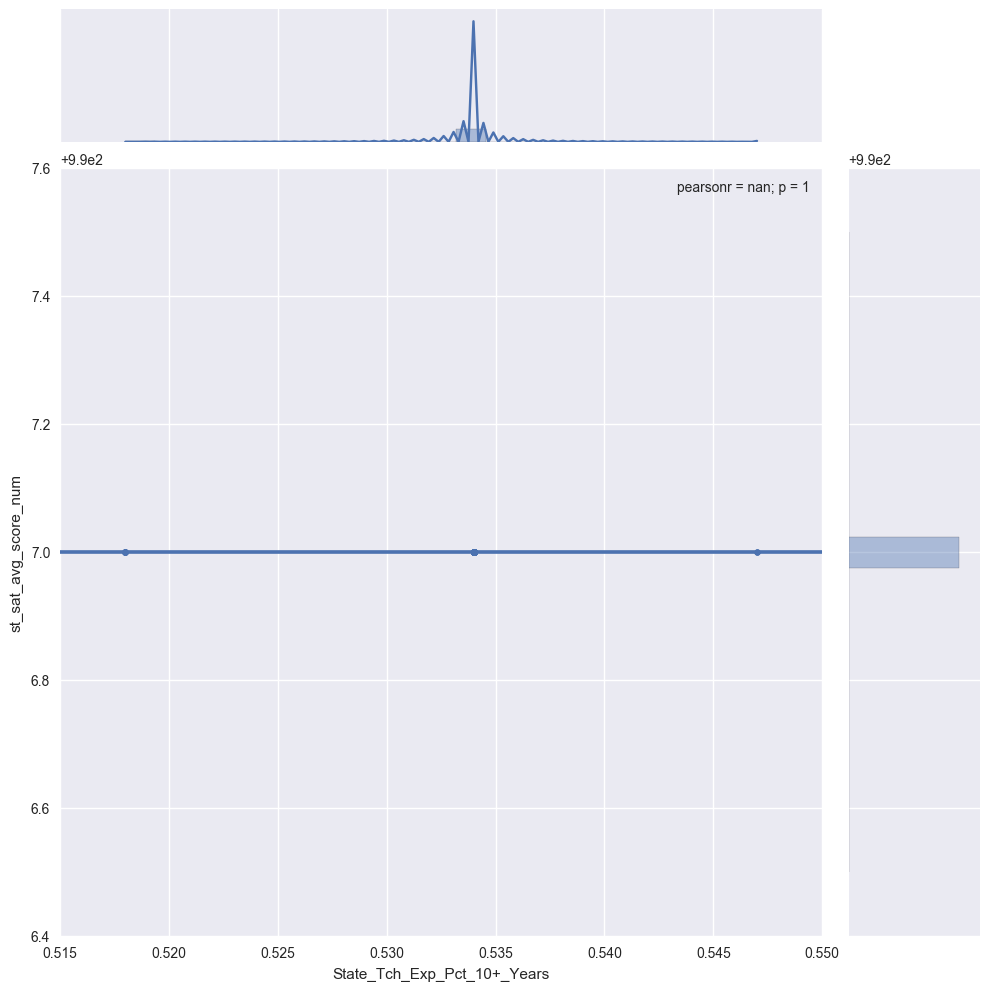

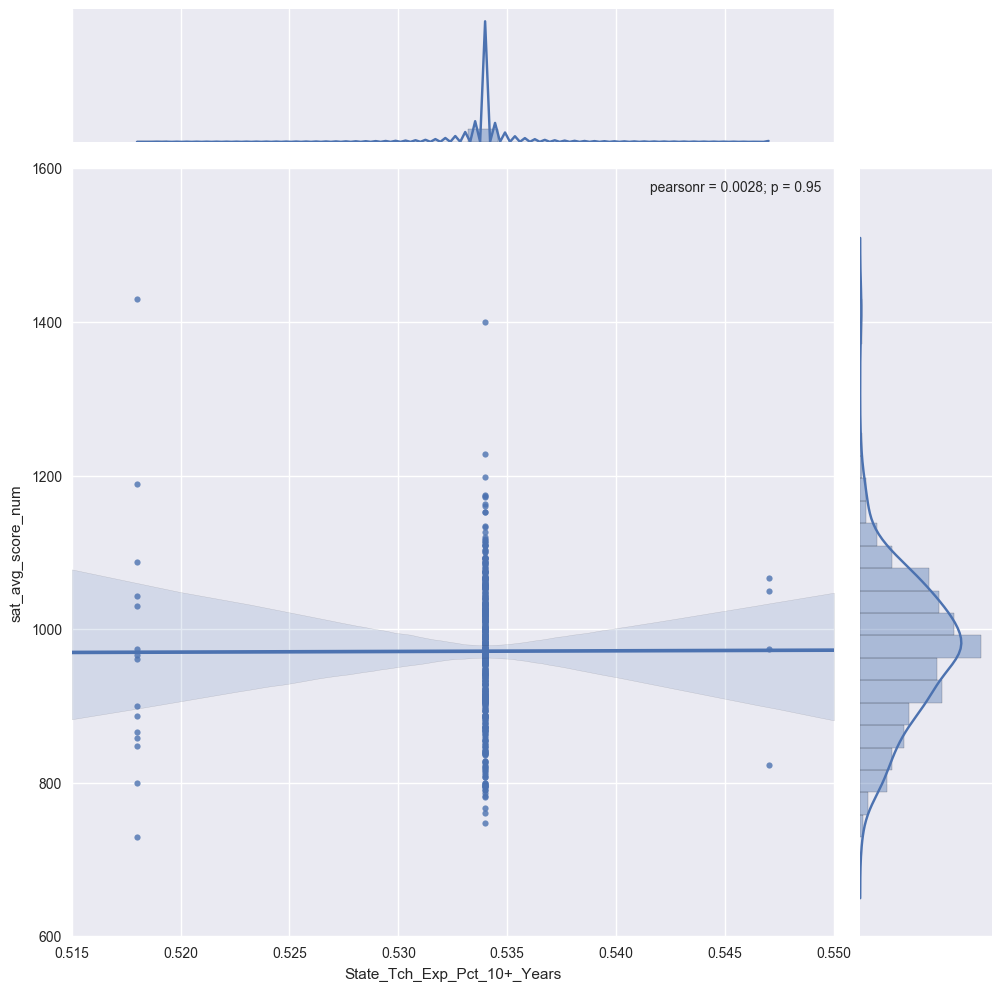

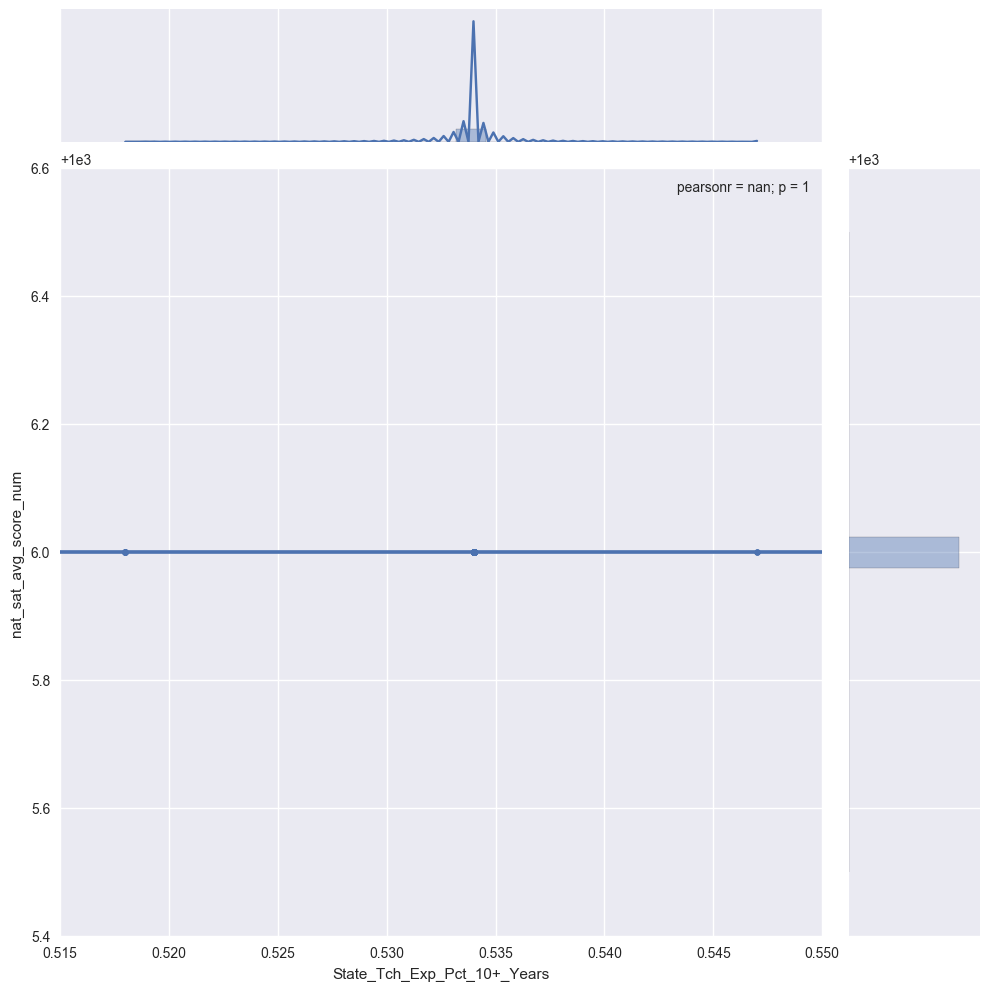

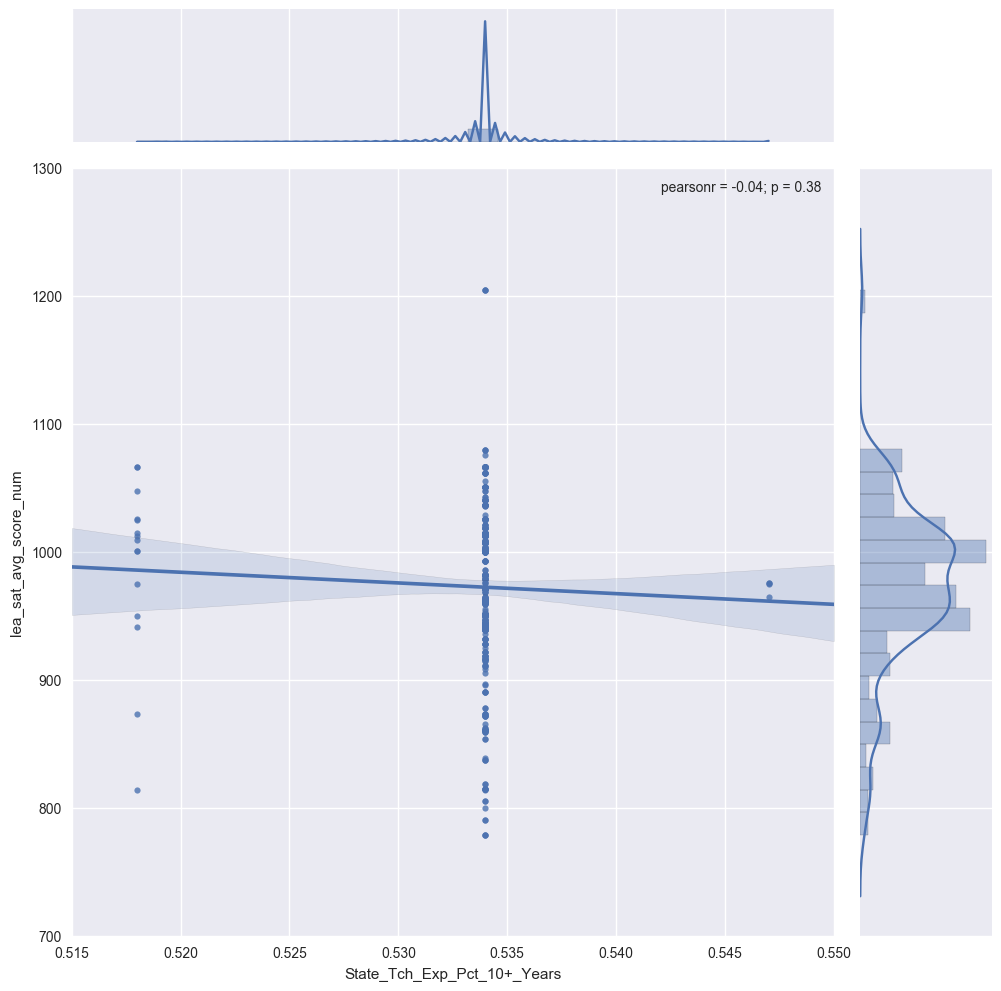

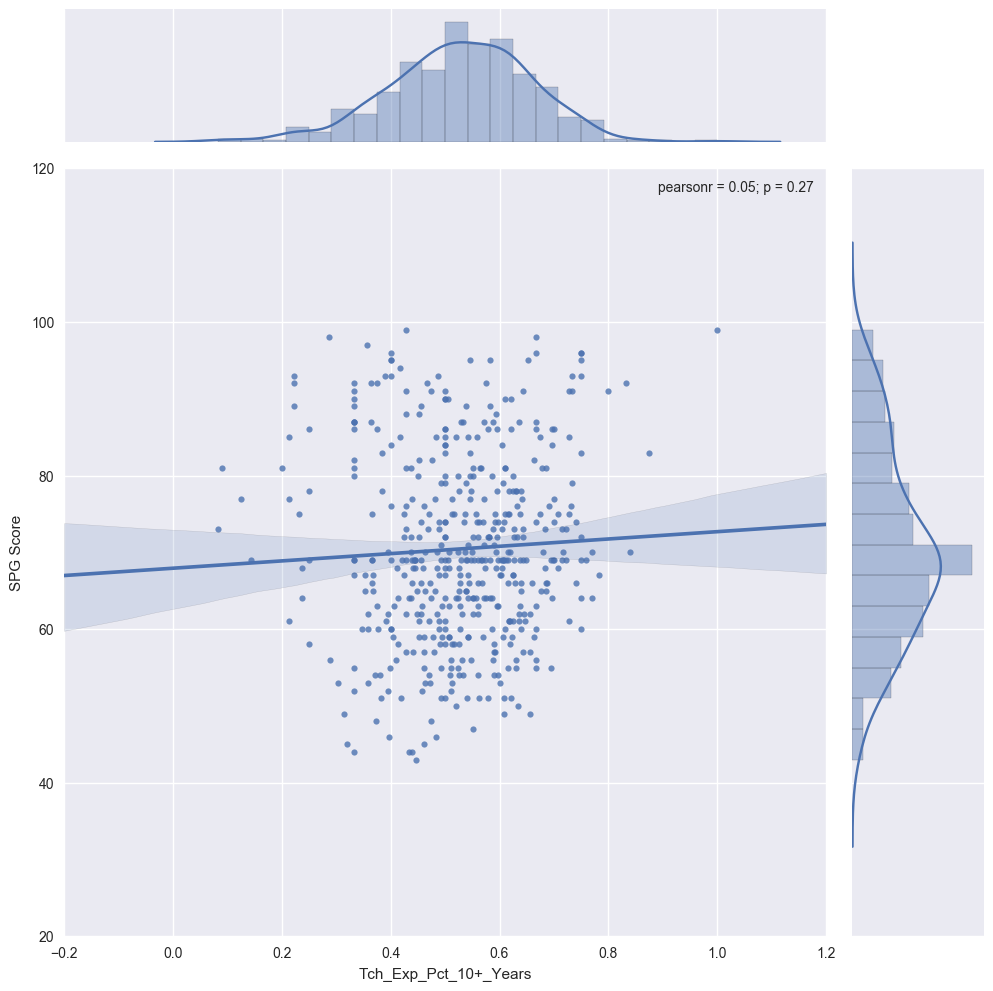

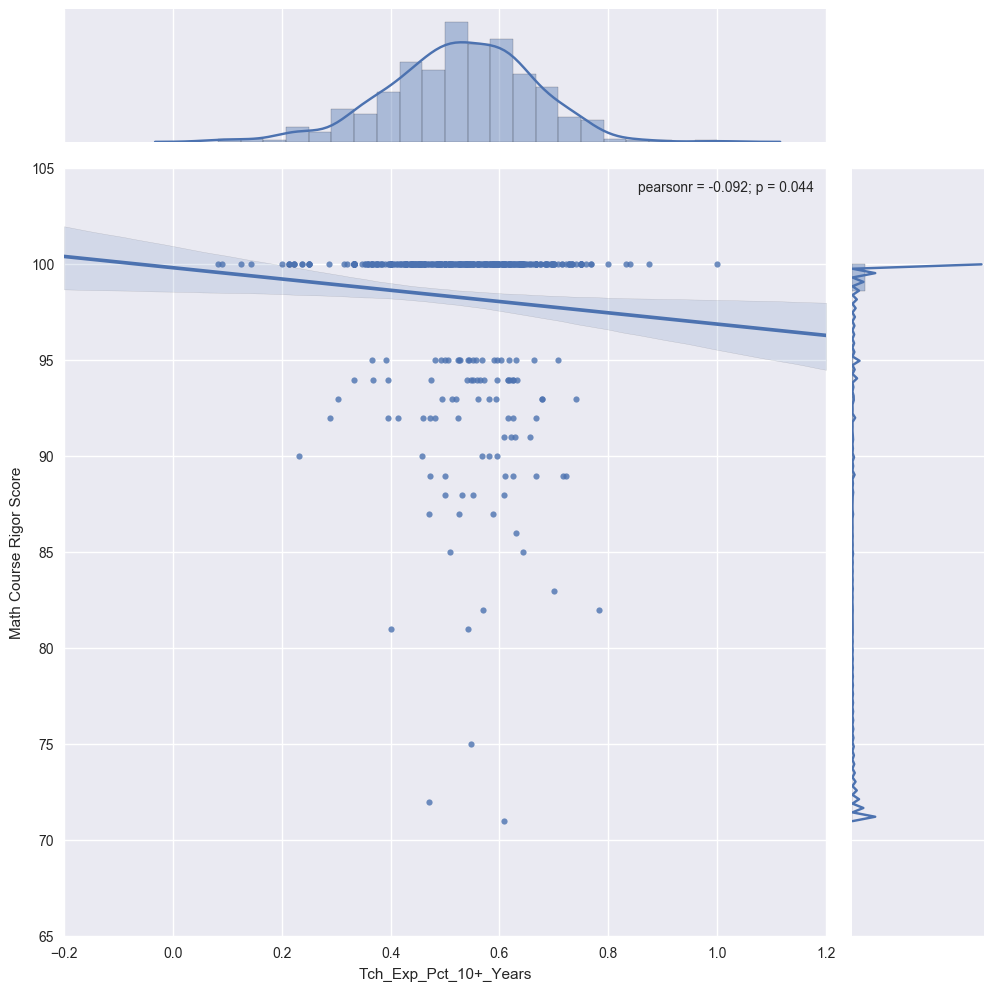

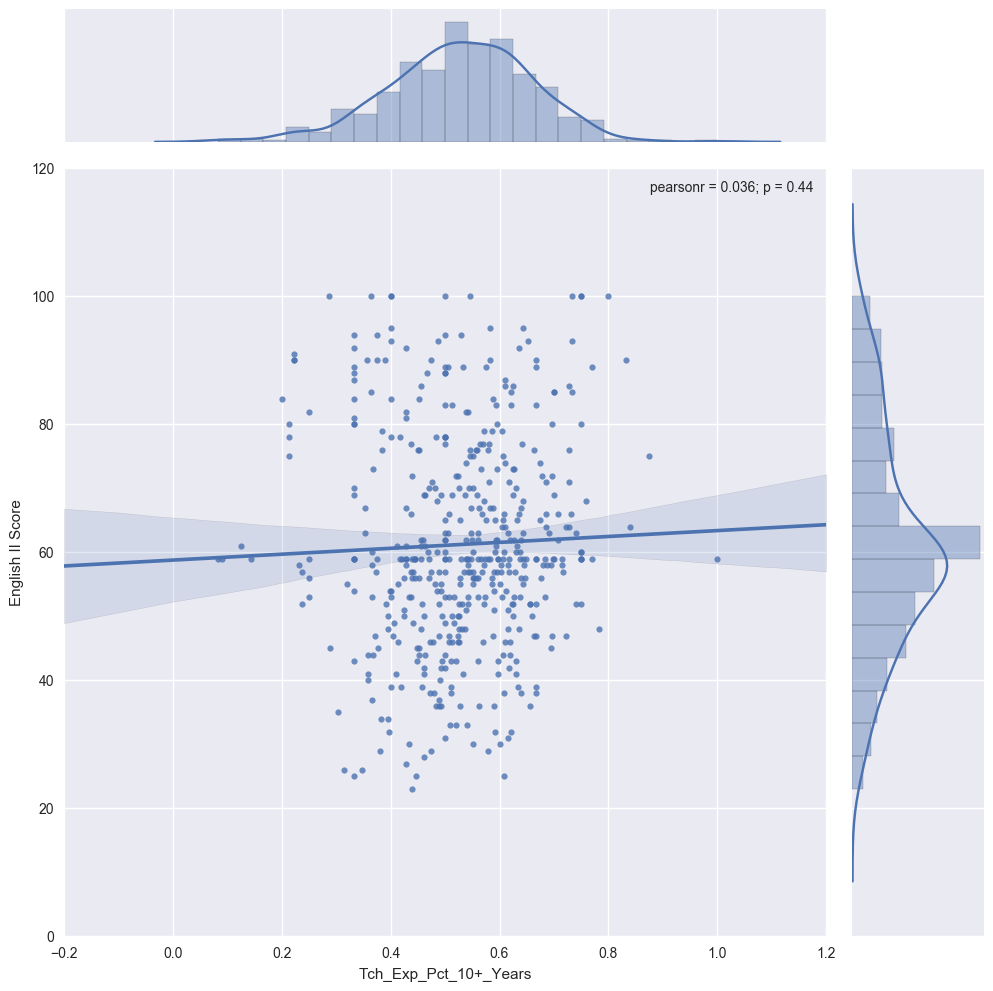

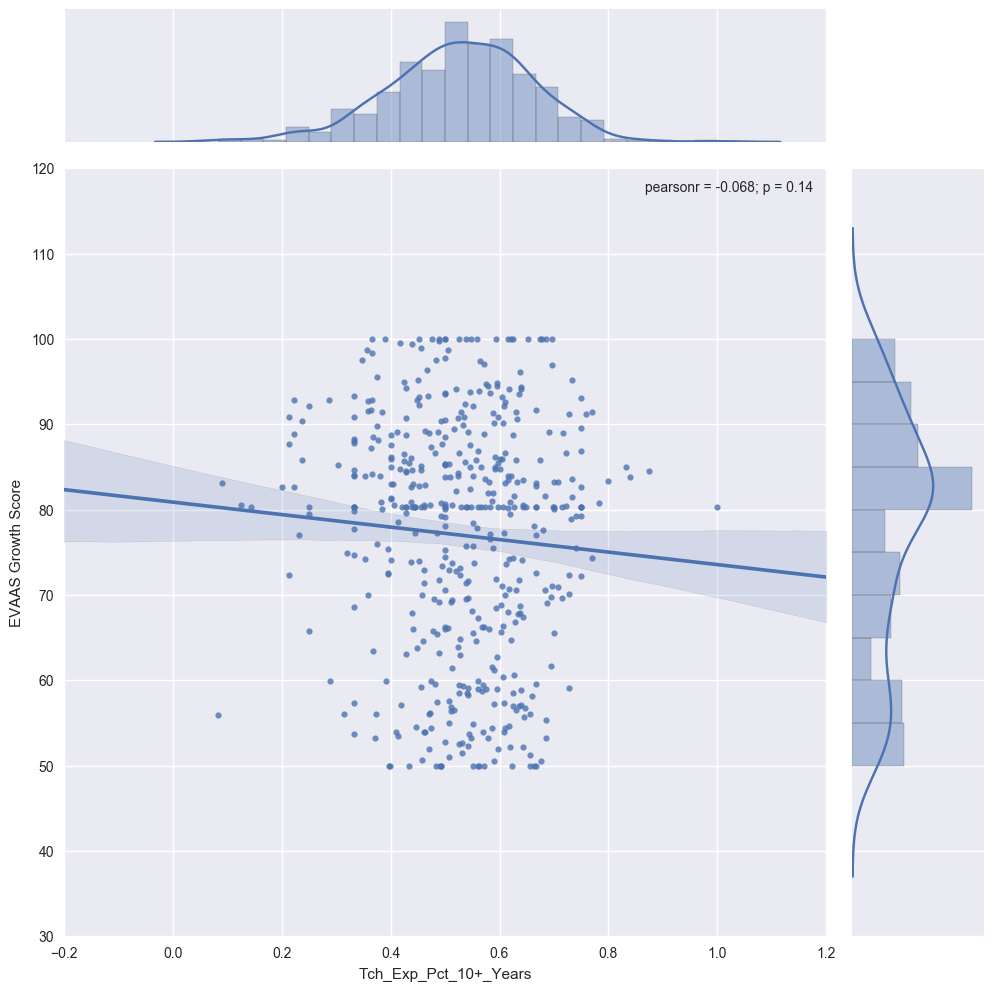

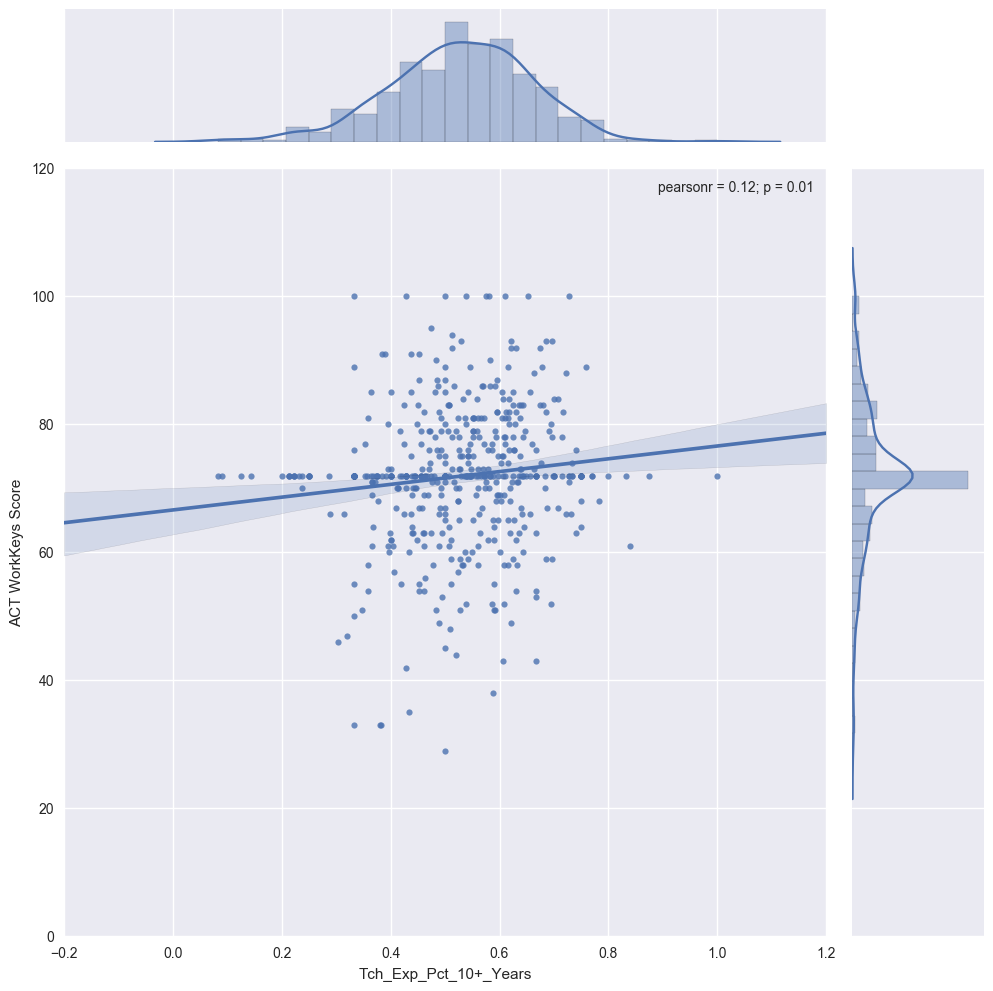

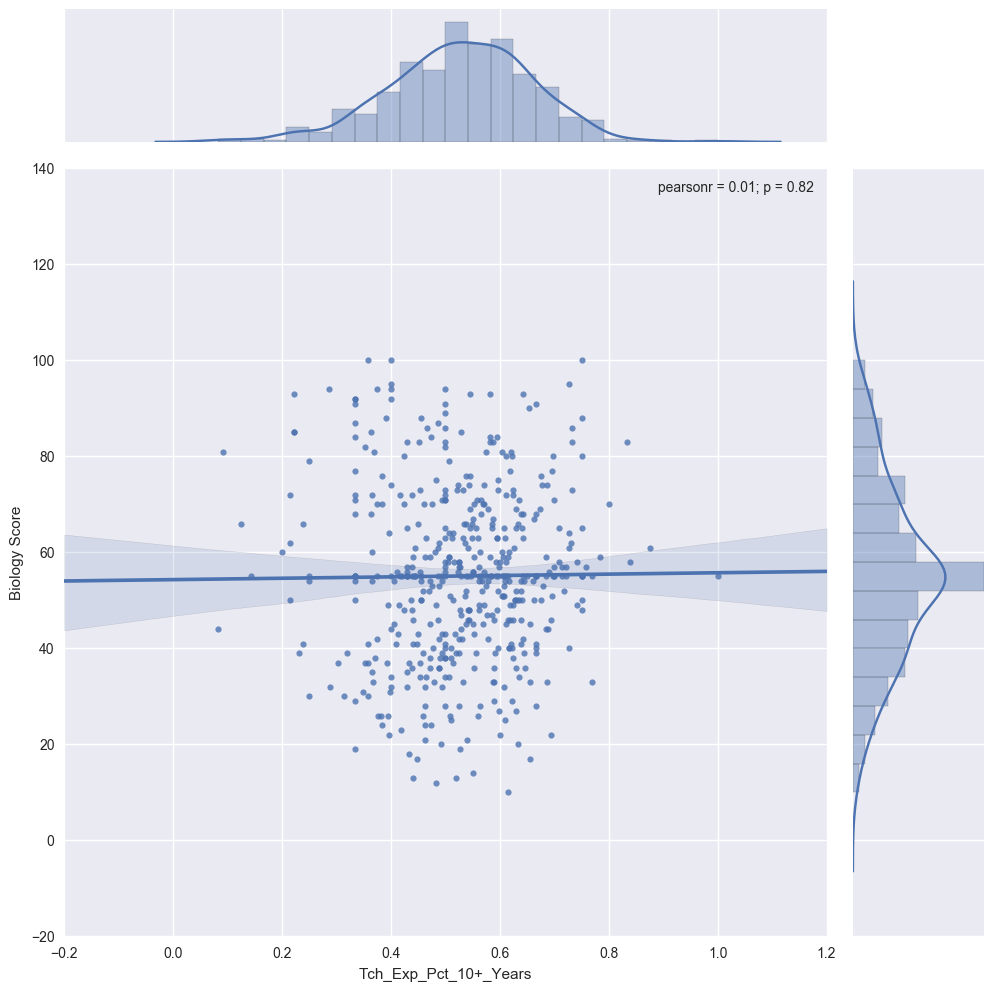

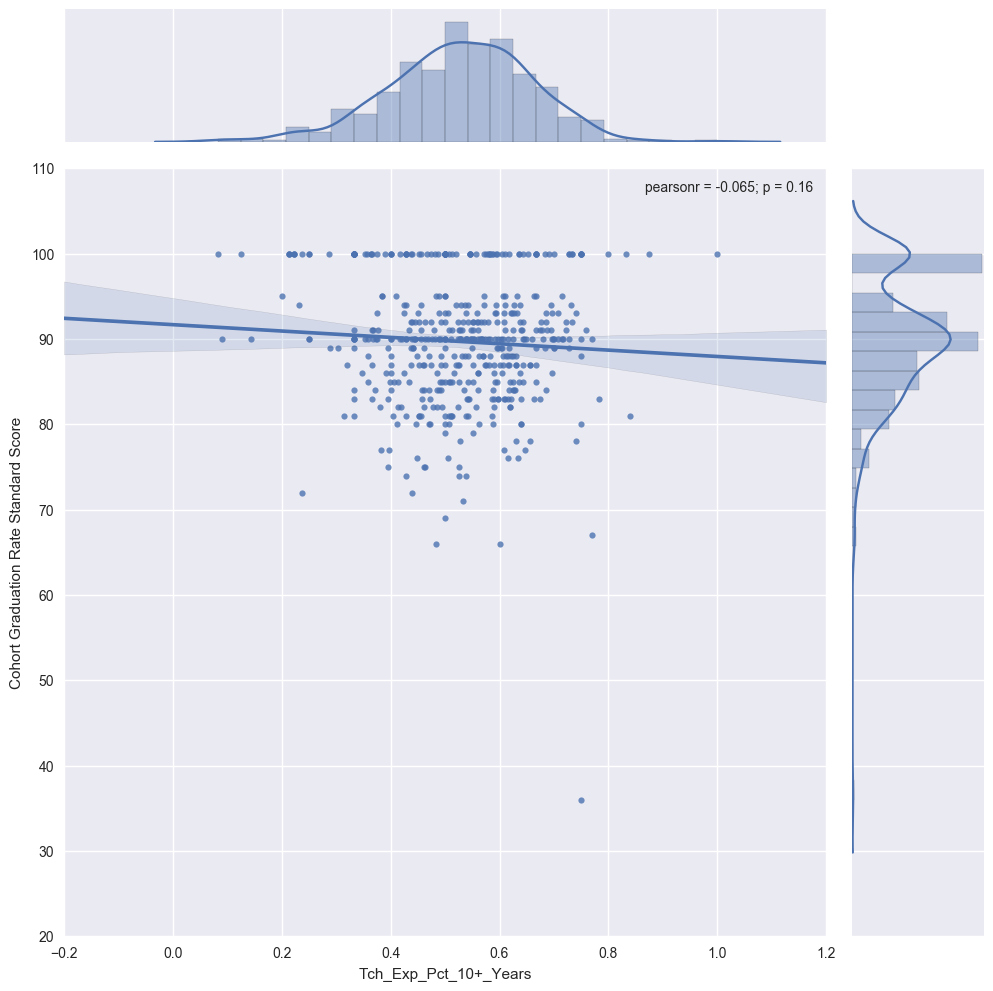

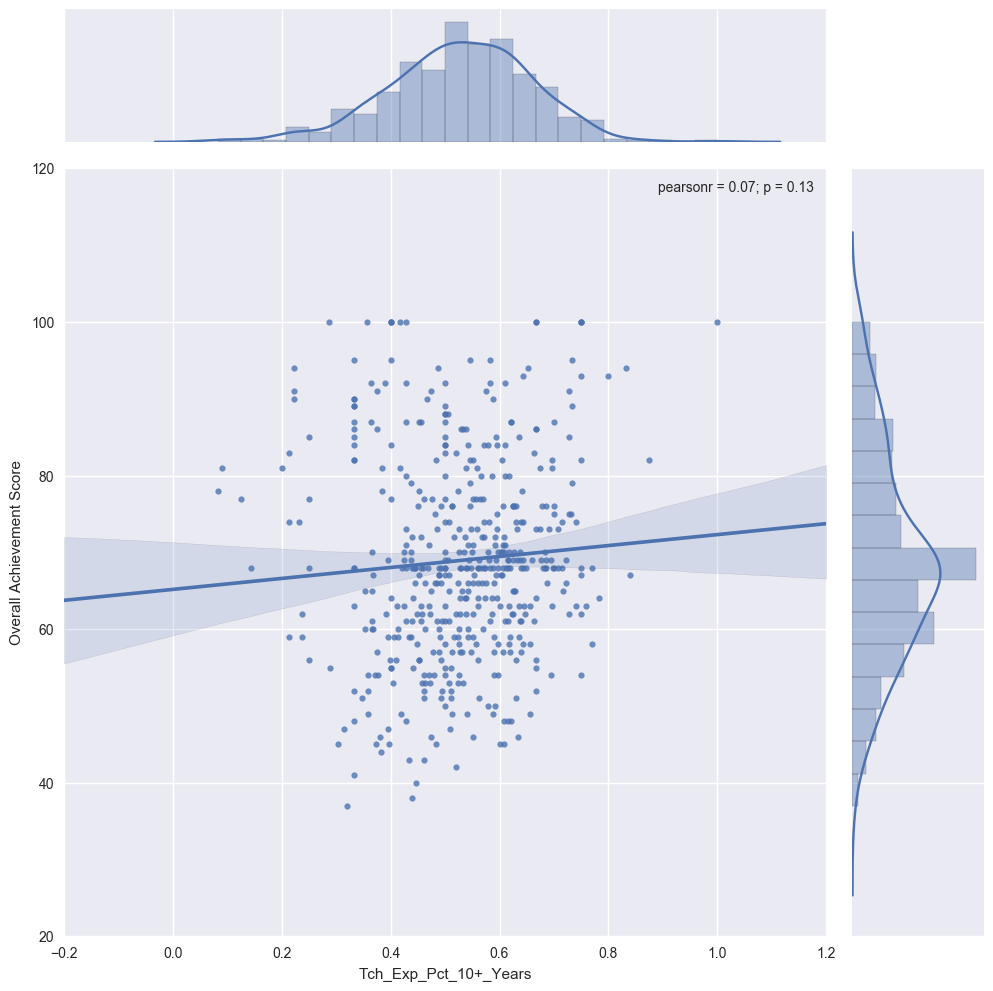

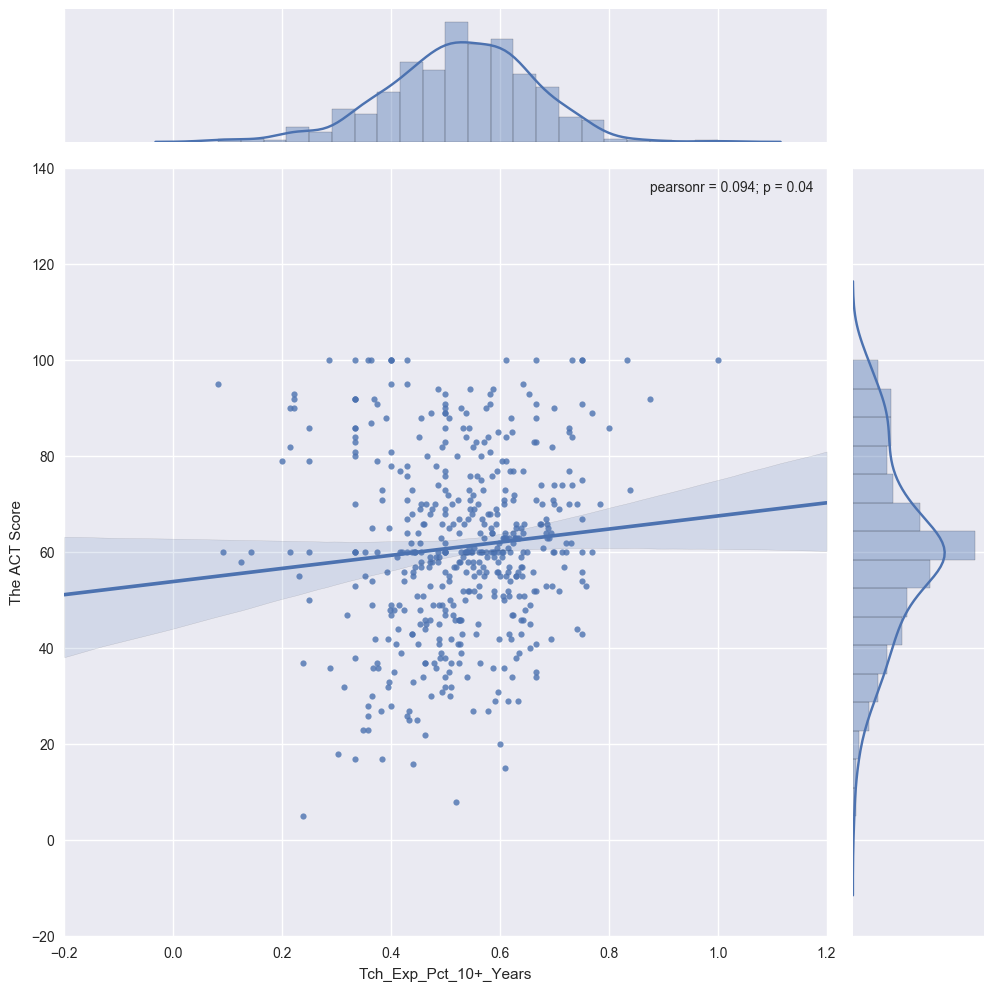

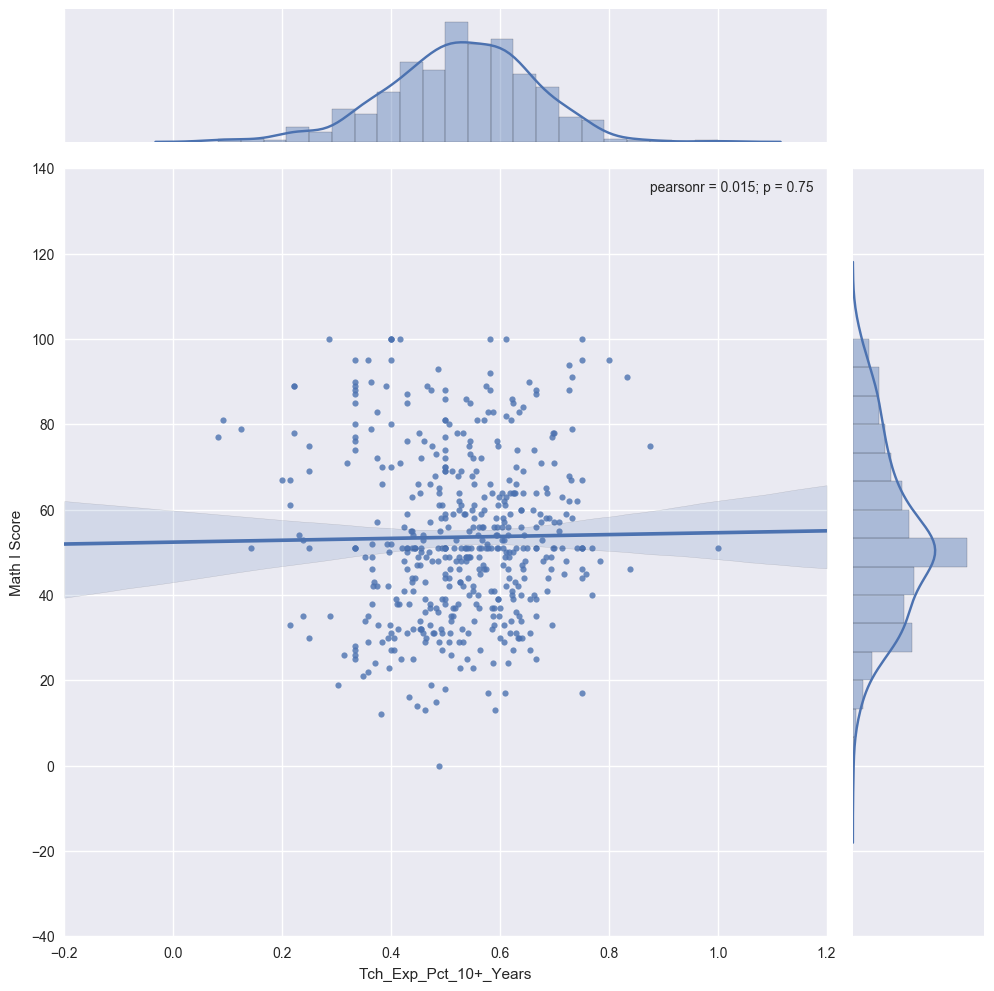

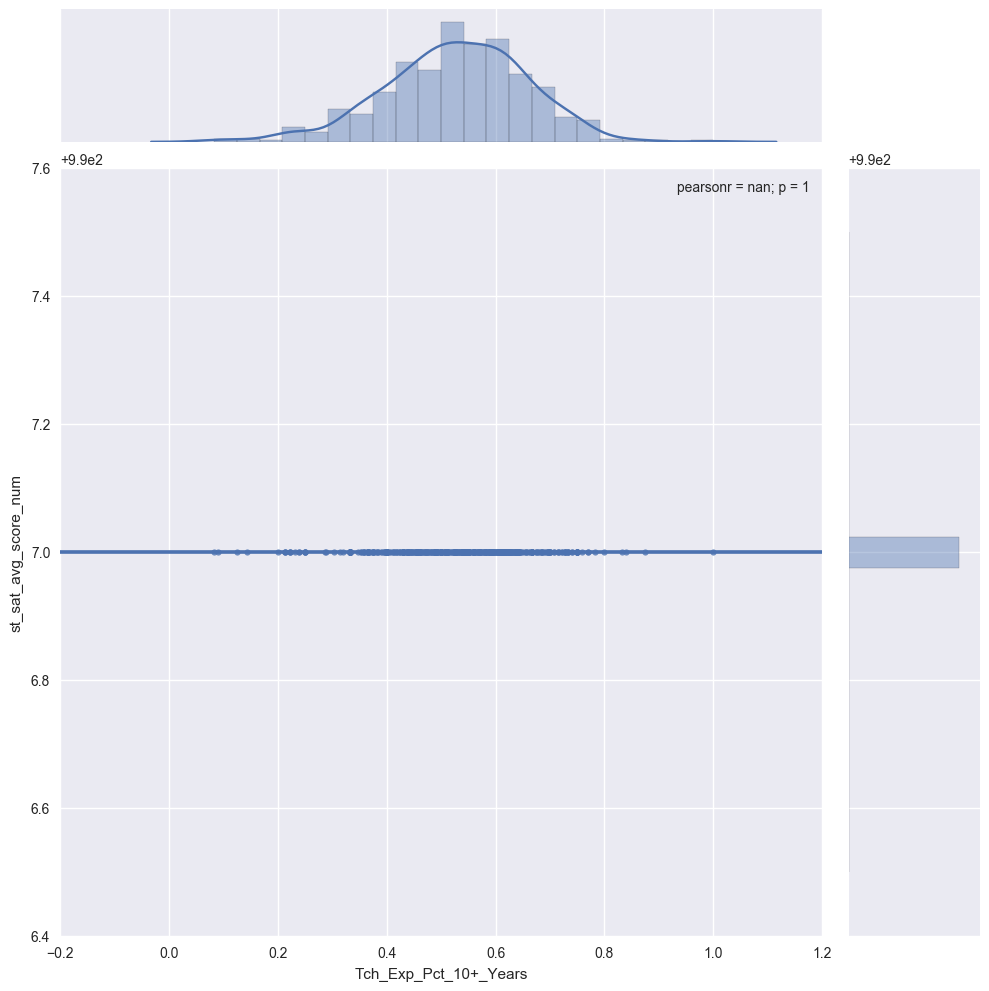

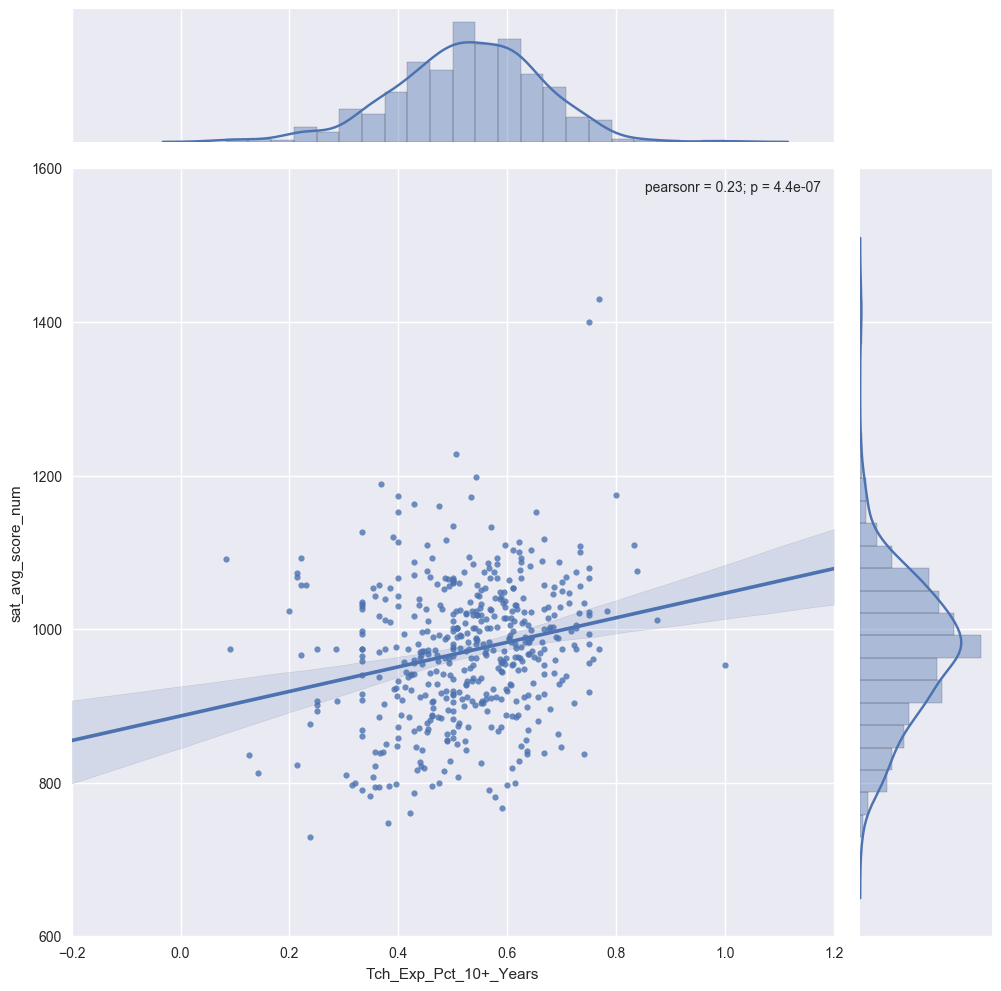

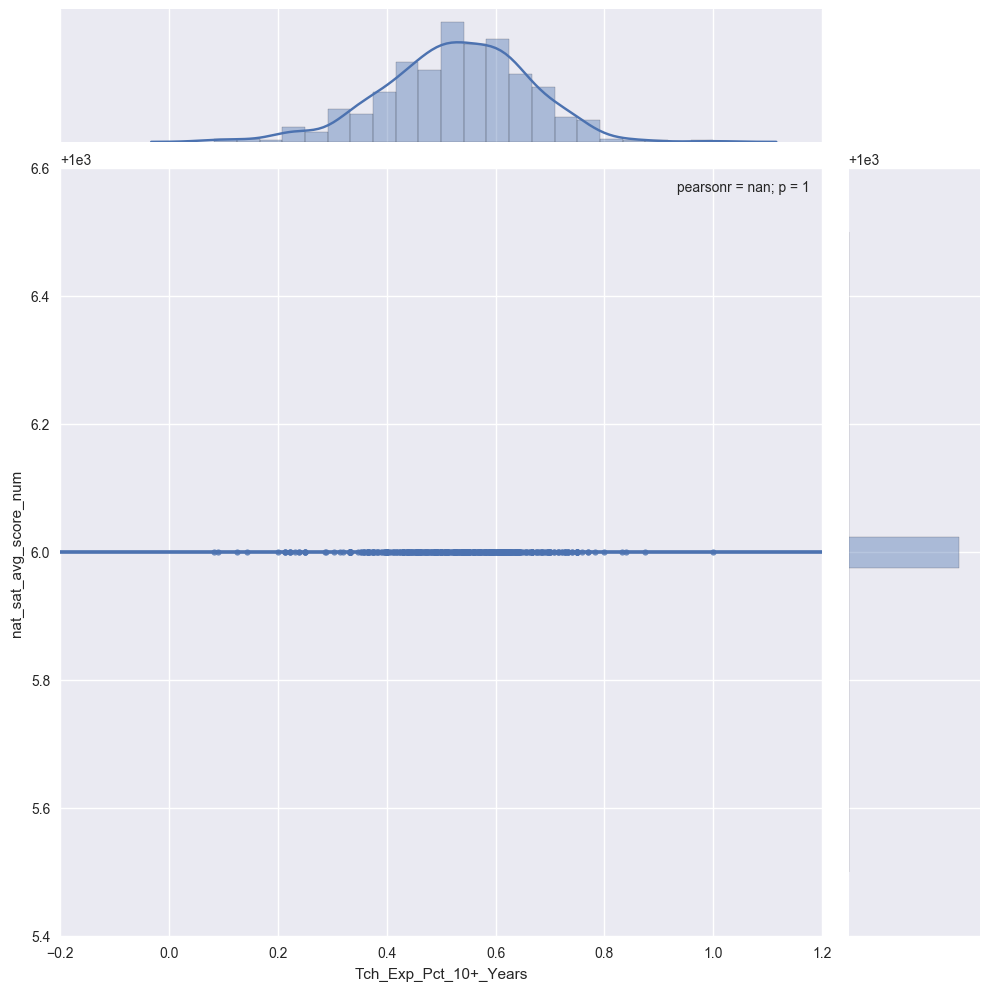

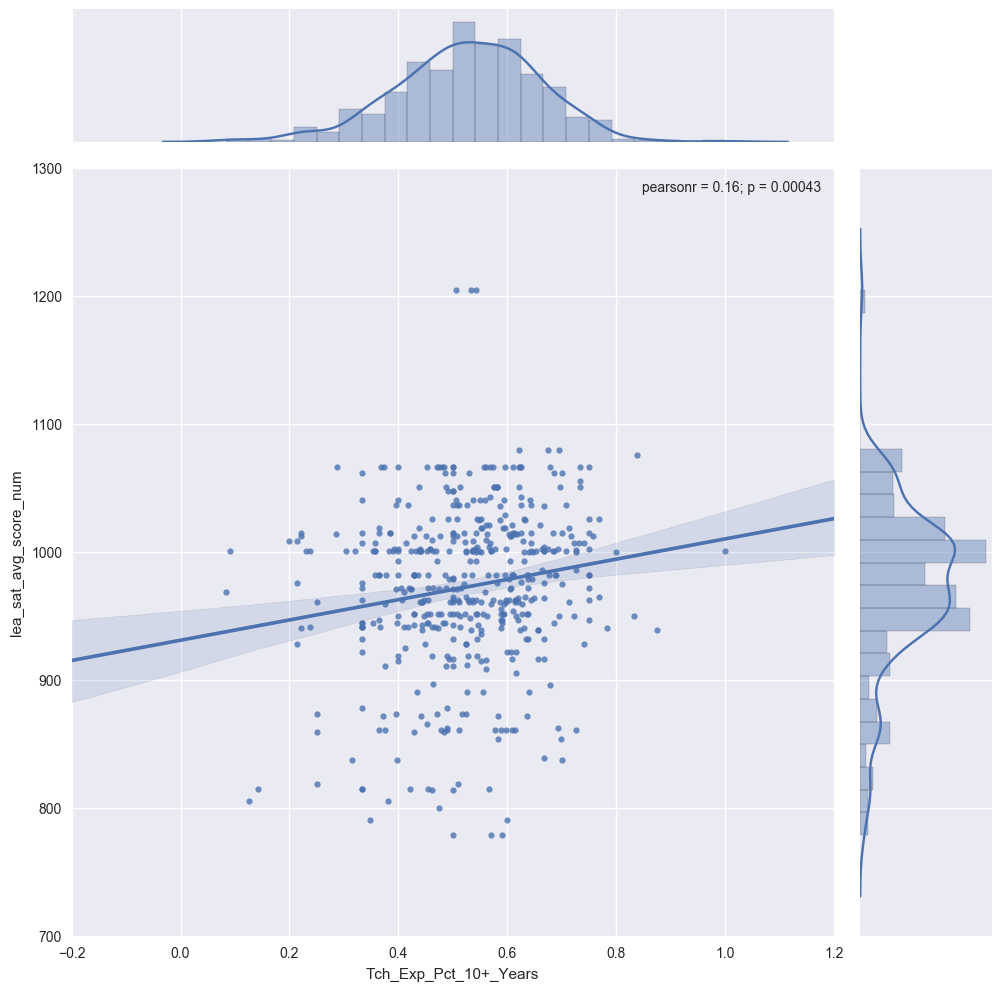

In [25]:
for i in range(0, len(Teacher)):
    for j in range(0, len(Achievement_measures)):
        sns.jointplot(new_schooldata2[Teacher[i]], new_schooldata2[Achievement_measures[j]], size=10, kind ='reg')

    #sns.factorplot('category_cd',Teacher[i],data=new_schooldata2)

In [26]:
#finding a list of the most correlate features
c = new_schooldata.corr().abs()
s =pd.DataFrame(c.unstack())
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)
result2 = result[ result.correlation<1]
result3 = result2[result2.correlation>0.6]
result4 = result3.iloc[::2] # drop alt rows which are duplicate Corr
result4[result4.Column1.isin(Achievement_measures)]
#result3.head()

Column1  \
1438   SPG Score                               
28118  The ACT Score                           
27980  The ACT Score                           
27777  Overall Achievement Score               
2358   English II Score                        
1465   SPG Score                               
27975  The ACT Score                           
22455  Biology Score                           
1300   SPG Score                               
22598  Biology Score                           
22460  Biology Score                           
32580  Math I Score                            
28145  The ACT Score                           
32690  Math I Score                            
28090  The ACT Score                           
7328   sat_avg_score_num                       
2247   English II Score                        
7326   sat_avg_score_num                       
27731  Overall Achievement Score               
24111  Cohort Graduation Rate Standard Score   
7183   sat_avg_score_num                       
8471   EVAAS Growth Score                      
17344  lea_sat_avg_score_num                   
32607  Math I Score                            
7298   sat_avg_score_num                       
27675  Overall Achievement Score               
17340  lea_sat_avg_score_num                   
17333  lea_sat_avg_score_num                   
28043  The ACT Score                           
1363   SPG Score                               
17441  lea_sat_avg_score_num                   
2283   English II Score                        
28105  The ACT Score                           

                                     Column2  correlation  \
1438   Overall Achievement Score              0.979572      
28118  Overall Achievement Score              0.906883      
27980  English II Score                       0.879376      
27777  Math I Score                           0.876368      
2358   Overall Achievement Score              0.875000      
1465   Math I Score                           0.869972      
27975  SPG Score                              0.869854      
22455  SPG Score                              0.865069      
1300   English II Score                       0.861556      
22598  Overall Achievement Score              0.854044      
22460  English II Score                       0.847737      
32580  English II Score                       0.835547      
28145  Math I Score                           0.814845      
32690  Biology Score                          0.811405      
28090  Biology Score                          0.801531      
7328   The ACT Score                          0.776286      
2247   sat_avg_score_num                      0.706915      
7326   Overall Achievement Score              0.689693      
27731  Cohort Graduation Rate Standard Score  0.668306      
24111  SPG Score                              0.654502      
7183   SPG Score                              0.653974      
8471   SPG Score                              0.646526      
17344  lea_ap_pct_3_or_above                  0.646382      
32607  sat_avg_score_num                      0.635248      
7298   Biology Score                          0.634220      
27675  avg_daily_attend_pct                   0.633001      
17340  lea_nbpts_num                          0.626290      
17333  lea_lateral_teach_pct                  0.620905      
28043  avg_daily_attend_pct                   0.620884      
1363   avg_daily_attend_pct                   0.618688      
17441  lea_salary_expense_pct                 0.616010      
2283   avg_daily_attend_pct                   0.612347      
28105  short_susp_per_c_num                   0.605831      

                                                         Correlation Pair  
1438   (SPG Score, Overall Achievement Score)                              
28118  (The ACT Score, Overall Achievement Score)                          
27980  (The ACT Score, English II Score)                                   
27777  (Overall Achieveme

Through correlation calculation, as could have been expected, there exists a strong correlation between standardized tests.. Though one could have expected perfomance in tests to be strongly correlated to attendance, Average daily attendance 'avg_daily_attend_pct' shows up with a moderate correlation of 0.62 to The ACT Score and 0.61 to English II Score  

#### Explore Attributes and Class [10]
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

#### New Features [5]
Are there other features that could be added to the data or created from existing features? Which ones?

In [ ]:
# create Factors for 'Overall Achievement Score'
# A: >85
# B: 70-85
# C: 50-70
# D: <50

new_schooldata['Overall Achievement Score'].describe()

#### Exceptional Work [10]
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

#### 1. Data Dictionary
Since this datasets has numerous columns we needed a fast way to quickly find ColumnName description for easy reference. For exceptional work, we created a function to quickly pull the data from csv datafile. This involved converting the pdf to excel and formating the data for easy import into pandas. The code below is a working code for our data dictionary.

In [ ]:
# This is a simple function to pull column description
DataDict = pd.read_csv(wd+'\\data\\dictionary.csv', encoding = "ISO-8859-1")
DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.COLUMN_NAME==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

In [ ]:
# embedding Image

from IPython.display import Image
Image(url='https://public.tableau.com/en-us/s/gallery/life-hashtag')